# My Spotify Credentials

In [1]:
%cd '/content/drive/MyDrive/Colab Notebooks/Portfolio - Projects'

/content/drive/MyDrive/Colab Notebooks/Portfolio - Projects


In [2]:
import creds

In [3]:
!pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.8/237.8 KB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 12.5 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [5]:
import numpy as np
import pandas as pd

In [6]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth,SpotifyClientCredentials

In [7]:
import string

print(string.ascii_letters+string.digits)

abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789


In [8]:
import random
import string

def randotrack():
    '''
    A function to generate a random track string for the Spotify database request.
    
    Inputs:
    None
    
    Returns:
    A random character from all available with a wildcard character (%) either
    at the beginning, the end, or both
    '''
    # all available characters
    chars = string.ascii_letters+string.digits

    # get random character
    randnum = np.random.randint(0,len(chars))
    randchar = chars[randnum]
    # wildcard at beginning, end, or both
    wildnum = np.random.randint(0,3)
    if wildnum == 0:
        return '%' + randchar
    if wildnum == 1:
        return randchar + '%'
    if wildnum == 2:
        return '%' + randchar + '%'

In [16]:
print(randotrack())

Q%


In [11]:
tracknum = 2000
limit = 40


sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(
    client_id=creds.client_id,
    client_secret=creds.client_secret),
    requests_timeout=50000) # long timeout because the database is tempermental

In [9]:
def fetch_tracks(limit=40,tracknum=1000,genre='hip-hop',year='2019-2021',market='US'):
  '''
  Takes the number of songs, genre and year as inputs and return a dataframe holding all the information about the tracks as the output.

  Eg: limit=40
      tracknum=1000
      genre='hip-hop'
      year='2019-2021'
      market='US'
  '''
  # initialize dictionary holding info
  all_tracks_dict = {'id': [], 'popularity': [], 'track': [], 'artists': [], 'album_name': [],
                'album_type': [], 'release_date': [], 'image': [], 'duration_ms': [], 
                'preview_url': []}

  repeat_id_count = 0 # count of repeated songs

  while len(all_tracks_dict['id']) < tracknum:

    search = sp.search(q=f"genre:{genre} year:{year} track:{randotrack()}",
                        offset=np.random.randint(1001-limit), # random offset
                        limit=limit, market=market)

    # Iterate over all the tracks that were fetched using the search API
    for track in search['tracks']['items']:
      ## Don't repeat the song that is already stored in the dictionary
      if track['id'] in all_tracks_dict['id']:
        repeat_id_count += 1
        continue
      all_tracks_dict['id'].append(track['id'])
      all_tracks_dict['track'].append(track['name'])
      all_tracks_dict['artists'].append([a['name'] for a in track['artists']])
      all_tracks_dict['album_name'].append(track['album']['name'])
      all_tracks_dict['album_type'].append(track['album']['album_type'])
      all_tracks_dict['release_date'].append(track['album']['release_date'])
      all_tracks_dict['image'].append(track['album']['images'][0]['url'])
      all_tracks_dict['duration_ms'].append(track['duration_ms'])
      all_tracks_dict['preview_url'].append(track['preview_url'])
      all_tracks_dict['popularity'].append(track['popularity'])

  print(f"No of repeated songs avoided {repeat_id_count}\n")

  return pd.DataFrame(all_tracks_dict)

In [12]:
fetch_tracks(limit=1,tracknum=1,year='2020-2023',market='US')

No of repeated songs avoided 0



,id,popularity,track,artists,album_name,album_type,release_date,image,duration_ms,preview_url
0,1IY46WkIINigH71KTv7Uv2,54,All I Do,[Logic],YS Collection Vol. 1,album,2021-06-25,https://i.scdn.co/image/ab67616d0000b273496ddd...,231739,https://p.scdn.co/mp3-preview/a92bb93977e3a56d...


In [ ]:
# gather 500 data chunks with the above function, save to csv
for i in range(10):
        print(f'Data chunk #{i}...')
        fetch_tracks(limit=40,tracknum=100,year='2020-2023',market='US').to_csv(f'/content/drive/MyDrive/Colab Notebooks/Portfolio - Projects/Dataset/track_df{i}.csv')

In [33]:
# concatenate all 500 dataframes into one large dataframe, ~6min
track_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Portfolio - Projects/Dataset/track_df0.csv', index_col=0)
for i in range(1,5):
    track_df = pd.concat([track_df, 
                          pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/Portfolio - Projects/Dataset/track_df{i}.csv', index_col=0)])

In [34]:
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50065 entries, 0 to 10026
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            50065 non-null  object
 1   popularity    50065 non-null  int64 
 2   track         50065 non-null  object
 3   artists       50065 non-null  object
 4   album_name    50065 non-null  object
 5   album_type    50065 non-null  object
 6   release_date  50065 non-null  object
 7   image         50065 non-null  object
 8   duration_ms   50065 non-null  int64 
 9   preview_url   50065 non-null  object
dtypes: int64(2), object(8)
memory usage: 4.2+ MB


In [37]:
music_df = track_df.drop_duplicates()


In [38]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19380 entries, 0 to 10024
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            19380 non-null  object
 1   popularity    19380 non-null  int64 
 2   track         19380 non-null  object
 3   artists       19380 non-null  object
 4   album_name    19380 non-null  object
 5   album_type    19380 non-null  object
 6   release_date  19380 non-null  object
 7   image         19380 non-null  object
 8   duration_ms   19380 non-null  int64 
 9   preview_url   19380 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.6+ MB


In [39]:
music_df.isna().sum()

id              0
popularity      0
track           0
artists         0
album_name      0
album_type      0
release_date    0
image           0
duration_ms     0
preview_url     0
dtype: int64

In [41]:
# The dataframe has similar indexes after concating all the CSV files
music_df.sort_index()

,id,popularity,track,artists,album_name,album_type,release_date,image,duration_ms,preview_url
0,5vHe9DKp6AQw6nv4fOqTIp,36,All The Things You're Searching For (feat. Kos...,"['G-Eazy', 'Kossisko', 'Ashley Benson']",Everything's Strange Here,album,2020-07-08,https://i.scdn.co/image/ab67616d0000b273e2f96f...,237772,https://p.scdn.co/mp3-preview/df4b8a55eb4ca778...
0,4u28ve9YnhRt7yV1sGupqg,0,8ball blue banshee gta3,['Rahiem Supreme'],Maximill gold goggle feel,album,2021-09-02,https://i.scdn.co/image/ab67616d0000b2733c44b6...,94000,https://p.scdn.co/mp3-preview/1fc0ab9bc7971300...
1,57ZbS3WKyzGO0LQEMGlcWP,1,1-800-Zen-Repair,['ECID'],Zen Repair,album,2021-09-24,https://i.scdn.co/image/ab67616d0000b27343c833...,181760,https://p.scdn.co/mp3-preview/473d7a3cc22f08b5...
1,356utrpfACzQkXJyE4MUmf,31,Lower Case (no cap) [feat. Killer Mike],"['Big Boi', 'Sleepy Brown', 'Killer Mike']",Lower Case (no cap) [feat. Killer Mike],single,2021-07-02,https://i.scdn.co/image/ab67616d0000b273ba789a...,187818,https://p.scdn.co/mp3-preview/8bd2d96abb2fd297...
2,5UJwRxxEUpod9rXreIcjpy,22,Zonamo Clipsessies #8 - Sepa,['Sepa'],Zonamo Clipsessies #8 - Sepa,single,2021-12-10,https://i.scdn.co/image/ab67616d0000b2735642bb...,158084,https://p.scdn.co/mp3-preview/a980610cca953ac0...
...,...,...,...,...,...,...,...,...,...,...
10021,4jQiLyv1wtOtgKVEiA7yuq,42,Tatted Up (feat. Fabo),"['K CAMP', 'FABO']",Kiss 5,album,2020-04-24,https://i.scdn.co/image/ab67616d0000b27389fb2a...,196143,https://p.scdn.co/mp3-preview/d5dfedf5691dbde8...
10022,5TgHN5M607nc3jyTzwYYzy,30,12th Floor,"['Declaime', 'Madlib', ""God's Gift""]",In The Beginning (Vol. 3),album,2023-01-13,https://i.scdn.co/image/ab67616d0000b273a12da4...,204434,https://p.scdn.co/mp3-preview/86806b98cfc28a5c...
10022,0f381U8m0oFfGKeIhEJk9J,43,Beam Me Up Scotty,['Nicki Minaj'],Beam Me Up Scotty,album,2021-05-14,https://i.scdn.co/image/ab67616d0000b2736d8b9f...,238733,https://p.scdn.co/mp3-preview/ddf02ff4871d153c...
10023,3rjgOKigd4t6o7nkhJDo91,28,Song 10,['Cities Aviv'],Working Title For The Album Secret Waters,album,2022-10-25,https://i.scdn.co/image/ab67616d0000b27378a52e...,175758,https://p.scdn.co/mp3-preview/d7b33748f8756808...


In [42]:
music_df.reset_index(inplace=True)

In [43]:
music_df.sort_index()

,index,id,popularity,track,artists,album_name,album_type,release_date,image,duration_ms,preview_url
0,0,5vHe9DKp6AQw6nv4fOqTIp,36,All The Things You're Searching For (feat. Kos...,"['G-Eazy', 'Kossisko', 'Ashley Benson']",Everything's Strange Here,album,2020-07-08,https://i.scdn.co/image/ab67616d0000b273e2f96f...,237772,https://p.scdn.co/mp3-preview/df4b8a55eb4ca778...
1,1,356utrpfACzQkXJyE4MUmf,31,Lower Case (no cap) [feat. Killer Mike],"['Big Boi', 'Sleepy Brown', 'Killer Mike']",Lower Case (no cap) [feat. Killer Mike],single,2021-07-02,https://i.scdn.co/image/ab67616d0000b273ba789a...,187818,https://p.scdn.co/mp3-preview/8bd2d96abb2fd297...
2,2,3L90LHk1hAmHtBeZtHq8Lv,32,4 Da Kidz,['Kid Cudi'],Man On The Moon III: The Chosen,album,2020-12-11,https://i.scdn.co/image/ab67616d0000b2734fd23a...,184240,https://p.scdn.co/mp3-preview/53e71be48dd3fed0...
3,3,2kWuVqpxPnj131Z53vxF98,54,KUPALA,"['alyona alyona', 'Jerry Heil', 'ela.']",KUPALA,single,2022-07-06,https://i.scdn.co/image/ab67616d0000b273c67443...,168320,https://p.scdn.co/mp3-preview/d235c50692005fda...
4,4,2aeLXgFyLaMHU3blVpyqY3,39,Koala,"['Koorosh', 'Scott Storch', 'Sohrab Mj', 'Sepe...",420 Vol. 2,album,2022-08-25,https://i.scdn.co/image/ab67616d0000b273ec1d91...,216241,https://p.scdn.co/mp3-preview/d3f56051dcf584a2...
...,...,...,...,...,...,...,...,...,...,...,...
19375,9966,5Y5nvARDUlWuEGecSnSSV5,24,1985,"['Freddie Gibbs', 'The Alchemist']",1985,single,2020-05-28,https://i.scdn.co/image/ab67616d0000b273b13ebc...,152546,https://p.scdn.co/mp3-preview/6c36800600080685...
19376,9967,3ynRk3Il0qDYEOi2dtKiqb,53,ELLE PLEURE EN HIVER,['Moji x Sboy'],ELLE PLEURE EN HIVER,single,2022-01-31,https://i.scdn.co/image/ab67616d0000b27357cf0c...,169110,https://p.scdn.co/mp3-preview/e5a4ebc8c9ebdabe...
19377,10022,5TgHN5M607nc3jyTzwYYzy,30,12th Floor,"['Declaime', 'Madlib', ""God's Gift""]",In The Beginning (Vol. 3),album,2023-01-13,https://i.scdn.co/image/ab67616d0000b273a12da4...,204434,https://p.scdn.co/mp3-preview/86806b98cfc28a5c...
19378,10023,3rjgOKigd4t6o7nkhJDo91,28,Song 10,['Cities Aviv'],Working Title For The Album Secret Waters,album,2022-10-25,https://i.scdn.co/image/ab67616d0000b27378a52e...,175758,https://p.scdn.co/mp3-preview/d7b33748f8756808...


In [44]:
music_df.drop(columns='index',inplace=True)

In [45]:
music_df['artists']

0                  ['G-Eazy', 'Kossisko', 'Ashley Benson']
1               ['Big Boi', 'Sleepy Brown', 'Killer Mike']
2                                             ['Kid Cudi']
3                  ['alyona alyona', 'Jerry Heil', 'ela.']
4        ['Koorosh', 'Scott Storch', 'Sohrab Mj', 'Sepe...
                               ...                        
19375                   ['Freddie Gibbs', 'The Alchemist']
19376                                      ['Moji x Sboy']
19377                 ['Declaime', 'Madlib', "God's Gift"]
19378                                      ['Cities Aviv']
19379                                     ['Cano de Cali']
Name: artists, Length: 19380, dtype: object

In [47]:
type(music_df['artists'].iloc[0])

str

In [50]:
#The values present in the artist column are present as string, hence they need to converte to their actual datatype i.e List
import ast
music_df['artists'] = music_df['artists'].map(lambda x: ast.literal_eval(x))

In [51]:
type(music_df['artists'].iloc[0])

list

In [54]:
music_df_explode = music_df.explode('artists')

In [55]:
music_df_explode[music_df_explode['artists'] == 'Drake']

,id,popularity,track,artists,album_name,album_type,release_date,image,duration_ms,preview_url
13,7eqBsRv7eldDdDEA9MMl5C,32,IMY2 (with Kid Cudi),Drake,Certified Lover Boy,album,2021-09-02,https://i.scdn.co/image/ab67616d0000b2737529f7...,252378,https://p.scdn.co/mp3-preview/73a7d810b42b656b...
331,4GLWeHYEynOJA6bGJuw2N9,56,Pussy & Millions (feat. Travis Scott),Drake,Her Loss,album,2022-11-03,https://i.scdn.co/image/ab67616d0000b2730f76fb...,242026,https://p.scdn.co/mp3-preview/c1bc3f9b4e57430f...
344,6ZoZ4KGIDD23DohdVk0Ybw,53,Wants and Needs (feat. Lil Baby),Drake,Scary Hours 2,single,2021-03-05,https://i.scdn.co/image/ab67616d0000b273aeb93e...,194089,https://p.scdn.co/mp3-preview/0b18b8a9e79c54fc...
347,7g7ZSLwsRWWnkuQ2s3Iq8X,52,WAIT FOR U (feat. Drake & Tems),Drake,I NEVER LIKED YOU,album,2022-04-27,https://i.scdn.co/image/ab67616d0000b2732ae6b8...,189893,https://p.scdn.co/mp3-preview/be63cb9c11e12fba...
499,5LYsEBLHY4PwmK1MRic1mr,57,Jimmy Cooks (feat. 21 Savage),Drake,"Honestly, Nevermind",album,2022-06-16,https://i.scdn.co/image/ab67616d0000b27322dfcf...,218364,https://p.scdn.co/mp3-preview/0eb7b32b46056b1a...
...,...,...,...,...,...,...,...,...,...,...
18555,4Flfb4fGscN9kXPOduQLrv,74,Treacherous Twins,Drake,Her Loss,album,2022-11-04,https://i.scdn.co/image/ab67616d0000b27302854a...,180098,https://p.scdn.co/mp3-preview/dcb8040eb747fd49...
19142,1L3sTUdIBSNn0vjVgM6ZRp,44,Calling My Name,Drake,"Honestly, Nevermind",album,2022-06-16,https://i.scdn.co/image/ab67616d0000b27322dfcf...,129964,https://p.scdn.co/mp3-preview/fd24a4d9536a1a42...
19333,3raLbm16SvJwGtnmGSh3oR,0,Churchill Downs,Drake,Water - Hip Hop Today,compilation,2023-01-27,https://i.scdn.co/image/ab67616d0000b273bc7e87...,309327,https://p.scdn.co/mp3-preview/0d2d3982f3d42216...
19334,1Y6e4RHtUsu9JN1CwpVMQr,0,Churchill Downs,Drake,New Day Rap,compilation,2023-01-27,https://i.scdn.co/image/ab67616d0000b273de3c03...,309327,https://p.scdn.co/mp3-preview/19e789a4a90e0f7a...


In [59]:
len(music_df_explode[music_df_explode['artists'] == 'Kanye West'])

18

## Check the target value distributin i.e. popularity

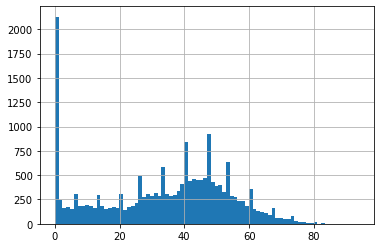

In [62]:
music_df['popularity'].hist(bins=80)

In [68]:
# Verifying if there is any track that does not have the preview. 
music_df['preview_url'].isna().sum()

0

In [73]:
# Checking how many tracks have the same URL Link - same music
music_df[music_df['preview_url'].duplicated()]

,id,popularity,track,artists,album_name,album_type,release_date,image,duration_ms,preview_url
245,2bIlVGHTnSHDHdVZ1wfj2s,0,Panda,[Desiigner],Hip Hop Addict,compilation,2023-01-27,https://i.scdn.co/image/ab67616d0000b27328a51c...,246761,https://p.scdn.co/mp3-preview/6573bec420ce9371...
246,01tLjc0p9TEfTO2Kq6xVy8,0,Panda,[Desiigner],Rap Kings,compilation,2023-01-26,https://i.scdn.co/image/ab67616d0000b273188b78...,246761,https://p.scdn.co/mp3-preview/6573bec420ce9371...
247,5PSFHvWFHTO42vPb5rxyO7,0,Panda,[Desiigner],Super Game Day 2023 - Halftime Show - Tailgate...,compilation,2023-01-27,https://i.scdn.co/image/ab67616d0000b2730f9fc2...,246761,https://p.scdn.co/mp3-preview/6573bec420ce9371...
417,5PrUgp50eMSlL8oCF1tkQX,56,Stay Down (with 6LACK & Young Thug),"[Lil Durk, 6LACK, Young Thug]",Stay Down (with 6LACK & Young Thug),single,2020-10-30,https://i.scdn.co/image/ab67616d0000b273b71746...,169330,https://p.scdn.co/mp3-preview/85aaebf678ce90bb...
482,6QCWPC6OFUxuoaMtRe573z,57,"Fuck My Cousin, Pt. II (feat. Lil Durk)","[Lil Zay Osama, Lil Durk]","Fuck My Cousin, Pt. II (feat. Lil Durk)",single,2022-07-29,https://i.scdn.co/image/ab67616d0000b273d14479...,194560,https://p.scdn.co/mp3-preview/cd422277e6face1c...
...,...,...,...,...,...,...,...,...,...,...
19327,5jWurKiQpHczQdK37zDXjZ,8,Ridin' 5,"[Paul Wall, Lil’ Keke]",Ridin’ 5,single,2020-03-13,https://i.scdn.co/image/ab67616d0000b273d27d2a...,192261,https://p.scdn.co/mp3-preview/794b4bec921b5ddd...
19344,2MHDDFhXk9Y7cp1XDx4BJn,24,Freshman 10 (Freestyle) - 10th Anniversary,[Big Sean],Freshman 10,single,2021-07-02,https://i.scdn.co/image/ab67616d0000b27327c03e...,232568,https://p.scdn.co/mp3-preview/4888132bed075b84...
19345,1DTb02CxHzgch47DHv2olU,24,10 Feet,"[IDK, T-Pain]",USEE4YOURSELF (Deluxe),album,2021-10-29,https://i.scdn.co/image/ab67616d0000b273be42c2...,178118,https://p.scdn.co/mp3-preview/86cb458f8e01cbc6...
19352,7iFfcWLF4Mp9wk3MHw8Z8L,24,1995,[IDK],USEE4YOURSELF,album,2021-07-09,https://i.scdn.co/image/ab67616d0000b27362a89e...,248027,https://p.scdn.co/mp3-preview/aa3ebc3307f5b0a6...


In [75]:
music_df['preview_url'].duplicated().sum()

1775

In [78]:
music_df.drop_duplicates(subset=['preview_url'],inplace=True)

In [79]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17605 entries, 0 to 19379
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            17605 non-null  object
 1   popularity    17605 non-null  int64 
 2   track         17605 non-null  object
 3   artists       17605 non-null  object
 4   album_name    17605 non-null  object
 5   album_type    17605 non-null  object
 6   release_date  17605 non-null  object
 7   image         17605 non-null  object
 8   duration_ms   17605 non-null  int64 
 9   preview_url   17605 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.5+ MB


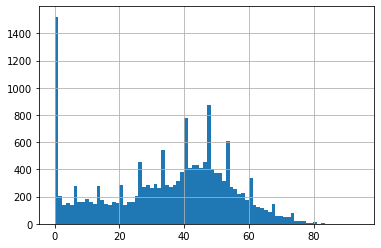

In [80]:
music_df['popularity'].hist(bins=80)

In [85]:
music_df_explode.groupby('artists').mean().sort_values('popularity',ascending=False)['popularity'].head(50)

artists
ROSALÍA              86.000000
Julieta Venegas      83.000000
Salastkbron          80.000000
Ikky                 80.000000
Villano Antillano    79.000000
Alan Gomez           79.000000
EL NOBA              79.000000
Evlay                79.000000
FIFA Sound           78.000000
The Temper Trap      78.000000
Devika Badyal        78.000000
Myriam Fares         78.000000
SUGA                 77.000000
Silambarasan TR      77.000000
Christian Nodal      77.000000
Quevedo              77.000000
Thaman S             77.000000
TeeDee               77.000000
Shubh                76.400000
Rô Rosa              76.000000
Vilen                75.000000
Sunny Malton         74.500000
SOE                  74.000000
Empire of the Sun    74.000000
Sampha               74.000000
Sanjoy               74.000000
DJ Gimi-O            74.000000
Jaani                74.000000
Avvy Sra             74.000000
Gambi                73.000000
Phonk                73.000000
Alonzo               73.000000


In [94]:
music_df_explode[music_df_explode['artists'] == 'ROSALÍA']['preview_url'].iloc[0]

'https://p.scdn.co/mp3-preview/ceef8698eae288f63a34a2473a7b8c2d5a8a06ea?cid=fd6fb1bbe7894e689fe191f6c77f244c'

In [98]:
np.percentile(music_df['popularity'],80)

51.0

### When we see the hist plot for the popularity and from the the percentile function it is clear that we can safely consider popularity=50 as our threshold i.e if the popularity is > 50, we can tell that the song would be from the top 20's 

In [ ]:
# After manually inspecting few rows, it was seen that there are a few rows that had different url for the music previews
# but the song name and the duration of the song were the same, hence it could be told that these songs are duplicates. 

In [106]:
len(track_df[track_df.duplicated(subset=['track','duration_ms'])])

2854

In [111]:
track_df[track_df.duplicated(subset=['track','duration_ms','popularity'])]['track'].value_counts()

En Cero                                  66
1-800-273-8255                           62
24/7                                     27
Let's Talk About Sex                     24
8 Missed Calls                           20
                                         ..
Big Daddy Wiz                             1
St. Thomas Native (feat. Chronic Law)     1
Gata Salvaje                              1
Good Vibes                                1
Afro Trap Part. 11 (King Kong)            1
Name: track, Length: 287, dtype: int64

In [112]:
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19380 entries, 0 to 10024
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            19380 non-null  object
 1   popularity    19380 non-null  int64 
 2   track         19380 non-null  object
 3   artists       19380 non-null  object
 4   album_name    19380 non-null  object
 5   album_type    19380 non-null  object
 6   release_date  19380 non-null  object
 7   image         19380 non-null  object
 8   duration_ms   19380 non-null  int64 
 9   preview_url   19380 non-null  object
dtypes: int64(2), object(8)
memory usage: 2.1+ MB


In [114]:
track_df.drop_duplicates(subset=['track','duration_ms','popularity'], inplace=True)

In [115]:
## Save the final dataset till now 
track_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Portfolio - Projects/Dataset/cleaned_data.csv')

In [13]:
## Check Point 1

track_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Portfolio - Projects/Dataset/cleaned_data.csv', index_col=0)

In [14]:
track_df.head()

,id,popularity,track,artists,album_name,album_type,release_date,image,duration_ms,preview_url
0,5vHe9DKp6AQw6nv4fOqTIp,36,All The Things You're Searching For (feat. Kos...,"['G-Eazy', 'Kossisko', 'Ashley Benson']",Everything's Strange Here,album,2020-07-08,https://i.scdn.co/image/ab67616d0000b273e2f96f...,237772,https://p.scdn.co/mp3-preview/df4b8a55eb4ca778...
1,356utrpfACzQkXJyE4MUmf,31,Lower Case (no cap) [feat. Killer Mike],"['Big Boi', 'Sleepy Brown', 'Killer Mike']",Lower Case (no cap) [feat. Killer Mike],single,2021-07-02,https://i.scdn.co/image/ab67616d0000b273ba789a...,187818,https://p.scdn.co/mp3-preview/8bd2d96abb2fd297...
2,3L90LHk1hAmHtBeZtHq8Lv,32,4 Da Kidz,['Kid Cudi'],Man On The Moon III: The Chosen,album,2020-12-11,https://i.scdn.co/image/ab67616d0000b2734fd23a...,184240,https://p.scdn.co/mp3-preview/53e71be48dd3fed0...
3,2kWuVqpxPnj131Z53vxF98,54,KUPALA,"['alyona alyona', 'Jerry Heil', 'ela.']",KUPALA,single,2022-07-06,https://i.scdn.co/image/ab67616d0000b273c67443...,168320,https://p.scdn.co/mp3-preview/d235c50692005fda...
4,2aeLXgFyLaMHU3blVpyqY3,39,Koala,"['Koorosh', 'Scott Storch', 'Sohrab Mj', 'Sepe...",420 Vol. 2,album,2022-08-25,https://i.scdn.co/image/ab67616d0000b273ec1d91...,216241,https://p.scdn.co/mp3-preview/d3f56051dcf584a2...


In [117]:
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18612 entries, 0 to 10024
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            18612 non-null  object
 1   popularity    18612 non-null  int64 
 2   track         18612 non-null  object
 3   artists       18612 non-null  object
 4   album_name    18612 non-null  object
 5   album_type    18612 non-null  object
 6   release_date  18612 non-null  object
 7   image         18612 non-null  object
 8   duration_ms   18612 non-null  int64 
 9   preview_url   18612 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.6+ MB


In [15]:
from sklearn.model_selection import train_test_split

# Splitting the datasets

X = track_df.drop(columns=['popularity'])
y = track_df['popularity']

X_pretr, X_holdout, y_pretr, y_holdout = train_test_split(X, y, test_size=0.10, random_state=101)
X_train, X_test, y_train, y_test = train_test_split(X_pretr, y_pretr,test_size=0.20, random_state=101)


In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13400, 9), (3350, 9), (13400,), (3350,))

Text(0, 0.5, 'No of tracks')

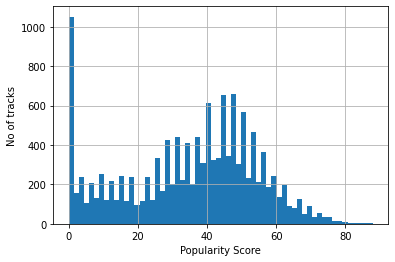

In [17]:
import matplotlib.pyplot as plt

y_train.hist(bins=60)
plt.xlabel('Popularity Score')
plt.ylabel('No of tracks')

In [18]:
# We will consider any song that has popularity score > 40, to be a hit song

y_train = y_train.map(lambda x: 1 if x >40 else 0)

In [19]:
y_train.value_counts(normalize=True)

0    0.537463
1    0.462537
Name: popularity, dtype: float64

In [20]:
y_test = y_test.map(lambda x: 1 if x >40 else 0)

In [21]:
y_test.value_counts(normalize=True)

0    0.544776
1    0.455224
Name: popularity, dtype: float64

In [133]:
!pwd

/content/drive/MyDrive/Colab Notebooks/Portfolio - Projects


In [22]:
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
import os 
import requests
from pydub import AudioSegment
from tqdm import tqdm

# Storing the current working directory in a variable
current_dir = !pwd
tqdm.pandas()


def create_directories(label):
  # Making all the three variables global, so that they can be accessed outside the function
  global full_dir,mp3_dir,wav_dir

  full_dir = f'{current_dir[0]}/data/{label}'
  mp3_dir = f'{full_dir}/mp3'
  wav_dir = f'{full_dir}/wav'

  if not os.path.exists(full_dir):
    os.mkdir(full_dir)

  if not os.path.exists(mp3_dir):
    os.mkdir(mp3_dir)

  if not os.path.exists(wav_dir):
    os.mkdir(wav_dir)

def download_mp3_music(url,directory,music_name):
  try:
    r = requests.get(url, timeout=2)
    with open(f'{directory}/{music_name}.mp3', 'wb') as f:
        f.write(r.content)
    print(f'mp3 downloaded: {music_name}.mp3')
  except:
    print(f'mp3 timeout: index {music_name}')

def fetch_mp3(data):
  data.progress_apply(lambda x: (download_mp3_music(x['preview_url'],mp3_dir,x['track'])), axis=1)

def fetch_wav(data):
  for file in tqdm(os.listdir(mp3_dir)):
    if file.startswith('.'):
      continue
    source = f'{mp3_dir}/{file}'
    destination = f'{wav_dir}/{file.split(".")[0]}.wav'

    AudioSegment.from_mp3(source).export(destination, format='wav')
    audio_file_name = file.split(".mp3")[0]
    data.loc[data['track'] == audio_file_name,'file_location'] = destination

  return data


# for file in os.listdir(mp3_dir):
#   print(file.split(".mp3")[0])



In [185]:
track_df.head(2).apply(lambda x: (x['preview_url'],x['track']), axis=1)

0    (https://p.scdn.co/mp3-preview/df4b8a55eb4ca77...
1    (https://p.scdn.co/mp3-preview/8bd2d96abb2fd29...
dtype: object

In [235]:
X_train.shape

(13400, 9)

In [229]:
pd.options.mode.chained_assignment = None

In [26]:
create_directories(label='train')
fetch_mp3(data=X_train)

In [27]:
fetch_wav(data=X_train)

100%|██████████| 11455/11455 [1:46:01<00:00,  1.80it/s]


,id,track,artists,album_name,album_type,release_date,image,duration_ms,preview_url,file_location
2643,1DA6UYm3jqf8b3ecWUbo6i,Skinny Suge,"['Freddie Gibbs', 'The Alchemist']",Alfredo,album,2020-05-29,https://i.scdn.co/image/ab67616d0000b27352c240...,172426,https://p.scdn.co/mp3-preview/0b0e4f7225c18977...,/content/drive/MyDrive/Colab Notebooks/Portfol...
4059,6SFkLxjZLpK6PNwO91sMES,I'm God,"['Clams Casino', 'Imogen Heap']",I'm God,single,2020-04-24,https://i.scdn.co/image/ab67616d0000b273febe78...,277710,https://p.scdn.co/mp3-preview/30e8475b6118a782...,/content/drive/MyDrive/Colab Notebooks/Portfol...
7480,0ZXDVUrfkLfEqYRmljrV35,"Catch The Sun - From ""Queen & Slim: The Soundt...",['Lil Baby'],My Turn,album,2020-02-28,https://i.scdn.co/image/ab67616d0000b27357eae8...,182329,https://p.scdn.co/mp3-preview/f79d75fbc855ed54...,/content/drive/MyDrive/Colab Notebooks/Portfol...
6697,4VFw9yMd9hBuiGvtRojiNV,91er,"['Anize', '91erz']",91er,single,2020-10-10,https://i.scdn.co/image/ab67616d0000b273b3de7a...,220615,https://p.scdn.co/mp3-preview/93f19e70eb03d685...,/content/drive/MyDrive/Colab Notebooks/Portfol...
8143,1nNTOytumanwfSx7KLQAFW,777,['LosPetitFellas'],777: República Independiente del F*cking Goce,album,2021-11-05,https://i.scdn.co/image/ab67616d0000b2739a7673...,260146,https://p.scdn.co/mp3-preview/7f00a5a2a3580a8c...,/content/drive/MyDrive/Colab Notebooks/Portfol...
...,...,...,...,...,...,...,...,...,...,...
4350,5jiJXFYMQpBfPr4N1Z46oI,Virgil Discount,"['T.R.U.', '2 Chainz', 'Skooly']",Virgil Discount,single,2020-01-07,https://i.scdn.co/image/ab67616d0000b2731d154c...,138066,https://p.scdn.co/mp3-preview/4555efda038308d4...,/content/drive/MyDrive/Colab Notebooks/Portfol...
4027,5PyDFYiYh4ftZkVZB3LSX8,Freestyle 5min #12,['Zkr'],Caméléon,album,2022-03-04,https://i.scdn.co/image/ab67616d0000b273610f2d...,403615,https://p.scdn.co/mp3-preview/462ee81ef3fbe5ad...,/content/drive/MyDrive/Colab Notebooks/Portfol...
9367,3y9xlSIGdX06DwG0a9IYue,Off The Chain,['Rio Da Yung Og'],Accidental Shit Talkin,album,2020-11-13,https://i.scdn.co/image/ab67616d0000b273ccf2c0...,118886,https://p.scdn.co/mp3-preview/3bb8bfc79d4cda35...,/content/drive/MyDrive/Colab Notebooks/Portfol...
5558,6ZobnIPufkCYnBBDPztIZv,Michael & Quincy,['Nas'],King's Disease III,album,2022-11-11,https://i.scdn.co/image/ab67616d0000b273007e5f...,167724,https://p.scdn.co/mp3-preview/ae78d43a5b8f6094...,/content/drive/MyDrive/Colab Notebooks/Portfol...


In [33]:
create_directories(label='test')

In [34]:
fetch_mp3(data=X_test)

  0%|          | 3/3350 [00:00<08:49,  6.32it/s]

mp3 downloaded: Un Día Todo Se Termina (Remix).mp3
mp3 downloaded: My Gang.mp3


  0%|          | 5/3350 [00:00<08:04,  6.91it/s]

mp3 downloaded: Te Iré a Buscar - Deluxe Version.mp3
mp3 downloaded: Zet Je Goed.mp3


  0%|          | 7/3350 [00:00<07:19,  7.61it/s]

mp3 downloaded: Un Altro Show (feat. Geolier).mp3
mp3 downloaded: Vixen.mp3


  0%|          | 9/3350 [00:01<06:37,  8.41it/s]

mp3 downloaded: White Tee.mp3
mp3 downloaded: 9 on Me.mp3


  0%|          | 11/3350 [00:01<06:50,  8.12it/s]

mp3 timeout: index 7/11
mp3 downloaded: Spin Bout U.mp3


  0%|          | 14/3350 [00:01<06:13,  8.94it/s]

mp3 downloaded: Bath Salts (feat. JAY-Z & Nas).mp3
mp3 downloaded: No Talking (feat. Peezy & G.T.).mp3
mp3 downloaded: Zipper Bagz.mp3


  0%|          | 15/3350 [00:01<06:09,  9.01it/s]

mp3 downloaded: back to basics.mp3


  0%|          | 16/3350 [00:02<08:56,  6.21it/s]

mp3 downloaded: Star Station (World 6).mp3
mp3 downloaded: Changes.mp3


  1%|          | 18/3350 [00:02<07:38,  7.26it/s]

mp3 downloaded: Ghost Unmasked - Background Score.mp3
mp3 downloaded: It Could Be Worse.mp3


  1%|          | 22/3350 [00:02<06:05,  9.10it/s]

mp3 downloaded: ZZZ's.mp3
mp3 downloaded: I Might (feat. Tay Keith).mp3
mp3 downloaded: On Me.mp3


  1%|          | 24/3350 [00:02<05:31, 10.03it/s]

mp3 downloaded: I Got My Smile Back.mp3
mp3 downloaded: Kakashi.mp3
mp3 downloaded: Lion Eyes.mp3


  1%|          | 26/3350 [00:03<05:10, 10.71it/s]

mp3 downloaded: 4AM no Rio.mp3


  1%|          | 28/3350 [00:03<06:57,  7.95it/s]

mp3 downloaded: 6AM.mp3
mp3 downloaded: Channel 5 PB.mp3
mp3 downloaded: The Weekend.mp3


  1%|          | 30/3350 [00:03<06:11,  8.94it/s]

mp3 downloaded: Qvid.mp3
mp3 downloaded: Black Habits I (feat. Jackie Gouché).mp3


  1%|          | 34/3350 [00:04<06:05,  9.08it/s]

mp3 downloaded: Soul Food (feat. 8-Ball & MJG) - Crazyhouze Remix.mp3
mp3 downloaded: cocoa (with Don Toliver).mp3
mp3 downloaded: The Click (feat. Zaybang, Lil Bean, KxNG LLAMA, Lil Yee, Prezi & Lil Pete).mp3


  1%|          | 36/3350 [00:04<05:35,  9.88it/s]

mp3 downloaded: Digging My Grave.mp3
mp3 downloaded: Be U (216 Hz) (feat. iann dior) - Inspired by "Maejor Frequency".mp3
mp3 downloaded: Hate And Gasoline.mp3


  1%|          | 40/3350 [00:04<05:59,  9.20it/s]

mp3 downloaded: 3 Letters.mp3
mp3 downloaded: Broke Up In Miami.mp3
mp3 downloaded: Frames (Who's Gonna Know).mp3


  1%|▏         | 42/3350 [00:04<05:37,  9.81it/s]

mp3 downloaded: drunk face.mp3
mp3 downloaded: Fingers Crossed (feat. Veeze).mp3
mp3 downloaded: Deja Vu.mp3


  1%|▏         | 44/3350 [00:05<05:40,  9.72it/s]

mp3 downloaded: Pain & Strife (feat. Offset).mp3


  1%|▏         | 46/3350 [00:05<06:32,  8.41it/s]

mp3 downloaded: Zafiro.mp3
mp3 downloaded: Varias Madrugadas.mp3
mp3 downloaded: WUNNA.mp3


  1%|▏         | 50/3350 [00:05<05:30,  9.99it/s]

mp3 downloaded: Betty (Get Money).mp3
mp3 downloaded: Body.mp3
mp3 downloaded: Need It.mp3


  2%|▏         | 52/3350 [00:06<05:43,  9.59it/s]

mp3 downloaded: c l o s e.mp3
mp3 downloaded: Ni Temi.mp3


  2%|▏         | 54/3350 [00:06<05:20, 10.29it/s]

mp3 downloaded: banyan tree - interlude.mp3
mp3 downloaded: Wir sind X.mp3
mp3 downloaded: Rick Flair.mp3


  2%|▏         | 58/3350 [00:06<04:59, 10.99it/s]

mp3 downloaded: Just Like Martin.mp3
mp3 downloaded: Nocturna - Remix.mp3
mp3 downloaded: Vlad TV (feat. Stove God Cooks, Symba & Major Myjah).mp3


  2%|▏         | 60/3350 [00:06<05:25, 10.12it/s]

mp3 downloaded: Kẻ Xuất Chúng.mp3
mp3 downloaded: Starter Kit (feat. VVSNCE).mp3
mp3 downloaded: no sense.mp3


  2%|▏         | 62/3350 [00:06<05:15, 10.41it/s]

mp3 downloaded: King Jesus.mp3
mp3 downloaded: Shoes.mp3


  2%|▏         | 66/3350 [00:07<05:39,  9.67it/s]

mp3 downloaded: Good Vibes (Za).mp3
mp3 downloaded: Nutshell Pt. 2.mp3
mp3 downloaded: Bizarro.mp3


  2%|▏         | 68/3350 [00:07<06:16,  8.72it/s]

mp3 downloaded: Q Said Snap.mp3
mp3 downloaded: Vệ Tinh.mp3
mp3 downloaded: Zipette.mp3


  2%|▏         | 70/3350 [00:08<06:58,  7.84it/s]

mp3 downloaded: Psalm 83 Hidden Ones.mp3
mp3 downloaded: Onto Me (with UMI).mp3


  2%|▏         | 72/3350 [00:08<06:42,  8.14it/s]

mp3 downloaded: Peleja de Xique Chico.mp3
mp3 downloaded: Jumpin (feat. Polo G).mp3


  2%|▏         | 76/3350 [00:08<06:05,  8.97it/s]

mp3 downloaded: Summer 96.mp3
mp3 downloaded: Unfuckwithable (Bonus Track from Moosetape).mp3
mp3 downloaded: Quizas - Remix.mp3


  2%|▏         | 78/3350 [00:08<06:29,  8.40it/s]

mp3 downloaded: Broke In A Minute (feat. XO).mp3
mp3 downloaded: 3 Barat.mp3


  2%|▏         | 80/3350 [00:09<05:45,  9.48it/s]

mp3 downloaded: SIERRA NIGHTS (feat. Ryan Beatty).mp3
mp3 downloaded: Still 40 Deep.mp3
mp3 downloaded: Nasty.mp3


  2%|▏         | 82/3350 [00:09<05:20, 10.19it/s]

mp3 downloaded: Concrète.mp3
mp3 downloaded: ME & U.mp3


  3%|▎         | 86/3350 [00:09<05:12, 10.45it/s]

mp3 downloaded: Moana.mp3
mp3 downloaded: Alfred’s Theme.mp3
mp3 downloaded: Apply Pressure (feat. Kevin Gates).mp3


  3%|▎         | 88/3350 [00:09<05:37,  9.67it/s]

mp3 downloaded: Coal.mp3
mp3 downloaded: From Florida With Love.mp3


  3%|▎         | 91/3350 [00:10<05:22, 10.11it/s]

mp3 downloaded: -42.mp3
mp3 downloaded: Mi Niña - Remix.mp3
mp3 downloaded: Juro Quererte.mp3


  3%|▎         | 93/3350 [00:10<06:18,  8.60it/s]

mp3 downloaded: M.I.L.S 3.mp3
mp3 downloaded: 808.mp3


  3%|▎         | 94/3350 [00:10<06:24,  8.46it/s]

mp3 downloaded: Yeah Yeah (feat. Future & Lil Keed).mp3


  3%|▎         | 97/3350 [00:10<06:14,  8.69it/s]

mp3 downloaded: 777.mp3
mp3 downloaded: Solo Una Vez.mp3
mp3 downloaded: Who Is Him (feat. Pooh Shiesty).mp3


  3%|▎         | 99/3350 [00:11<05:39,  9.57it/s]

mp3 downloaded: m y . l i f e (with 21 Savage & Morray).mp3
mp3 downloaded: Square Hoes 3.mp3


  3%|▎         | 101/3350 [00:11<05:54,  9.16it/s]

mp3 downloaded: Run It Back (feat. 03 Greedo).mp3
mp3 downloaded: Lift Me Up.mp3
mp3 downloaded: Rabbit Vision.mp3


  3%|▎         | 104/3350 [00:11<05:56,  9.11it/s]

mp3 downloaded: Lonely Night - Zero T Vocal Mix.mp3
mp3 timeout: index 64/7


  3%|▎         | 106/3350 [00:11<05:19, 10.17it/s]

mp3 downloaded: Take_it_Back_v2 - Charlie Heat Version.mp3
mp3 downloaded: MXB.mp3
mp3 downloaded: Me Voy Pa'l Infierno.mp3


  3%|▎         | 110/3350 [00:12<04:55, 10.97it/s]

mp3 downloaded: Message To The Man.mp3
mp3 downloaded: Act Up.mp3
mp3 downloaded: ngủ một mình (tình rất tình).mp3


  3%|▎         | 112/3350 [00:12<05:08, 10.51it/s]

mp3 downloaded: Birthday.mp3
mp3 downloaded: Sorry 4 The Wait.mp3
mp3 downloaded: ZUCKER.mp3


  3%|▎         | 116/3350 [00:13<06:33,  8.23it/s]

mp3 downloaded: 8 Figures.mp3
mp3 downloaded: Cenizas En Mi Libreta.mp3
mp3 downloaded: Under The Sun (with J. Cole & Lute feat. DaBaby).mp3


  4%|▎         | 119/3350 [00:13<05:52,  9.17it/s]

mp3 downloaded: If You Still wit Me.mp3
mp3 downloaded: 55 Himno.mp3
mp3 downloaded: LET'S PRAY (feat. Don Toliver & Travis Scott).mp3


  4%|▎         | 121/3350 [00:13<05:53,  9.13it/s]

mp3 downloaded: Unlocked.mp3
mp3 downloaded: Head High.mp3


  4%|▎         | 124/3350 [00:13<05:31,  9.72it/s]

mp3 downloaded: Fat Sikur 7.mp3
mp3 downloaded: Again.mp3
mp3 downloaded: 321.mp3


  4%|▍         | 126/3350 [00:14<05:41,  9.44it/s]

mp3 downloaded: Cuando Quieras.mp3
mp3 downloaded: U A Fraud.mp3


  4%|▍         | 128/3350 [00:14<06:12,  8.64it/s]

mp3 downloaded: Zoom.mp3
mp3 downloaded: Brooklyn Zoo II (Tiger Crane) - 2020 Remaster.mp3


  4%|▍         | 130/3350 [00:14<08:01,  6.69it/s]

mp3 downloaded: Estamo en Cero.mp3
mp3 downloaded: Nonante-huit.mp3


  4%|▍         | 132/3350 [00:14<06:38,  8.09it/s]

mp3 downloaded: Perdida.mp3
mp3 downloaded: idk that bitch (feat. G Herbo).mp3
mp3 downloaded: Faded With A Stranger.mp3


  4%|▍         | 134/3350 [00:15<05:46,  9.28it/s]

mp3 downloaded: Angry toy$ - Prod. Ray Qwa.mp3
mp3 downloaded: Robbery Part 4.mp3


  4%|▍         | 137/3350 [00:15<06:01,  8.89it/s]

mp3 downloaded: Afro Trap Pt. 7 (La puissance).mp3
mp3 downloaded: Big Booty.mp3


  4%|▍         | 139/3350 [00:15<05:27,  9.82it/s]

mp3 downloaded: COOLER THAN A BITCH (feat. Roddy Ricch).mp3
mp3 downloaded: Eddie Kingston (feat. Rome Streetz).mp3
mp3 downloaded: How.mp3


  4%|▍         | 141/3350 [00:15<05:11, 10.30it/s]

mp3 downloaded: No Problem.mp3
mp3 downloaded: ztb.mp3


  4%|▍         | 143/3350 [00:15<05:22,  9.94it/s]

mp3 timeout: index CHOPPED IT UP w/ FAROUK
mp3 downloaded: ...The Make Up.mp3


  4%|▍         | 146/3350 [00:16<07:03,  7.57it/s]

mp3 downloaded: The Price of Growing Up.mp3
mp3 downloaded: BOSS (DG X RAGA X RAKHT).mp3


  4%|▍         | 148/3350 [00:16<06:07,  8.71it/s]

mp3 downloaded: Super Bounce.mp3
mp3 downloaded: Where Is My Mind?.mp3


  4%|▍         | 150/3350 [00:16<06:10,  8.63it/s]

mp3 downloaded: Nie mehr auf Wolke 7.mp3
mp3 downloaded: Mind Games (feat. Jackson Wang).mp3
mp3 downloaded: Ready For Love.mp3


  5%|▍         | 153/3350 [00:17<06:13,  8.57it/s]

mp3 downloaded: Babas (with Keisha Plum).mp3
mp3 downloaded: 6 UHR.mp3
mp3 downloaded: Big Tymer (feat. Z Money & AFN Peso).mp3


  5%|▍         | 156/3350 [00:17<07:08,  7.46it/s]

mp3 downloaded: Disco 505.mp3
mp3 downloaded: Who Am I.mp3


  5%|▍         | 158/3350 [00:17<06:09,  8.64it/s]

mp3 downloaded: I HAD 2.mp3
mp3 downloaded: Blue Bills (feat. $NOT & Fenix Flexin).mp3
mp3 downloaded: Keys.mp3


  5%|▍         | 161/3350 [00:18<06:30,  8.16it/s]

mp3 downloaded: Polish adrenaline x Boom Boom x Ojej.mp3
mp3 downloaded: 80 On Me.mp3


  5%|▍         | 163/3350 [00:18<05:48,  9.14it/s]

mp3 downloaded: Apart.mp3
mp3 downloaded: Viral Moment.mp3


  5%|▍         | 165/3350 [00:18<06:25,  8.27it/s]

mp3 downloaded: Kamlee.mp3
mp3 downloaded: Jump Off.mp3


  5%|▍         | 167/3350 [00:18<05:38,  9.42it/s]

mp3 downloaded: Smile #6 (see page 198 and 158).mp3
mp3 downloaded: Pistol.mp3


  5%|▌         | 169/3350 [00:19<07:24,  7.15it/s]

mp3 downloaded: 7 Days A Week.mp3
mp3 downloaded: #RapSinCorte XXXIII.mp3


  5%|▌         | 171/3350 [00:19<06:05,  8.69it/s]

mp3 downloaded: Shmurda Talk (feat. Rowdy Rebel).mp3
mp3 downloaded: Eenie Meenie.mp3


  5%|▌         | 174/3350 [00:19<06:35,  8.03it/s]

mp3 downloaded: 808 Baby.mp3
mp3 downloaded: 2Tone Featuring YoungBoy Never Broke Again.mp3
mp3 downloaded: You Gon’ Learn (feat. Royce Da 5'9" & White Gold).mp3


  5%|▌         | 175/3350 [00:20<06:41,  7.92it/s]

mp3 downloaded: Young Seattle 5.mp3


  5%|▌         | 178/3350 [00:20<08:09,  6.49it/s]

mp3 downloaded: Fra Bagdad til Ground Zero.mp3
mp3 downloaded: Coming In Hot - Wuki Remix.mp3
mp3 downloaded: Real Numbers (feat. Larry June).mp3


  5%|▌         | 180/3350 [00:20<06:40,  7.92it/s]

mp3 downloaded: Hà Nội Xịn.mp3
mp3 downloaded: End Of Story (Bonus).mp3
mp3 downloaded: Carnival (feat. AZ).mp3


  5%|▌         | 182/3350 [00:20<05:52,  8.98it/s]

mp3 downloaded: forget me too (feat. Halsey).mp3


  5%|▌         | 184/3350 [00:21<07:01,  7.52it/s]

mp3 downloaded: Wesh Enfoiré #3.mp3
mp3 downloaded: XMASSAKER 2.mp3


  6%|▌         | 186/3350 [00:21<06:11,  8.52it/s]

mp3 downloaded: Fresh Out The Bank (feat. Dave).mp3
mp3 downloaded: Holy Flow.mp3
mp3 downloaded: All This.mp3


  6%|▌         | 188/3350 [00:21<05:39,  9.31it/s]

mp3 downloaded: NOT FAIR (feat. Corbin).mp3
mp3 downloaded: Rambo.mp3
mp3 downloaded: SNOFALL.mp3

  6%|▌         | 190/3350 [00:21<05:34,  9.45it/s]

  6%|▌         | 192/3350 [00:22<06:44,  7.81it/s]

mp3 downloaded: Shamrocks And Shenanigans - 30 Years Remaster.mp3
mp3 downloaded: Sensacion Del Bloque.mp3


  6%|▌         | 193/3350 [00:22<07:04,  7.44it/s]

mp3 downloaded: Cypher No. 4.mp3
mp3 downloaded: Margiela Split Toes (feat. Mach-Hommy).mp3


  6%|▌         | 197/3350 [00:22<06:45,  7.78it/s]

mp3 downloaded: Zero.mp3
mp3 downloaded: Twisted (feat. 42 Dugg).mp3
mp3 downloaded: On That Time.mp3
mp3 timeout: index WAKE UP / I'M ALIVE


  6%|▌         | 200/3350 [00:23<08:08,  6.44it/s]

mp3 downloaded: 6:00 AM.mp3
mp3 downloaded: 3ashra.mp3


  6%|▌         | 202/3350 [00:23<06:54,  7.60it/s]

mp3 downloaded: Can't Complain (feat. Reaper).mp3
mp3 downloaded: Take It To Trial (feat. Yak Gotti).mp3
mp3 downloaded: Walk the Plank.mp3


  6%|▌         | 206/3350 [00:24<05:55,  8.85it/s]

mp3 downloaded: X.mp3
mp3 downloaded: Poppin.mp3
mp3 downloaded: Cereal (feat. Kenny Mason).mp3


  6%|▌         | 208/3350 [00:24<05:52,  8.91it/s]

mp3 downloaded: El Doctorado - Remix.mp3
mp3 downloaded: Lost and Found Freestyle 2019.mp3


  6%|▋         | 210/3350 [00:24<05:22,  9.75it/s]

mp3 downloaded: Nana.mp3
mp3 downloaded: Bleach (feat. Denzel Curry).mp3


  6%|▋         | 212/3350 [00:24<05:35,  9.35it/s]

mp3 downloaded: 7 Knots.mp3
mp3 downloaded: REMIX.mp3


  6%|▋         | 214/3350 [00:24<05:56,  8.81it/s]

mp3 downloaded: Cypher (Bobby Van Damme x Obby x Yassine x Adaver x Mohams).mp3
mp3 downloaded: LOCAL JOKER.mp3


  6%|▋         | 216/3350 [00:25<05:27,  9.56it/s]

mp3 downloaded: Cold Feet.mp3
mp3 downloaded: Dracula.mp3


  7%|▋         | 219/3350 [00:25<06:07,  8.52it/s]

mp3 downloaded: 808.mp3
mp3 downloaded: Cash Machine (Remix) [feat. Dillon Francis & grandson].mp3
mp3 downloaded: 24 (feat. Aha Gazelle & Miguel Fresco).mp3


  7%|▋         | 220/3350 [00:25<06:43,  7.76it/s]

mp3 downloaded: TRACK 81 (2008).mp3
mp3 downloaded: Worst Comes To Worst.mp3


  7%|▋         | 223/3350 [00:26<06:24,  8.14it/s]

mp3 downloaded: Zevs.mp3
mp3 downloaded: Quiero volar.mp3


  7%|▋         | 224/3350 [00:26<08:47,  5.93it/s]

mp3 downloaded: 700 Block.mp3
mp3 downloaded: No Interviews.mp3


  7%|▋         | 226/3350 [00:26<07:27,  6.98it/s]

mp3 downloaded: Money, Sex, Drugs.mp3


  7%|▋         | 228/3350 [00:26<08:08,  6.39it/s]

mp3 downloaded: Estilo 90s (Instrumental).mp3
mp3 downloaded: Channel 5.mp3


  7%|▋         | 231/3350 [00:27<06:55,  7.51it/s]

mp3 downloaded: Voy Contra 8.mp3
mp3 downloaded: X-Wing.mp3
mp3 downloaded: Cold Champagne for Lunch.mp3


  7%|▋         | 234/3350 [00:27<05:44,  9.03it/s]

mp3 downloaded: Nice & Good.mp3
mp3 downloaded: 3 Estrellas en el Conjunto.mp3
mp3 downloaded: Juice WRLD DID (feat. Juice WRLD).mp3


  7%|▋         | 235/3350 [00:27<05:38,  9.20it/s]

mp3 downloaded: El Frankie de La Joya.mp3
mp3 downloaded: I Throw A Fit.mp3


  7%|▋         | 237/3350 [00:27<05:38,  9.20it/s]

mp3 downloaded: 7 DAYS.mp3
mp3 downloaded: 912 Tap In (Interlude).mp3
mp3 downloaded: A Lo Xolo.mp3


  7%|▋         | 242/3350 [00:28<06:05,  8.49it/s]

mp3 downloaded: Xares.mp3
mp3 downloaded: UNO QUITAO Y OTRO PUESTO.mp3
mp3 downloaded: Quizás.mp3


  7%|▋         | 245/3350 [00:28<05:27,  9.47it/s]

mp3 downloaded: Surround Sound.mp3
mp3 downloaded: Still The One.mp3
mp3 downloaded: Cuando Quieras.mp3
mp3 downloaded: HEY BIG HEAD.mp3


  7%|▋         | 247/3350 [00:29<06:15,  8.26it/s]

mp3 timeout: index 5/17
mp3 downloaded: VERT MUSIC.mp3


  7%|▋         | 249/3350 [00:29<06:41,  7.72it/s]

mp3 downloaded: Ya No Quiero Mas.mp3
mp3 downloaded: Velocidad.mp3


  8%|▊         | 252/3350 [00:29<06:17,  8.21it/s]

mp3 downloaded: Sex i Narko.mp3
mp3 downloaded: 5 Gram.mp3


  8%|▊         | 253/3350 [00:29<06:28,  7.97it/s]

mp3 downloaded: Ot Commute.mp3
mp3 downloaded: Bandsville.mp3


  8%|▊         | 257/3350 [00:30<05:28,  9.43it/s]

mp3 downloaded: 7.11.mp3
mp3 downloaded: Bahara X.mp3
mp3 downloaded: Save Us.mp3


  8%|▊         | 260/3350 [00:30<05:09, 10.00it/s]

mp3 downloaded: Aquamarine (feat. Michael Kiwanuka).mp3
mp3 downloaded: Quarantine Party.mp3
mp3 downloaded: Better Believe (ft The Weeknd).mp3


  8%|▊         | 263/3350 [00:30<05:17,  9.72it/s]

mp3 downloaded: Back Home.mp3
mp3 downloaded: Go Off.mp3
mp3 downloaded: No Me Acostumbro.mp3


  8%|▊         | 266/3350 [00:31<05:01, 10.21it/s]

mp3 downloaded: gorgeous.mp3
mp3 downloaded: Pack a Lunch (with Redman).mp3
mp3 downloaded: Rockstar.mp3


  8%|▊         | 268/3350 [00:31<05:38,  9.12it/s]

mp3 downloaded: Interlude.mp3
mp3 downloaded: Bodies (feat. Pooh Shiesty).mp3


  8%|▊         | 270/3350 [00:31<05:32,  9.27it/s]

mp3 downloaded: She's Lookin' For Me.mp3
mp3 downloaded: Neón.mp3


  8%|▊         | 272/3350 [00:31<06:02,  8.50it/s]

mp3 downloaded: 3 minutes (feat. Philthy Rich).mp3
mp3 downloaded: 5 tähden baby (feat. william).mp3


  8%|▊         | 273/3350 [00:32<06:12,  8.27it/s]

mp3 downloaded: Mal Querido.mp3


  8%|▊         | 275/3350 [00:32<10:30,  4.88it/s]

mp3 downloaded: Round 8(L'Oeil Du Tigre).mp3
mp3 downloaded: Z.mp3


  8%|▊         | 277/3350 [00:33<09:55,  5.16it/s]

mp3 downloaded: 5584.mp3
mp3 downloaded: MAD 2 THE MAX.mp3


  8%|▊         | 279/3350 [00:33<08:03,  6.36it/s]

mp3 downloaded: Reminded Myself (feat. Kato2x).mp3
mp3 downloaded: Relax, Not Klyde.mp3


  8%|▊         | 281/3350 [00:33<08:05,  6.32it/s]

mp3 downloaded: Qualcosa Di Grande (feat. Madame).mp3
mp3 downloaded: WAIT FOR U (feat. Drake & Tems) - Instrumental.mp3


  8%|▊         | 283/3350 [00:33<07:36,  6.72it/s]

mp3 downloaded: Warm.mp3
mp3 downloaded: Over The Top (feat. Drake).mp3


  9%|▊         | 285/3350 [00:34<07:54,  6.46it/s]

mp3 downloaded: Free Jamell (feat. YNW Melly).mp3
mp3 downloaded: 2Ja.mp3


  9%|▊         | 288/3350 [00:34<08:01,  6.36it/s]

mp3 timeout: index Ракета, Твой день настал - Live 8/X 2022
mp3 downloaded: Not Over Yet (feat. Tom Grennan).mp3
mp3 downloaded: Kamakrazee.mp3


  9%|▊         | 290/3350 [00:35<08:59,  5.67it/s]

mp3 downloaded: Arkham 99.mp3
mp3 downloaded: Angelina - aus "Sing meinen Song, Vol. 3".mp3


  9%|▊         | 292/3350 [00:35<08:26,  6.04it/s]

mp3 downloaded: 7 มหัศจรรย์ “ 7 amazing”.mp3
mp3 downloaded: 3iytou Lbouliss.mp3


  9%|▊         | 293/3350 [00:35<07:40,  6.64it/s]

mp3 downloaded: Joe Dirt.mp3


  9%|▉         | 295/3350 [00:36<08:46,  5.80it/s]

mp3 downloaded: XOXO.mp3
mp3 downloaded: Te Perdí.mp3
mp3 downloaded: Keys Under Palm Trees.mp3


  9%|▉         | 297/3350 [00:36<07:39,  6.65it/s]

mp3 downloaded: MAZZA (feat. A$AP Rocky).mp3
mp3 downloaded: Rich Nigga Shit (with Juice WRLD).mp3


  9%|▉         | 299/3350 [00:36<07:12,  7.05it/s]

mp3 downloaded: Keep It 500.mp3


  9%|▉         | 301/3350 [00:37<07:53,  6.45it/s]

mp3 downloaded: Stunde Null.mp3
mp3 timeout: index One More Chance / Stay with Me - Remix; 2007 Remaster


  9%|▉         | 302/3350 [00:37<07:58,  6.37it/s]

mp3 downloaded: Flashback 90s.mp3


  9%|▉         | 304/3350 [00:37<08:24,  6.04it/s]

mp3 downloaded: Kapitel 8: Ferris, DJ Stylewarz und die Mongo Clikke - 3.mp3
mp3 downloaded: XXL.mp3


  9%|▉         | 306/3350 [00:37<07:34,  6.70it/s]

mp3 downloaded: Party Up (Up In Here).mp3
mp3 downloaded: Stay Ur Distance - Bonus.mp3


  9%|▉         | 308/3350 [00:38<07:15,  6.98it/s]

mp3 downloaded: Can’t Party Here No More.mp3
mp3 downloaded: Spatula.mp3


  9%|▉         | 310/3350 [00:38<07:40,  6.60it/s]

mp3 downloaded: 6ixsick6ix.mp3
mp3 downloaded: 5:55 (Upload).mp3


  9%|▉         | 312/3350 [00:38<07:27,  6.78it/s]

mp3 downloaded: BOMBÓN.mp3
mp3 downloaded: Machayenge 3.mp3


  9%|▉         | 314/3350 [00:38<06:36,  7.65it/s]

mp3 downloaded: 47 Bars from the Ak.mp3
mp3 downloaded: 7ajir.mp3


  9%|▉         | 315/3350 [00:39<06:36,  7.66it/s]

mp3 downloaded: Que Onda.mp3


  9%|▉         | 318/3350 [00:39<06:56,  7.28it/s]

mp3 downloaded: Still Dreamin (with JID & Lute feat. 6LACK).mp3
mp3 downloaded: Double Bacc.mp3
mp3 downloaded: Walkin (feat. Pooh Shiesty).mp3


 10%|▉         | 320/3350 [00:39<06:22,  7.92it/s]

mp3 downloaded: Pro Freak (with Doechii, Fatman Scoop).mp3
mp3 downloaded: 3aslya.mp3


 10%|▉         | 322/3350 [00:39<05:37,  8.97it/s]

mp3 downloaded: The Dungeon.mp3
mp3 downloaded: Late To Da Party (F*CK BET) (feat. YoungBoy Never Broke Again).mp3


 10%|▉         | 324/3350 [00:40<05:40,  8.89it/s]

mp3 downloaded: Black and Yellow.mp3
mp3 downloaded: I Got 5.mp3


 10%|▉         | 327/3350 [00:40<05:07,  9.82it/s]

mp3 downloaded: September 7th.mp3
mp3 downloaded: BANDS UP.mp3
mp3 downloaded: GED (Gettin Every Dolla).mp3


 10%|▉         | 330/3350 [00:40<05:18,  9.49it/s]

mp3 downloaded: Gold Mine.mp3
mp3 downloaded: circus.mp3
mp3 downloaded: На крыше - Zuffer & Dj Simka Remix.mp3


 10%|▉         | 332/3350 [00:41<05:33,  9.06it/s]

mp3 downloaded: Juice.mp3
mp3 downloaded: Zéro comme moi.mp3


 10%|▉         | 333/3350 [00:41<05:53,  8.55it/s]

mp3 downloaded: Dirty K.mp3
mp3 downloaded: Vacio.mp3


 10%|█         | 337/3350 [00:41<06:07,  8.20it/s]

mp3 downloaded: Épine #7.mp3
mp3 downloaded: Where's Dexter.mp3
mp3 downloaded: Straight For The Bag (feat. LGP QUA).mp3
mp3 downloaded: Underdog Freestyle.mp3


 10%|█         | 340/3350 [00:42<06:45,  7.42it/s]

mp3 downloaded: 7EkMA | احمد الشعافي حكمه.mp3
mp3 downloaded: Perfekte Quelle.mp3


 10%|█         | 343/3350 [00:42<05:36,  8.94it/s]

mp3 downloaded: Up the River.mp3
mp3 downloaded: Super Hot.mp3
mp3 downloaded: feel away (feat. James Blake & Mount Kimbie).mp3


 10%|█         | 345/3350 [00:42<05:08,  9.74it/s]

mp3 downloaded: See Through.mp3
mp3 downloaded: Como Panas.mp3
mp3 downloaded: AirTron.mp3


 10%|█         | 349/3350 [00:42<04:37, 10.81it/s]

mp3 downloaded: Hngover.mp3
mp3 downloaded: Artista Y Malandro.mp3
mp3 downloaded: Lose.mp3


 10%|█         | 351/3350 [00:43<04:56, 10.12it/s]

mp3 downloaded: PUFFIN ON ZOOTIEZ.mp3
mp3 downloaded: only thing on my mind.mp3


 11%|█         | 353/3350 [00:43<05:03,  9.87it/s]

mp3 downloaded: New Gold (feat. Tame Impala and Bootie Brown) - Dom Dolla Remix.mp3
mp3 downloaded: Poca Luz.mp3


 11%|█         | 355/3350 [00:43<06:01,  8.28it/s]

mp3 downloaded: Freestyle da Madrugada 01 - Depois Eu Conserto.mp3
mp3 downloaded: Ganas de Ti.mp3
mp3 downloaded: Super Gremlin.mp3


 11%|█         | 358/3350 [00:43<05:23,  9.24it/s]

mp3 downloaded: Pensaba Que Era Fuerte.mp3
mp3 downloaded: 4 The Win.mp3


 11%|█         | 361/3350 [00:44<04:58, 10.03it/s]

mp3 downloaded: Qawafi.mp3
mp3 downloaded: 5 Star Crest (4 Vattenrum).mp3
mp3 downloaded: Alas Pa’ Volar.mp3
mp3 downloaded: Hung Up on the Label.mp3


 11%|█         | 363/3350 [00:44<06:17,  7.91it/s]

mp3 downloaded: Shor Machega (From "Mumbai Saga").mp3


 11%|█         | 364/3350 [00:44<08:03,  6.18it/s]

mp3 downloaded: 60 Deep.mp3
mp3 downloaded: Ashes of Luxury.mp3


 11%|█         | 367/3350 [00:45<06:55,  7.18it/s]

mp3 downloaded: Leaving Heaven (feat. Skylar Grey).mp3
mp3 downloaded: STILL TRE.mp3


 11%|█         | 369/3350 [00:45<06:05,  8.15it/s]

mp3 downloaded: Thinking with My Dick (feat. Juicy J).mp3
mp3 downloaded: Que Casualidad.mp3


 11%|█         | 370/3350 [00:45<06:17,  7.90it/s]

mp3 downloaded: Get It On The Floor.mp3
mp3 downloaded: Young Wheezy (with Gunna).mp3


 11%|█         | 373/3350 [00:45<05:59,  8.27it/s]

mp3 downloaded: Getting Better.mp3
mp3 downloaded: Phú Quý Bò Viên (8ight).mp3


 11%|█         | 375/3350 [00:46<06:02,  8.20it/s]

mp3 downloaded: Wild Ones.mp3
mp3 downloaded: Thankful, 1 Thessalonians 5:18.mp3


 11%|█▏        | 377/3350 [00:46<05:07,  9.67it/s]

mp3 downloaded: Burner on Deck (feat. Pop Smoke & Young Adz).mp3
mp3 downloaded: One Call Away.mp3


 11%|█▏        | 378/3350 [00:46<05:27,  9.08it/s]

mp3 downloaded: Oito Cinco Stilo #4 (DiCaprio).mp3


 11%|█▏        | 381/3350 [00:46<05:46,  8.56it/s]

mp3 downloaded: Atlanta 96.mp3
mp3 downloaded: Kay Flock.mp3
mp3 downloaded: Dirt.mp3


 11%|█▏        | 383/3350 [00:47<05:18,  9.33it/s]

mp3 downloaded: 1 Scale (feat. G Herbo).mp3
mp3 downloaded: Spam mon phone (feat. 8ruki).mp3


 12%|█▏        | 386/3350 [00:47<05:28,  9.01it/s]

mp3 downloaded: Ta' To'a 7.mp3
mp3 downloaded: Area 51 Remix (Feat. Pooh Shiesty).mp3
mp3 downloaded: Maui Wowie.mp3


 12%|█▏        | 388/3350 [00:47<05:23,  9.14it/s]

mp3 downloaded: Linked Up.mp3
mp3 downloaded: SANITKA X DUNDEE.mp3


 12%|█▏        | 391/3350 [00:47<05:03,  9.75it/s]

mp3 downloaded: I Dance (with Duki, feat. Cuco).mp3
mp3 downloaded: On One.mp3
mp3 downloaded: Whole Gang Buss (feat. 42 Cheez, Reaper & Tae Money).mp3


 12%|█▏        | 392/3350 [00:48<05:43,  8.60it/s]

mp3 downloaded: Let's Talk About Sex.mp3
mp3 downloaded: Vapor.mp3


 12%|█▏        | 394/3350 [00:48<05:35,  8.81it/s]

mp3 downloaded: Block Game, Pt. 6.mp3
mp3 downloaded: 200.mp3


 12%|█▏        | 398/3350 [00:48<04:58,  9.90it/s]

mp3 downloaded: We Paid (feat. 42 Dugg).mp3
mp3 downloaded: The Mission.mp3
mp3 downloaded: Born With It.mp3


 12%|█▏        | 400/3350 [00:48<05:02,  9.75it/s]

mp3 timeout: index Yo Nunca Me Quedo Atrás/ El Funeral / Yamilette / Están Locos / Te Ves Bien / No Te Canses / Camuflash / Donde Mi No Vengas (Live)
mp3 downloaded: Five on Us.mp3


 12%|█▏        | 402/3350 [00:49<04:39, 10.54it/s]

mp3 downloaded: Not A Rapper.mp3
mp3 downloaded: La Ruta.mp3
mp3 downloaded: 4 Da Kidz.mp3


 12%|█▏        | 406/3350 [00:49<04:20, 11.29it/s]

mp3 downloaded: The Root Of All Evil.mp3
mp3 downloaded: Embrace The Martian.mp3
mp3 downloaded: Tuve Que Caer.mp3


 12%|█▏        | 408/3350 [00:49<04:54, 10.00it/s]

mp3 downloaded: All Dat (with Megan Thee Stallion).mp3
mp3 downloaded: Three Eyes Open.mp3


 12%|█▏        | 410/3350 [00:49<04:46, 10.27it/s]

mp3 downloaded: Mmm Hmm.mp3
mp3 downloaded: Us vs. Them (feat. Gucci Mane).mp3


 12%|█▏        | 412/3350 [00:49<04:57,  9.88it/s]

mp3 downloaded: Hanoo Zendam.mp3
mp3 downloaded: booman.mp3
mp3 downloaded: LateNightCadillac.mp3


 12%|█▏        | 414/3350 [00:50<04:56,  9.90it/s]

mp3 downloaded: Triade (feat. Zefor).mp3


 12%|█▏        | 416/3350 [00:50<05:51,  8.34it/s]

mp3 downloaded: 04:30 - Remix.mp3
mp3 downloaded: Es Mentira.mp3
mp3 downloaded: Fatos NANO.mp3


 13%|█▎        | 420/3350 [00:50<05:28,  8.93it/s]

mp3 downloaded: Can't Get Enough (feat. Rachel Chinouriri & Venna).mp3
mp3 downloaded: Siento Que Me Siguen.mp3
mp3 downloaded: LO TENGO.mp3


 13%|█▎        | 422/3350 [00:51<06:52,  7.10it/s]

mp3 downloaded: Apocalypze ('021).mp3
mp3 downloaded: Apaga La Luz - Pablo Fierro OK 808 Mix.mp3


 13%|█▎        | 424/3350 [00:51<05:53,  8.27it/s]

mp3 downloaded: You Only Live Twice (with Lil Wayne & Rick Ross).mp3
mp3 downloaded: Richer.mp3
mp3 downloaded: Chamuko.mp3


 13%|█▎        | 426/3350 [00:51<05:12,  9.35it/s]

mp3 downloaded: Lavender Sunflower.mp3
mp3 downloaded: Joke's On You!.mp3


 13%|█▎        | 430/3350 [00:52<05:21,  9.08it/s]

mp3 downloaded: Noll Noll.mp3
mp3 downloaded: Neck & Wrist (feat. JAY-Z & Pharrell Williams).mp3
mp3 downloaded: Vaccine.mp3


 13%|█▎        | 432/3350 [00:52<05:24,  9.00it/s]

mp3 downloaded: 020 Garage.mp3
mp3 downloaded: Not PLaying.mp3
mp3 downloaded: Lo Que Mas Anele.mp3


 13%|█▎        | 434/3350 [00:52<04:59,  9.72it/s]

mp3 downloaded: Stompin.mp3
mp3 downloaded: Better Days (feat. Johnta Austin).mp3


 13%|█▎        | 437/3350 [00:52<05:21,  9.07it/s]

mp3 downloaded: Ziplock.mp3
mp3 downloaded: Emmène-moi (feat. Zaho).mp3


 13%|█▎        | 438/3350 [00:53<05:17,  9.18it/s]

mp3 downloaded: Take It To Trial (feat. Yak Gotti).mp3
mp3 downloaded: Haw Thorne.mp3


 13%|█▎        | 441/3350 [00:53<06:01,  8.05it/s]

mp3 downloaded: I Can't Quit (feat. Omari Hardwick).mp3
mp3 downloaded: 11+22=33.mp3


 13%|█▎        | 442/3350 [00:53<07:42,  6.29it/s]

mp3 downloaded: On The Bible.mp3


 13%|█▎        | 443/3350 [00:53<08:33,  5.66it/s]

mp3 downloaded: 6th Gear.mp3
mp3 downloaded: TOUT VA BIEN (feat. Ninho & Naps).mp3


 13%|█▎        | 446/3350 [00:54<07:45,  6.23it/s]

mp3 downloaded: Rap Niggas.mp3
mp3 downloaded: Voodoo.mp3


 13%|█▎        | 449/3350 [00:54<05:58,  8.10it/s]

mp3 downloaded: J'appelle Uber.mp3
mp3 downloaded: Tú y yo.mp3
mp3 downloaded: MOTHER LOVER.mp3


 13%|█▎        | 451/3350 [00:54<05:13,  9.24it/s]

mp3 downloaded: Que Onda Pai'.mp3
mp3 downloaded: Nain Ta Heere (From "Jugjugg Jeeyo").mp3
mp3 downloaded: Inside Job (feat. DJ Premier).mp3


 14%|█▎        | 455/3350 [00:55<04:36, 10.49it/s]

mp3 downloaded: SPIN BACK!.mp3
mp3 downloaded: Flashbacks (with Jeremih).mp3
mp3 downloaded: Gran Vida.mp3


 14%|█▎        | 457/3350 [00:55<04:45, 10.12it/s]

mp3 downloaded: 631 MAKES ME.mp3
mp3 downloaded: Umbrellas.mp3
mp3 downloaded: Quien Contra Mi.mp3


 14%|█▎        | 460/3350 [00:55<05:53,  8.17it/s]

mp3 downloaded: Seven-28-20.mp3
mp3 downloaded: XPIDI.mp3


 14%|█▍        | 462/3350 [00:56<05:59,  8.02it/s]

mp3 downloaded: 3.mp3
mp3 downloaded: 999.mp3


 14%|█▍        | 465/3350 [00:56<05:24,  8.89it/s]

mp3 downloaded: Chop It Up, Pt. 3.mp3
mp3 downloaded: I Guess.mp3
mp3 downloaded: Air Drop.mp3


 14%|█▍        | 466/3350 [00:56<05:32,  8.67it/s]

mp3 downloaded: Freak (feat. Quavo).mp3
mp3 downloaded: 5500 Degrees (feat. Lil Baby, 42 Dugg & Rylo Rodriguez).mp3


 14%|█▍        | 469/3350 [00:57<06:20,  7.58it/s]

mp3 downloaded: 0303 - Instrumental.mp3
mp3 downloaded: Life Of Mr. Carter.mp3


 14%|█▍        | 472/3350 [00:57<05:12,  9.21it/s]

mp3 downloaded: One More Cry.mp3
mp3 downloaded: As You Are.mp3
mp3 downloaded: Thumbing.mp3


 14%|█▍        | 474/3350 [00:57<04:55,  9.73it/s]

mp3 downloaded: Arguing, Pt. 4 (feat. KrispyLife Kidd).mp3
mp3 downloaded: DENY (feat. Tyla Yaweh).mp3


 14%|█▍        | 475/3350 [00:57<06:49,  7.02it/s]

mp3 downloaded: 9 Shots.mp3
mp3 downloaded: Clip In A Tray (feat. ScHoolboy Q).mp3


 14%|█▍        | 477/3350 [00:58<06:29,  7.37it/s]

mp3 downloaded: 5TH.mp3


 14%|█▍        | 480/3350 [00:58<07:01,  6.81it/s]

mp3 downloaded: LIGHT 001.mp3
mp3 downloaded: Dark Hearted.mp3
mp3 downloaded: highway 95.mp3


 14%|█▍        | 482/3350 [00:58<06:38,  7.20it/s]

mp3 downloaded: 7 Uzi.mp3
mp3 downloaded: 8 Slova.mp3


 14%|█▍        | 485/3350 [00:59<05:43,  8.34it/s]

mp3 downloaded: #5 (Y Así).mp3
mp3 downloaded: Letter to Takeoff.mp3
mp3 downloaded: Area 51 (Remix).mp3


 15%|█▍        | 487/3350 [00:59<05:54,  8.07it/s]

mp3 downloaded: No. 34.mp3
mp3 downloaded: Saiyaan Ji (From "Saiyaan Ji").mp3


 15%|█▍        | 489/3350 [00:59<05:43,  8.33it/s]

mp3 downloaded: IMY2 (with Kid Cudi).mp3
mp3 downloaded: Pound 4 Pound.mp3


 15%|█▍        | 492/3350 [00:59<05:00,  9.53it/s]

mp3 downloaded: I Never Judged You.mp3
mp3 downloaded: X-RAY - Harlecore Re-Edit.mp3
mp3 downloaded: Airplanes.mp3


 15%|█▍        | 494/3350 [01:00<04:39, 10.22it/s]

mp3 downloaded: Everybody’s Gay.mp3
mp3 downloaded: Qué Pasó.mp3


 15%|█▍        | 496/3350 [01:00<05:12,  9.14it/s]

mp3 downloaded: Wake Up Call (feat. Trippie Redd, Tobi & P Money) - Yoshi Remix.mp3
mp3 downloaded: Clapped Up.mp3
mp3 downloaded: love race (feat. Kellin Quinn).mp3


 15%|█▍        | 498/3350 [01:00<04:47,  9.91it/s]

mp3 downloaded: Jimmy, Brian and Mike.mp3
mp3 downloaded: Ак-47.mp3


 15%|█▍        | 501/3350 [01:01<06:28,  7.34it/s]

mp3 downloaded: 08-18 Freestyle.mp3
mp3 downloaded: Store Run.mp3


 15%|█▌        | 503/3350 [01:01<06:26,  7.36it/s]

mp3 downloaded: Brooklyn Zoo - Instrumental; 2020 Remaster.mp3
mp3 downloaded: Concerto in X Minor - Instrumental.mp3


 15%|█▌        | 506/3350 [01:01<05:33,  8.54it/s]

mp3 downloaded: The Family.mp3
mp3 downloaded: Hustle Mode (feat. Xavier Wulf).mp3
mp3 downloaded: No Bad Days (featuring Jimmie Allen).mp3


 15%|█▌        | 508/3350 [01:01<05:51,  8.08it/s]

mp3 downloaded: 02 Fifti.mp3
mp3 downloaded: 80’s.mp3
mp3 downloaded: TOP FLOOR (feat. Travis Scott).mp3
mp3 downloaded: Cositas.mp3

 15%|█▌        | 510/3350 [01:02<06:18,  7.50it/s]


mp3 downloaded: Don't Get Me Started.mp3


 15%|█▌        | 512/3350 [01:02<05:54,  8.01it/s]

mp3 downloaded: Pipa Voada (feat. Emicida).mp3
mp3 downloaded: Stuck In The Middle.mp3


 15%|█▌        | 514/3350 [01:02<05:50,  8.10it/s]

mp3 downloaded: Mr. Ocho.mp3
mp3 downloaded: Willing To Trust (with Ty Dolla $ign).mp3


 15%|█▌        | 516/3350 [01:02<05:37,  8.41it/s]

mp3 downloaded: NO LACKIN.mp3
mp3 downloaded: Stars (feat. Yasiin Bey).mp3


 15%|█▌        | 518/3350 [01:03<05:27,  8.66it/s]

mp3 downloaded: Episode 3 : Cul-de-sac.mp3


 15%|█▌        | 519/3350 [01:03<06:41,  7.06it/s]

mp3 downloaded: Twenty Four Seven.mp3
mp3 downloaded: Black Out.mp3


 16%|█▌        | 522/3350 [01:03<06:18,  7.47it/s]

mp3 downloaded: Patty Cake.mp3
mp3 downloaded: Re Route.mp3


 16%|█▌        | 524/3350 [01:04<08:23,  5.62it/s]

mp3 downloaded: Route 88.mp3
mp3 downloaded: Empire Session #01: Así Soy Yo.mp3


 16%|█▌        | 526/3350 [01:04<07:47,  6.04it/s]

mp3 downloaded: X6.mp3
mp3 downloaded: Spurs 3 (feat. Benny The Butcher & Westside Gunn).mp3


 16%|█▌        | 527/3350 [01:04<07:01,  6.70it/s]

mp3 downloaded: Que me perdone el barrio.mp3


 16%|█▌        | 530/3350 [01:05<06:56,  6.77it/s]

mp3 downloaded: 911.mp3
mp3 downloaded: Orville (feat. Like, Blu & Exile).mp3
mp3 downloaded: No Autotune 4.mp3


 16%|█▌        | 532/3350 [01:05<06:36,  7.10it/s]

mp3 downloaded: Let's Talk About Sex.mp3
mp3 downloaded: Super Chef 3.mp3


 16%|█▌        | 535/3350 [01:05<05:24,  8.67it/s]

mp3 downloaded: Here I Am.mp3
mp3 downloaded: In The UK.mp3
mp3 downloaded: Die For It (ft. Nas).mp3
mp3 downloaded: Gah Damn.mp3


 16%|█▌        | 538/3350 [01:06<06:39,  7.04it/s]

mp3 downloaded: 2 Goated (feat. Kasher Quon).mp3
mp3 downloaded: 3rd World Mozzy (feat. E Mozzy, Lil Blood & TZ Goof).mp3


 16%|█▌        | 539/3350 [01:06<06:46,  6.92it/s]

mp3 downloaded: IMMER WAS ZU TUN.mp3
mp3 downloaded: Kamikaze.mp3


 16%|█▌        | 541/3350 [01:06<07:21,  6.37it/s]

mp3 downloaded: 9.30.22.mp3
mp3 downloaded: Still Hood.mp3


 16%|█▌        | 543/3350 [01:07<07:06,  6.58it/s]

mp3 downloaded: Westlake High.mp3
mp3 downloaded: Right One (feat. Lil Wayne & Mozzy).mp3


 16%|█▋        | 547/3350 [01:07<05:45,  8.11it/s]

mp3 downloaded: Dark Place.mp3
mp3 downloaded: Quizas - Remix.mp3
mp3 downloaded: Protein.mp3


 16%|█▋        | 550/3350 [01:07<05:48,  8.04it/s]

mp3 downloaded: Linie 8.mp3
mp3 downloaded: El Chiricuazo V2.mp3
mp3 downloaded: Free Joe Exotic (feat. Sada Baby).mp3
mp3 downloaded: Party y Alcohol.mp3


 16%|█▋        | 552/3350 [01:08<06:57,  6.71it/s]

mp3 downloaded: Sparo a zero.mp3


 17%|█▋        | 554/3350 [01:08<07:03,  6.61it/s]

mp3 downloaded: trapi x y.accid - NoBox Version.mp3
mp3 downloaded: BUZZCUT (feat. Danny Brown).mp3


 17%|█▋        | 557/3350 [01:08<05:47,  8.04it/s]

mp3 downloaded: Quelques amis ça suffit.mp3
mp3 downloaded: Black Clouds.mp3
mp3 downloaded: Feelin' Peachy.mp3


 17%|█▋        | 559/3350 [01:09<05:06,  9.09it/s]

mp3 downloaded: SHINIE - Escha & Ytem Remix.mp3
mp3 downloaded: AYE! (FREE THE HOMIES).mp3
mp3 downloaded: Pink Runtz.mp3


 17%|█▋        | 562/3350 [01:09<05:10,  8.99it/s]

mp3 downloaded: Just Names.mp3
mp3 downloaded: 7D (Seventh Dimension).mp3


 17%|█▋        | 564/3350 [01:09<05:07,  9.05it/s]

mp3 downloaded: Vision (feat. Zelooperz).mp3
mp3 downloaded: NEMO!.mp3


 17%|█▋        | 566/3350 [01:09<06:16,  7.39it/s]

mp3 downloaded: By 9am.mp3
mp3 downloaded: Two Chains.mp3
mp3 downloaded: Green Lantern.mp3


 17%|█▋        | 569/3350 [01:10<05:38,  8.22it/s]

mp3 downloaded: Crónicas De Mi Vecindario.mp3
mp3 downloaded: 94.mp3


 17%|█▋        | 571/3350 [01:10<06:49,  6.79it/s]

mp3 downloaded: Gucci Man (feat. Robbz x Brookz).mp3
mp3 downloaded: Zatoichi.mp3


 17%|█▋        | 574/3350 [01:11<05:37,  8.23it/s]

mp3 downloaded: Zero Absolutne.mp3
mp3 downloaded: Backstage Passes (feat. Jack Harlow).mp3
mp3 downloaded: LQRA Session #1.mp3
mp3 downloaded: pRETTy.mp3


 17%|█▋        | 576/3350 [01:11<06:08,  7.53it/s]

mp3 downloaded: Fakeer (Baba 5).mp3


 17%|█▋        | 577/3350 [01:11<07:05,  6.51it/s]

mp3 downloaded: The Xprt.mp3


 17%|█▋        | 579/3350 [01:11<07:38,  6.04it/s]

mp3 downloaded: Talkin' Shit pt. 7 (Siete).mp3
mp3 downloaded: Oxygen.mp3
mp3 downloaded: Hurt.mp3


 17%|█▋        | 581/3350 [01:12<06:24,  7.20it/s]

mp3 downloaded: Haitian Scarface.mp3
mp3 downloaded: WAIT FOR U (feat. Drake & Tems).mp3


 17%|█▋        | 583/3350 [01:12<07:29,  6.16it/s]

mp3 downloaded: #RapSinCorte XI.mp3


 17%|█▋        | 585/3350 [01:12<07:41,  5.99it/s]

mp3 downloaded: 70 dias en soledad - Remix.mp3
mp3 downloaded: Checkmate - Madden Version.mp3


 17%|█▋        | 586/3350 [01:13<08:04,  5.71it/s]

mp3 downloaded: Wit My Vamps.mp3
mp3 downloaded: Otu Otu Isii (One One Six).mp3


 18%|█▊        | 590/3350 [01:13<05:40,  8.12it/s]

mp3 downloaded: January 30th: King Of Oakland.mp3
mp3 downloaded: Favorite Jeans.mp3
mp3 downloaded: Wat U Sed (feat. Doechii & Kal Banx).mp3
mp3 downloaded: La Jumpa.mp3


 18%|█▊        | 593/3350 [01:13<06:12,  7.39it/s]

mp3 timeout: index 6/6
mp3 downloaded: Jack Boy.mp3


 18%|█▊        | 595/3350 [01:14<06:09,  7.45it/s]

mp3 downloaded: Nardwuar (feat. Doc D).mp3
mp3 downloaded: Universe.mp3


 18%|█▊        | 597/3350 [01:14<07:25,  6.18it/s]

mp3 downloaded: DODO vs 73 De Pijp.mp3
mp3 downloaded: Talk to Jesus.mp3


 18%|█▊        | 599/3350 [01:14<06:44,  6.81it/s]

mp3 downloaded: XXX.mp3
mp3 downloaded: range brothers (with Kendrick Lamar).mp3


 18%|█▊        | 600/3350 [01:15<06:43,  6.81it/s]

mp3 downloaded: Cypher (Mohams x Wassim_63 x Emo79 x Dreamerscartel x Tano77 x Yassine x Adaver).mp3
mp3 downloaded: SoIcyBoyz 3 (feat. Gucci Mane, Pooh Shiesty, Foogiano & Tay Keith).mp3


 18%|█▊        | 603/3350 [01:15<05:56,  7.70it/s]

mp3 downloaded: Dogs Don't Lie (feat. Royce Da 5'9) - extended version; bonus.mp3
mp3 downloaded: P(0)ole Rohkem.mp3


 18%|█▊        | 604/3350 [01:15<05:49,  7.86it/s]

mp3 downloaded: Tell it All.mp3
mp3 downloaded: 2020 Vision.mp3


 18%|█▊        | 608/3350 [01:16<05:54,  7.74it/s]

mp3 downloaded: 0 Do 100.mp3
mp3 downloaded: The King and Eye.mp3
mp3 downloaded: En La Nube.mp3


 18%|█▊        | 610/3350 [01:16<05:34,  8.19it/s]

mp3 downloaded: Photographic Memories (feat. Earl Sweatshirt).mp3
mp3 downloaded: I-95.mp3


 18%|█▊        | 611/3350 [01:16<05:45,  7.93it/s]

mp3 downloaded: Wanna Move.mp3
mp3 downloaded: Fun (feat. Young Dolph).mp3


 18%|█▊        | 614/3350 [01:16<06:37,  6.88it/s]

mp3 downloaded: Late 80's.mp3
mp3 timeout: index Самая простая песня - Live 8/X 2022


 18%|█▊        | 616/3350 [01:17<06:25,  7.10it/s]

mp3 downloaded: Spin Move (with Bas feat. Saba, Smino & The Hics).mp3
mp3 downloaded: Zombies.mp3


 18%|█▊        | 618/3350 [01:17<06:12,  7.34it/s]

mp3 downloaded: Ring Ring (Ringu) [Untitled_-0001]].mp3
mp3 downloaded: Mejor Xolo.mp3


 19%|█▊        | 620/3350 [01:17<05:34,  8.17it/s]

mp3 downloaded: Double That.mp3
mp3 downloaded: So.Incredible.pkg [Robert Glasper Version Feat. Smino].mp3


 19%|█▊        | 622/3350 [01:17<05:29,  8.27it/s]

mp3 downloaded: Deadman (feat. Saviii 3rd).mp3
mp3 downloaded: September 5th.mp3


 19%|█▊        | 625/3350 [01:18<04:51,  9.35it/s]

mp3 downloaded: Nul au foot.mp3
mp3 downloaded: Gelato 44 (feat. Duki & Saga White Black).mp3
mp3 downloaded: Cap Guns.mp3


 19%|█▊        | 627/3350 [01:18<04:29, 10.10it/s]

mp3 downloaded: Things Change.mp3
mp3 downloaded: No Response.mp3
mp3 downloaded: Never Did Coke (feat. Swae Lee).mp3


 19%|█▉        | 631/3350 [01:18<04:19, 10.48it/s]

mp3 downloaded: Cotton Candy.mp3
mp3 downloaded: NEW PROFILE PIC.mp3
mp3 downloaded: Hotel room 69.mp3


 19%|█▉        | 633/3350 [01:18<04:00, 11.29it/s]

mp3 downloaded: Look To Him.mp3
mp3 downloaded: Vice City.mp3
mp3 downloaded: Whiteboyz.mp3


 19%|█▉        | 635/3350 [01:19<04:13, 10.71it/s]

mp3 downloaded: F Yah Job.mp3
mp3 downloaded: Malcolm X.mp3


 19%|█▉        | 639/3350 [01:19<04:40,  9.67it/s]

mp3 downloaded: When I Grow up.mp3
mp3 downloaded: Plenty.mp3
mp3 downloaded: The Monster (feat. Rihanna).mp3


 19%|█▉        | 641/3350 [01:19<05:42,  7.90it/s]

mp3 downloaded: 70 Ghat Ka Pani.mp3
mp3 downloaded: 4K.mp3


 19%|█▉        | 643/3350 [01:20<05:44,  7.85it/s]

mp3 downloaded: Últimos Días.mp3
mp3 downloaded: Eleven 59.mp3


 19%|█▉        | 645/3350 [01:20<05:26,  8.28it/s]

mp3 downloaded: cyanide (feat. cryogeyser).mp3
mp3 downloaded: Drill 5.mp3
mp3 downloaded: Ahora Quieren Volar.mp3


 19%|█▉        | 649/3350 [01:20<05:04,  8.86it/s]

mp3 downloaded: DD SIX (Lazer).mp3
mp3 downloaded: Même valeurs.mp3
mp3 downloaded: Head High - A COLORS SHOW.mp3


 19%|█▉        | 651/3350 [01:21<05:30,  8.16it/s]

mp3 downloaded: Everyday 420 Again.mp3
mp3 downloaded: Mad About Bars - Pt. 1.mp3


 20%|█▉        | 654/3350 [01:21<04:51,  9.25it/s]

mp3 downloaded: La zone.mp3
mp3 downloaded: Rock N Roll (feat. Kanye West & Kid Cudi).mp3
mp3 downloaded: Capitol 1.mp3


 20%|█▉        | 656/3350 [01:21<04:53,  9.16it/s]

mp3 downloaded: more than life (feat. glaive).mp3
mp3 downloaded: Quería Ser Amada.mp3


 20%|█▉        | 659/3350 [01:21<04:37,  9.69it/s]

mp3 downloaded: Rastaman- Dita.mp3
mp3 downloaded: Los No Tan Tristes.mp3
mp3 downloaded: FLAP LIPS.mp3


 20%|█▉        | 661/3350 [01:22<04:20, 10.33it/s]

mp3 downloaded: Gotham City.mp3
mp3 downloaded: Gilligan.mp3


 20%|█▉        | 663/3350 [01:22<04:29,  9.97it/s]

mp3 downloaded: Elikya - Mouvement historique #5.mp3
mp3 downloaded: We Go Up (feat. Fivio Foreign).mp3
mp3 downloaded: New Gold (feat. Tame Impala and Bootie Brown).mp3


 20%|█▉        | 665/3350 [01:22<04:13, 10.57it/s]

mp3 downloaded: Money Up (feat. Toro y Moi).mp3
mp3 downloaded: Save Me (feat. YoungBoy Never Broke Again).mp3


 20%|█▉        | 667/3350 [01:22<04:27, 10.05it/s]

mp3 downloaded: I Keep Having Visions.mp3


 20%|█▉        | 669/3350 [01:23<06:05,  7.33it/s]

mp3 downloaded: 5 Drinks Ago.mp3
mp3 downloaded: CLOUD NINE.mp3


 20%|██        | 671/3350 [01:23<05:51,  7.63it/s]

mp3 downloaded: NNN ZLO.mp3
mp3 downloaded: GIMMICK.mp3


 20%|██        | 673/3350 [01:23<06:51,  6.51it/s]

mp3 downloaded: 70 Gram.mp3
mp3 downloaded: Superfly (feat. 10kkev).mp3


 20%|██        | 675/3350 [01:24<06:04,  7.34it/s]

mp3 downloaded: Bad To Me.mp3
mp3 downloaded: 95 Madden.mp3


 20%|██        | 678/3350 [01:24<05:19,  8.37it/s]

mp3 downloaded: Poetic With No Justice.mp3
mp3 downloaded: LOW KEY (feat. Lil Uzi Vert).mp3
mp3 downloaded: JUMP (feat. Memo600).mp3


 20%|██        | 681/3350 [01:24<04:44,  9.38it/s]

mp3 downloaded: Xano.mp3
mp3 downloaded: Dope.mp3
mp3 downloaded: The Way I Are.mp3


 20%|██        | 683/3350 [01:24<04:28,  9.92it/s]

mp3 downloaded: ALL TO YOU (feat. Kiana Ledé).mp3
mp3 downloaded: Lucky Me.mp3


 20%|██        | 685/3350 [01:25<04:59,  8.90it/s]

mp3 downloaded: POSITIVE VIBES ONLY.mp3
mp3 downloaded: קוביד 19.mp3
mp3 downloaded: Inhale.mp3


 21%|██        | 688/3350 [01:25<07:47,  5.70it/s]

mp3 downloaded: Sane 23-7.mp3
mp3 downloaded: Velociraptor.mp3


 21%|██        | 689/3350 [01:25<07:15,  6.11it/s]

mp3 downloaded: 5 Am.mp3
mp3 downloaded: Nathy Peluso: Bzrp Music Sessions, Vol. 36.mp3


 21%|██        | 691/3350 [01:26<06:19,  7.01it/s]

mp3 downloaded: Veleno 8 (feat. Gemitaiz).mp3


 21%|██        | 694/3350 [01:26<06:01,  7.35it/s]

mp3 downloaded: Hustler's Anthem 09.mp3
mp3 downloaded: papercuts.mp3
mp3 downloaded: Stars In The Sky (feat. Jhené Aiko).mp3


 21%|██        | 696/3350 [01:26<05:37,  7.86it/s]

mp3 downloaded: AMERICAN MUSCLE.mp3
mp3 timeout: index 24 / 7 / 365


 21%|██        | 697/3350 [01:26<05:51,  7.56it/s]

mp3 downloaded: Thank God (feat. 21 Savage).mp3


 21%|██        | 700/3350 [01:27<05:25,  8.15it/s]

mp3 downloaded: Motorway 3Style Pt. 3.mp3
mp3 downloaded: Callin' (feat. Big K.R.I.T. & WESTSIDE BOOGIE).mp3
mp3 downloaded: They Want It, But No.mp3


 21%|██        | 702/3350 [01:27<05:02,  8.76it/s]

mp3 downloaded: Roots (feat. JID, Charlie Wilson).mp3
mp3 downloaded: Coyote (feat. Skrizzly Adams).mp3


 21%|██        | 704/3350 [01:27<05:21,  8.22it/s]

mp3 timeout: index volta da vitória / citação: us mano e as mina (xis)
mp3 downloaded: Hustle.mp3


 21%|██        | 706/3350 [01:27<04:45,  9.25it/s]

mp3 downloaded: The Voice.mp3
mp3 downloaded: ANIMAL.mp3
mp3 downloaded: ULTRA VIOLET.mp3


 21%|██        | 709/3350 [01:28<04:43,  9.31it/s]

mp3 downloaded: Necio (feat. LIT killah).mp3
mp3 downloaded: Who Can I Run To.mp3


 21%|██        | 711/3350 [01:28<06:28,  6.79it/s]

mp3 downloaded: Apollo X.mp3
mp3 downloaded: Informer.mp3


 21%|██▏       | 714/3350 [01:29<05:56,  7.38it/s]

mp3 downloaded: 5head.mp3
mp3 downloaded: WUNNA FLO (feat. Yak Gotti).mp3
mp3 downloaded: 7keya.mp3


 21%|██▏       | 716/3350 [01:29<06:07,  7.18it/s]

mp3 downloaded: Talk To Me.mp3
mp3 downloaded: 7LGMT.mp3


 21%|██▏       | 718/3350 [01:29<05:14,  8.36it/s]

mp3 downloaded: Zippo.mp3
mp3 downloaded: Mrs. Worldwide.mp3
mp3 downloaded: Big Tymin (feat. Lil Bean & ZayBang).mp3


 22%|██▏       | 721/3350 [01:29<04:42,  9.31it/s]

mp3 downloaded: Pain & Strife (feat. Offset).mp3
mp3 downloaded: drug dealer (feat. Lil Wayne).mp3


 22%|██▏       | 722/3350 [01:30<04:54,  8.94it/s]

mp3 downloaded: PS1 (Pontiac Sunfire 1).mp3


 22%|██▏       | 725/3350 [01:30<05:45,  7.60it/s]

mp3 downloaded: 7 X 7.mp3
mp3 downloaded: JUNGLE.mp3
mp3 downloaded: OOGA BOOGA!.mp3


 22%|██▏       | 726/3350 [01:30<05:43,  7.63it/s]

mp3 downloaded: 55 Times.mp3
mp3 downloaded: 5150.mp3


 22%|██▏       | 730/3350 [01:31<04:57,  8.82it/s]

mp3 downloaded: Zero Zero.mp3
mp3 downloaded: Desert Rose.mp3
mp3 downloaded: Si Te Veo.mp3


 22%|██▏       | 732/3350 [01:31<04:29,  9.70it/s]

mp3 downloaded: [Admire Her] (with Gunna).mp3
mp3 downloaded: Sept. 16.mp3


 22%|██▏       | 734/3350 [01:31<05:21,  8.15it/s]

mp3 downloaded: wasted on a waterbed 06.mp3
mp3 downloaded: Let Your Fire Fall.mp3


 22%|██▏       | 737/3350 [01:31<04:42,  9.25it/s]

mp3 downloaded: WORLD ON FIRE.mp3
mp3 downloaded: Proud Of Us.mp3
mp3 downloaded: Non Stop.mp3


 22%|██▏       | 740/3350 [01:32<04:18, 10.11it/s]

mp3 downloaded: Quarantine.mp3
mp3 downloaded: Moon & Stars (feat. Maggie Lindemann).mp3
mp3 downloaded: Higher.mp3


 22%|██▏       | 742/3350 [01:32<04:08, 10.49it/s]

mp3 downloaded: A Gangster's Wife "Daddy Let Me Know That I'm Your Only Girl".mp3
mp3 downloaded: Nicky Jam: Bzrp Music Sessions, Vol. 41.mp3
mp3 downloaded: 4 Thangs (feat. Big Sean & Hit-Boy).mp3


 22%|██▏       | 744/3350 [01:32<04:01, 10.80it/s]

mp3 downloaded: Nena Ven.mp3
mp3 downloaded: Réel (feat. Zed).mp3


 22%|██▏       | 746/3350 [01:32<04:12, 10.32it/s]

mp3 downloaded: San Fran 49.mp3
mp3 downloaded: Quasi.mp3


 22%|██▏       | 748/3350 [01:32<04:23,  9.89it/s]

mp3 downloaded: Light It Up (feat. Pop Smoke).mp3
mp3 downloaded: Los Odiosos 8.mp3


 22%|██▏       | 750/3350 [01:33<04:28,  9.67it/s]

mp3 downloaded: Pew Pew.mp3


 22%|██▏       | 751/3350 [01:33<05:42,  7.59it/s]

mp3 downloaded: Numb The Pain (feat. All World X & Rico 2 Smoove).mp3
mp3 downloaded: Nightmares (feat. Lil Durk).mp3


 23%|██▎       | 754/3350 [01:33<05:24,  8.01it/s]

mp3 downloaded: 500 PS.mp3
mp3 downloaded: Girl Dad (feat. Jelly Roll & Don Trip).mp3


 23%|██▎       | 757/3350 [01:34<04:46,  9.06it/s]

mp3 downloaded: XU.mp3
mp3 downloaded: Never Broke Again.mp3
mp3 downloaded: Look Over Your Shoulder (feat. Kendrick Lamar).mp3


 23%|██▎       | 759/3350 [01:34<04:21,  9.91it/s]

mp3 downloaded: 30 People - Bonus Track.mp3
mp3 downloaded: Deal Or No Deal.mp3
mp3 downloaded: Who I Want.mp3


 23%|██▎       | 761/3350 [01:34<04:06, 10.51it/s]

mp3 downloaded: Hand Me Downs.mp3
mp3 downloaded: Jump.mp3


 23%|██▎       | 763/3350 [01:34<04:17, 10.06it/s]

mp3 downloaded: Quítame El Teléfono - Versión Salsa.mp3
mp3 downloaded: Nyc 70's Clichés.mp3


 23%|██▎       | 765/3350 [01:34<04:53,  8.79it/s]

mp3 downloaded: Can't Give Up.mp3
mp3 downloaded: Don't Worry (feat. Moneybagg Yo).mp3


 23%|██▎       | 768/3350 [01:35<05:02,  8.52it/s]

mp3 downloaded: Son Of Vincenzo.mp3
mp3 downloaded: 61st to 64th.mp3


 23%|██▎       | 770/3350 [01:35<06:02,  7.13it/s]

mp3 downloaded: 4:20.mp3
mp3 downloaded: Žad.mp3


 23%|██▎       | 773/3350 [01:36<05:31,  7.77it/s]

mp3 downloaded: XORNER XAXIQUE.mp3
mp3 downloaded: ZONKE BONKE.mp3
mp3 downloaded: Humble.mp3


 23%|██▎       | 775/3350 [01:36<04:47,  8.94it/s]

mp3 downloaded: Te Quiero.mp3
mp3 downloaded: Payroll (feat. Payroll Giovanni).mp3
mp3 downloaded: Llévame.mp3


 23%|██▎       | 779/3350 [01:36<04:10, 10.28it/s]

mp3 downloaded: Feng Shui (from Insecure: Music From The HBO Original Series, Season 4).mp3
mp3 downloaded: 2k.mp3
mp3 downloaded: Ojos Tumbados.mp3


 23%|██▎       | 781/3350 [01:36<03:58, 10.78it/s]

mp3 downloaded: Losing Myself.mp3
mp3 downloaded: DESTRUCTION.mp3


 23%|██▎       | 783/3350 [01:36<04:13, 10.14it/s]

mp3 downloaded: فودكا وسيريلاك - Prod. By Zoog.mp3
mp3 downloaded: Celebration.mp3
mp3 downloaded: Virtud.mp3


 23%|██▎       | 785/3350 [01:37<04:05, 10.46it/s]

mp3 downloaded: Dance 4 Me (feat. Ss.hh.a.n.a).mp3
mp3 downloaded: 8 13 23 24.mp3


 23%|██▎       | 787/3350 [01:37<04:13, 10.12it/s]

mp3 downloaded: Unhappy Father's Day.mp3
mp3 downloaded: 3 PALI.mp3


 24%|██▎       | 790/3350 [01:37<05:25,  7.88it/s]

mp3 downloaded: Registro 016.mp3
mp3 downloaded: Handsome.mp3


 24%|██▎       | 792/3350 [01:37<04:50,  8.79it/s]

mp3 downloaded: Quién.mp3
mp3 downloaded: Bruce lee (feat. Xhulooo).mp3


 24%|██▎       | 795/3350 [01:38<04:55,  8.63it/s]

mp3 downloaded: 6.32, 7.11.2021.mp3
mp3 downloaded: Hasta Abajo.mp3
mp3 downloaded: Mental [Feat. Saul Williams & Bridget Perez].mp3


 24%|██▍       | 797/3350 [01:38<04:25,  9.63it/s]

mp3 downloaded: King Kong y Godzilla.mp3
mp3 downloaded: I DON'T KNOW.mp3
mp3 downloaded: Vanilla Sky.mp3


 24%|██▍       | 799/3350 [01:38<04:41,  9.07it/s]

mp3 downloaded: Chi-Raq (with G Herbo).mp3
mp3 downloaded: Quién No Llora.mp3


 24%|██▍       | 803/3350 [01:39<04:27,  9.52it/s]

mp3 downloaded: Zbraň.mp3
mp3 downloaded: Bricks In The City (feat. Jackboy).mp3
mp3 downloaded: No Te Confundas.mp3


 24%|██▍       | 805/3350 [01:39<04:27,  9.51it/s]

mp3 downloaded: Upwards.mp3
mp3 downloaded: Favela Vive 4.mp3
mp3 downloaded: pg baby.mp3


 24%|██▍       | 807/3350 [01:39<04:23,  9.64it/s]

mp3 downloaded: ZEHAR.mp3


 24%|██▍       | 809/3350 [01:40<05:48,  7.29it/s]

mp3 downloaded: 88.mp3
mp3 downloaded: Luke 8:10.mp3


 24%|██▍       | 811/3350 [01:40<05:20,  7.92it/s]

mp3 downloaded: Breakdance (feat. Key Glock).mp3
mp3 downloaded: The Life.mp3
mp3 downloaded: Range Rover Sports Truck (Lil Yachty & Lil Keed).mp3


 24%|██▍       | 813/3350 [01:40<05:43,  7.39it/s]

mp3 downloaded: 6 asfar.mp3
mp3 downloaded: Til My Last Breath - Bonus Track.mp3


 24%|██▍       | 816/3350 [01:40<05:37,  7.50it/s]

mp3 downloaded: BACK IT UP.mp3
mp3 downloaded: XGAMES feat. Snoh Aalegra.mp3


 24%|██▍       | 819/3350 [01:41<04:48,  8.77it/s]

mp3 downloaded: Walkthrough! (feat. Eminem).mp3
mp3 downloaded: Outside.mp3
mp3 downloaded: #Ysya2020 Vol. 6 - Un Flow de Infarto.mp3


 25%|██▍       | 822/3350 [01:41<04:34,  9.22it/s]

mp3 timeout: index 04:06 :/
mp3 downloaded: Community D**k (feat. Flo Milli).mp3
mp3 downloaded: My Mind Keep Telling Me.mp3


 25%|██▍       | 824/3350 [01:41<05:44,  7.32it/s]

mp3 downloaded: No te veo (Single Version).mp3
mp3 downloaded: 3G (feat. Jon Z & Don Chezina).mp3
mp3 downloaded: Christopher Wallace.mp3


 25%|██▍       | 826/3350 [01:42<06:30,  6.46it/s]

mp3 downloaded: Du 91 au 94.mp3


 25%|██▍       | 829/3350 [01:42<05:44,  7.32it/s]

mp3 downloaded: 442.mp3
mp3 downloaded: 5 Stars.mp3
mp3 downloaded: Serving (feat. Boldy James).mp3


 25%|██▍       | 831/3350 [01:42<04:57,  8.47it/s]

mp3 downloaded: Percs Callin.mp3
mp3 downloaded: Lobby (int).mp3
mp3 downloaded: Get In Dere (feat. 42 Dugg & BabyFace Ray).mp3


 25%|██▍       | 833/3350 [01:43<04:33,  9.20it/s]

mp3 downloaded: ROOKIE AND A VET.mp3


 25%|██▍       | 836/3350 [01:43<04:59,  8.40it/s]

mp3 downloaded: 5traight In.mp3
mp3 downloaded: Tuff Luv.mp3
mp3 downloaded: Hate The Way (feat. blackbear).mp3


 25%|██▌       | 838/3350 [01:43<04:49,  8.68it/s]

mp3 downloaded: COLUMBIA.mp3
mp3 downloaded: Lean On.mp3


 25%|██▌       | 839/3350 [01:43<04:56,  8.48it/s]

mp3 downloaded: Hollandse Zon.mp3
mp3 downloaded: 333.mp3


 25%|██▌       | 842/3350 [01:44<05:08,  8.14it/s]

mp3 downloaded: Vida Cara.mp3
mp3 downloaded: Sem God X Drank God (feat. Icewear Vezzo).mp3


 25%|██▌       | 844/3350 [01:44<04:50,  8.61it/s]

mp3 downloaded: JUNGLE.mp3
mp3 downloaded: 7 in the Wild.mp3


 25%|██▌       | 846/3350 [01:44<05:13,  7.99it/s]

mp3 downloaded: Xanax.mp3
mp3 downloaded: Same 40.mp3


 25%|██▌       | 848/3350 [01:44<05:24,  7.70it/s]

mp3 downloaded: Bernie's Chiccen and Za.mp3
mp3 downloaded: Kada svane.mp3


 25%|██▌       | 849/3350 [01:45<05:26,  7.66it/s]

mp3 downloaded: Mi Última Canción de Amor.mp3
mp3 downloaded: 100 Shots.mp3


 25%|██▌       | 853/3350 [01:45<04:21,  9.53it/s]

mp3 downloaded: Złoto i dziewczyny 2012.mp3
mp3 downloaded: Entre La Muerte Y El Peligro.mp3
mp3 downloaded: Til The Morning.mp3


 26%|██▌       | 855/3350 [01:45<03:58, 10.47it/s]

mp3 downloaded: Vert (feat. Big Scarr).mp3
mp3 downloaded: 4 Piece(s).mp3


 26%|██▌       | 857/3350 [01:45<04:42,  8.83it/s]

mp3 downloaded: Welcome to The 604.mp3
mp3 downloaded: 7up.mp3


 26%|██▌       | 858/3350 [01:46<05:26,  7.64it/s]

mp3 downloaded: XSTNL Frequencies.mp3
mp3 downloaded: edamame (feat. Rich Brian).mp3


 26%|██▌       | 862/3350 [01:46<04:34,  9.07it/s]

mp3 downloaded: johnny cinco.mp3
mp3 downloaded: The Baddest.mp3
mp3 downloaded: I Can't Help It.mp3


 26%|██▌       | 863/3350 [01:46<04:47,  8.67it/s]

mp3 downloaded: Yb X Orjano.mp3


 26%|██▌       | 866/3350 [01:47<05:02,  8.22it/s]

mp3 downloaded: Neva Know.mp3
mp3 downloaded: Z Look Jamaican.mp3
mp3 downloaded: Cobra Kai.mp3


 26%|██▌       | 867/3350 [01:47<05:06,  8.09it/s]

mp3 downloaded: Figure 8 - CHOPPEDNOTSLOPPED MWMIX.mp3
mp3 downloaded: Fucced Up.mp3


 26%|██▌       | 870/3350 [01:47<05:10,  8.00it/s]

mp3 downloaded: Aunt Viola (feat. Dave East & Trav).mp3
mp3 downloaded: Vulnerable (Free Cool).mp3


 26%|██▌       | 872/3350 [01:47<05:05,  8.12it/s]

mp3 downloaded: Light It Up (feat. Pop Smoke).mp3
mp3 downloaded: Channel 5.mp3


 26%|██▌       | 875/3350 [01:48<04:25,  9.31it/s]

mp3 timeout: index 24/8
mp3 downloaded: Whiskey y Coco.mp3
mp3 downloaded: 30 Pack (feat. Big 30).mp3


 26%|██▌       | 877/3350 [01:48<06:03,  6.81it/s]

mp3 downloaded: Screw University (feat. Dat Boy Xo & MarLo).mp3
mp3 downloaded: Shredding Pages 3.mp3


 26%|██▌       | 879/3350 [01:48<05:07,  8.04it/s]

mp3 downloaded: Solid (feat. Blxst & Kehlani).mp3
mp3 downloaded: Rich Spirit.mp3
mp3 downloaded: About Damn Time - Purple Disco Machine Remix.mp3


 26%|██▋       | 883/3350 [01:49<04:30,  9.11it/s]

mp3 downloaded: Five Palm Interlude.mp3
mp3 downloaded: Feel S**t (feat. Jelly Roll).mp3
mp3 downloaded: Whats Poppin.mp3
mp3 downloaded: Cumbia que retumba (con Chikis Ra).mp3
mp3 downloaded: Celine Dion (feat. Heem, Chase Fetti & Flee Lord).mp3

 26%|██▋       | 887/3350 [01:49<04:27,  9.19it/s]


mp3 downloaded: Jumping Back.mp3
mp3 downloaded: 5500 Degrees (feat. Lil Baby, 42 Dugg & Rylo Rodriguez).mp3


 27%|██▋       | 890/3350 [01:49<04:47,  8.56it/s]

mp3 downloaded: 7keya.mp3
mp3 downloaded: In The UK.mp3
mp3 downloaded: New World Order.mp3


 27%|██▋       | 892/3350 [01:50<04:38,  8.82it/s]

mp3 downloaded: Gang'Nem.mp3
mp3 downloaded: 3AM.mp3


 27%|██▋       | 894/3350 [01:50<04:18,  9.51it/s]

mp3 downloaded: El Chuki - V1.mp3
mp3 downloaded: Perc Talk.mp3
mp3 downloaded: BODY IN MOTION (feat. Bryson Tiller, Lil Baby & Roddy Ricch).mp3


 27%|██▋       | 896/3350 [01:50<04:57,  8.24it/s]

mp3 downloaded: Chaser (feat. Quez).mp3


 27%|██▋       | 899/3350 [01:51<05:07,  7.98it/s]

mp3 downloaded: Assermenté - Saison 999.mp3
mp3 downloaded: Flight's Booked.mp3
mp3 downloaded: LAS OLAS.mp3


 27%|██▋       | 901/3350 [01:51<05:09,  7.92it/s]

mp3 downloaded: 8888.mp3
mp3 downloaded: 9 грамм свинца.mp3


 27%|██▋       | 903/3350 [01:51<04:51,  8.39it/s]

mp3 downloaded: Me, Myself & I.mp3
mp3 downloaded: (Não) Quero Mais Você.mp3


 27%|██▋       | 905/3350 [01:51<04:21,  9.35it/s]

mp3 downloaded: Gucci Mane.mp3
mp3 downloaded: Dibújame.mp3


 27%|██▋       | 907/3350 [01:52<05:43,  7.12it/s]

mp3 timeout: index Hard Gz 24/Siempre
mp3 downloaded: Kein Bock (aus "Sing meinen Song, Vol. 8").mp3


 27%|██▋       | 909/3350 [01:52<05:22,  7.57it/s]

mp3 downloaded: Gospel (with Eminem).mp3
mp3 downloaded: Den Breiale Stilen - 5.mp3


 27%|██▋       | 912/3350 [01:52<04:45,  8.53it/s]

mp3 downloaded: Xmas-19.mp3
mp3 downloaded: 2020 Vision.mp3
mp3 downloaded: Til Banken (Natasja X Tessa X Karen Mukupa).mp3


 27%|██▋       | 914/3350 [01:52<05:00,  8.11it/s]

mp3 downloaded: Three Rivers.mp3
mp3 downloaded: If U Was Lit.mp3


 27%|██▋       | 916/3350 [01:53<04:28,  9.07it/s]

mp3 downloaded: She Never Been To Pluto.mp3
mp3 downloaded: Te Perdí.mp3
mp3 downloaded: 3615 Bonheur.mp3


 27%|██▋       | 919/3350 [01:53<04:36,  8.79it/s]

mp3 downloaded: Ты и я (Izzamuzzic Remix).mp3
mp3 downloaded: Bonnie & Clyde (Carmon X Alrima).mp3


 27%|██▋       | 920/3350 [01:53<04:44,  8.54it/s]

mp3 downloaded: Follow (feat. 7krát3).mp3
mp3 downloaded: Count on 1 Hand (feat. JANE HANDCOCK).mp3


 28%|██▊       | 923/3350 [01:53<04:57,  8.15it/s]

mp3 downloaded: Qubool.mp3
mp3 downloaded: Do It Right (feat. 350 & Xay Hill).mp3
mp3 downloaded: MTV Steez.mp3


 28%|██▊       | 927/3350 [01:54<04:53,  8.26it/s]

mp3 timeout: index Draw The Line - Day 84/100
mp3 downloaded: WALK.mp3
mp3 downloaded: Que Onda.mp3
mp3 downloaded: Holiday.mp3


 28%|██▊       | 930/3350 [01:54<05:26,  7.42it/s]

mp3 downloaded: 937 Love.mp3
mp3 downloaded: Offshore.mp3


 28%|██▊       | 931/3350 [01:55<05:20,  7.55it/s]

mp3 downloaded: Ride 4 Me (feat. Jackboy).mp3


 28%|██▊       | 934/3350 [01:55<05:51,  6.88it/s]

mp3 downloaded: 99 Reasons.mp3
mp3 downloaded: Pull Up (feat. 4 rAx).mp3
mp3 downloaded: Stick Baby.mp3


 28%|██▊       | 937/3350 [01:56<05:21,  7.51it/s]

mp3 downloaded: 18:00.mp3
mp3 downloaded: Hot Hand.mp3
mp3 downloaded: Pluto’s Last Comet.mp3


 28%|██▊       | 939/3350 [01:56<05:28,  7.35it/s]

mp3 downloaded: What's Mine Is Yours (feat. Money Man).mp3
mp3 downloaded: Cliff Hanger.mp3


 28%|██▊       | 941/3350 [01:56<04:37,  8.69it/s]

mp3 downloaded: En El Callejón.mp3
mp3 downloaded: 30 Stone Grouper.mp3


 28%|██▊       | 943/3350 [01:56<04:52,  8.23it/s]

mp3 downloaded: Last 5 Seconds.mp3
mp3 downloaded: Verkkareis (feat. Ege Zulu, Costi).mp3


 28%|██▊       | 946/3350 [01:57<05:36,  7.14it/s]

mp3 downloaded: 702.mp3
mp3 downloaded: Chief So.mp3
mp3 downloaded: Zosia.mp3


 28%|██▊       | 949/3350 [01:57<04:29,  8.90it/s]

mp3 downloaded: Nghe Như Tình Yêu.mp3
mp3 downloaded: Friday 13th (feat. Octavian).mp3
mp3 downloaded: 9th Grade.mp3


 28%|██▊       | 951/3350 [01:57<04:08,  9.67it/s]

mp3 downloaded: l e t . g o . m y . h a n d (with Bas & 6LACK).mp3
mp3 downloaded: OUT FRONT.mp3
mp3 downloaded: 90 Days.mp3


 28%|██▊       | 953/3350 [01:57<03:59, 10.02it/s]

mp3 downloaded: LL Cool J.mp3
mp3 downloaded: Nostálgico.mp3


 29%|██▊       | 955/3350 [01:58<04:05,  9.75it/s]

mp3 downloaded: Sprinter.mp3
mp3 downloaded: City Boy Summer.mp3


 29%|██▊       | 958/3350 [01:58<04:08,  9.64it/s]

mp3 downloaded: Hot In Herre.mp3
mp3 downloaded: Dreamin Of The Past (feat. Kanye West).mp3
mp3 downloaded: All The Things You're Searching For (feat. Kossisko & Ashley Benson).mp3


 29%|██▊       | 960/3350 [01:58<03:49, 10.42it/s]

mp3 downloaded: Show Out.mp3


 29%|██▊       | 962/3350 [01:58<04:39,  8.55it/s]

mp3 downloaded: '8'.mp3
mp3 downloaded: FAITHFUL (feat. NLE Choppa).mp3


 29%|██▊       | 963/3350 [01:59<04:46,  8.34it/s]

mp3 downloaded: Never Forget [Feat. Chef 187, Tio Nason, Mwanjé].mp3
mp3 downloaded: BDP (feat. Rome Streetz & Stove God Cooks).mp3


 29%|██▉       | 965/3350 [01:59<04:35,  8.66it/s]

mp3 downloaded: Xhep (feat. Mozzik) [Remix].mp3
mp3 downloaded: Black Illuminati (feat. Jadakiss).mp3


 29%|██▉       | 967/3350 [01:59<04:29,  8.84it/s]

mp3 downloaded: two.mp3


 29%|██▉       | 970/3350 [01:59<04:59,  7.95it/s]

mp3 downloaded: Mano Metai 96.mp3
mp3 downloaded: piccolo.mp3
mp3 downloaded: ZTFO.mp3


 29%|██▉       | 973/3350 [02:00<04:34,  8.66it/s]

mp3 downloaded: HIM JONG-UN.mp3
mp3 downloaded: I Wanna Be the Superbug When I Grow Up.mp3
mp3 downloaded: Overdose.mp3


 29%|██▉       | 975/3350 [02:00<04:55,  8.05it/s]

mp3 downloaded: It Ain't My Fault.mp3
mp3 downloaded: Run It Back (feat. Scootie Wop, Zay & Marc Stevens).mp3


 29%|██▉       | 977/3350 [02:00<04:59,  7.93it/s]

mp3 timeout: index 098/554-798
mp3 downloaded: Zapomenout.mp3


 29%|██▉       | 979/3350 [02:00<04:27,  8.87it/s]

mp3 timeout: index Extravagant Bullshit//Nunchucks
mp3 downloaded: I'm Fresh.mp3
mp3 downloaded: Heyy.mp3


 29%|██▉       | 981/3350 [02:01<04:13,  9.33it/s]

mp3 downloaded: One Shot (feat. Blxst & Wale).mp3
mp3 downloaded: Ginger (feat. Burna Boy).mp3
mp3 downloaded: AllStar Game 85.mp3


 29%|██▉       | 984/3350 [02:01<04:11,  9.39it/s]

mp3 downloaded: 3 K's (We On That Same Shit).mp3
mp3 downloaded: Vibrate Higher.mp3


 29%|██▉       | 986/3350 [02:01<03:50, 10.27it/s]

mp3 downloaded: Joke's On You!.mp3


 29%|██▉       | 988/3350 [02:01<04:54,  8.01it/s]

mp3 downloaded: 700 Feet (Instrumental).mp3
mp3 downloaded: The One With The Emo TRL Sound.mp3


 30%|██▉       | 990/3350 [02:02<05:46,  6.82it/s]

mp3 downloaded: Episode 5.mp3
mp3 downloaded: T-max 560.mp3


 30%|██▉       | 992/3350 [02:02<05:09,  7.63it/s]

mp3 downloaded: Viaje.mp3
mp3 downloaded: Zegarek ze Szwajcarii.mp3


 30%|██▉       | 994/3350 [02:03<06:35,  5.96it/s]

mp3 downloaded: September 7th - Freestyle.mp3
mp3 downloaded: Bx Drill 3.mp3


 30%|██▉       | 996/3350 [02:03<05:16,  7.43it/s]

mp3 downloaded: Uncomfortable.mp3
mp3 downloaded: THE zone~.mp3
mp3 timeout: index NASTY GIRL / ON CAMERA


 30%|██▉       | 999/3350 [02:03<04:40,  8.38it/s]

mp3 downloaded: Known Unknowns.mp3
mp3 downloaded: Big Steppa.mp3


 30%|██▉       | 1001/3350 [02:03<04:06,  9.54it/s]

mp3 downloaded: Me Subestimaron (Pekas V1).mp3
mp3 downloaded: Brisa.mp3


 30%|██▉       | 1002/3350 [02:03<05:19,  7.35it/s]

mp3 downloaded: Rolling up (feat. Blass 89).mp3
mp3 downloaded: BAD LUCK.mp3


 30%|███       | 1005/3350 [02:04<05:02,  7.75it/s]

mp3 downloaded: VSOP.mp3
mp3 downloaded: Quarantine (feat. Kharmony Fortune).mp3
mp3 downloaded: Beno!.mp3


 30%|███       | 1007/3350 [02:04<05:14,  7.45it/s]

mp3 downloaded: 3 Foot Tall - Acoustic.mp3


 30%|███       | 1009/3350 [02:04<05:44,  6.80it/s]

mp3 downloaded: Sex Melody.mp3
mp3 downloaded: My Friends.mp3


 30%|███       | 1011/3350 [02:05<04:46,  8.16it/s]

mp3 downloaded: LOCUST EFFECT.mp3
mp3 downloaded: Say Yea.mp3
mp3 downloaded: Fuck tha Police - Live at the benefit concert for Mumia Abu Jamal, Washington, D.C. - August 1995.mp3


 30%|███       | 1014/3350 [02:05<04:58,  7.84it/s]

mp3 downloaded: Monoblock Session #7.mp3
mp3 downloaded: Zima Blue.mp3


 30%|███       | 1016/3350 [02:05<05:46,  6.74it/s]

mp3 downloaded: 6:30.mp3
mp3 downloaded: Nun 2 Prove.mp3


 30%|███       | 1018/3350 [02:06<06:30,  5.97it/s]

mp3 downloaded: Vibin' 09'.mp3
mp3 downloaded: Smokin Tráva, Poppin Xan.mp3


 30%|███       | 1020/3350 [02:06<06:00,  6.46it/s]

mp3 downloaded: Cleaning Crew.mp3
mp3 downloaded: La Sesión #73.mp3


 31%|███       | 1022/3350 [02:06<04:50,  8.00it/s]

mp3 downloaded: 50s - headiokart remix.mp3
mp3 downloaded: Federal Nightmares.mp3
mp3 downloaded: Sum 2 Prove.mp3


 31%|███       | 1024/3350 [02:06<04:32,  8.53it/s]

mp3 downloaded: Tashkeel 3esaby.mp3
mp3 downloaded: Stuck in Between.mp3


 31%|███       | 1026/3350 [02:07<04:29,  8.61it/s]

mp3 downloaded: Zindagi.mp3
mp3 downloaded: Let's Talk About Sex.mp3


 31%|███       | 1028/3350 [02:07<05:37,  6.87it/s]

mp3 downloaded: Beyaz 3.mp3
mp3 downloaded: Eyez on Em.mp3


 31%|███       | 1031/3350 [02:07<05:10,  7.48it/s]

mp3 downloaded: Gothic Quarter Jazz Bar.mp3
mp3 downloaded: V8.mp3


 31%|███       | 1033/3350 [02:08<06:19,  6.10it/s]

mp3 downloaded: 93 92 - Remix.mp3
mp3 downloaded: Mom…It's Not a Phase (feat. Kxllswxtch).mp3
mp3 downloaded: The Eyes of Vengeance.mp3


 31%|███       | 1036/3350 [02:08<05:23,  7.16it/s]

mp3 downloaded: $Ilent Night.mp3
mp3 downloaded: Built 4 This (feat. Kevin Celik & MBNEL).mp3


 31%|███       | 1038/3350 [02:08<04:32,  8.49it/s]

mp3 downloaded: Underrated.mp3
mp3 downloaded: 2 x 50.mp3


 31%|███       | 1040/3350 [02:09<05:03,  7.60it/s]

mp3 downloaded: WeLaRue 6 (Piano).mp3
mp3 downloaded: 80 Fame – prod. Joe Vain.mp3


 31%|███       | 1042/3350 [02:09<04:16,  8.99it/s]

mp3 downloaded: C’est La Vie (with bbno$ & Rich Brian).mp3
mp3 downloaded: STAYING ALIVE (feat. Drake & Lil Baby).mp3
mp3 downloaded: WAR.mp3


 31%|███       | 1045/3350 [02:09<04:53,  7.85it/s]

mp3 downloaded: Code: 7K.mp3
mp3 downloaded: 6 Kugeln.mp3


 31%|███▏      | 1047/3350 [02:09<04:32,  8.46it/s]

mp3 downloaded: Act Up.mp3
mp3 downloaded: Méchant 5.mp3


 31%|███▏      | 1049/3350 [02:10<04:29,  8.54it/s]

mp3 downloaded: CHAIN ON (feat. JPEGMAFIA).mp3
mp3 downloaded: range brothers (with Kendrick Lamar).mp3


 31%|███▏      | 1050/3350 [02:10<05:00,  7.66it/s]

mp3 downloaded: Nubian Jam - Instrumental.mp3


 31%|███▏      | 1053/3350 [02:10<04:57,  7.72it/s]

mp3 downloaded: Ndapeza Zero.mp3
mp3 downloaded: LIKE PELÉ.mp3
mp3 downloaded: CECE.mp3


 31%|███▏      | 1055/3350 [02:10<04:18,  8.87it/s]

mp3 downloaded: John Wayne [Feat. Buzzy Lee].mp3
mp3 downloaded: Freak Junt.mp3


 32%|███▏      | 1057/3350 [02:11<04:32,  8.40it/s]

mp3 downloaded: Questions, Pt. 3.mp3
mp3 downloaded: 5:00am.mp3


 32%|███▏      | 1059/3350 [02:11<04:28,  8.54it/s]

mp3 downloaded: Crank the Heater Up.mp3
mp3 downloaded: I Do This.mp3


 32%|███▏      | 1060/3350 [02:11<05:53,  6.47it/s]

mp3 downloaded: To The Moon.mp3
mp3 downloaded: AUGEN ZU (feat. Samra).mp3


 32%|███▏      | 1063/3350 [02:12<05:06,  7.46it/s]

mp3 downloaded: 033.mp3
mp3 downloaded: Fast & Pray, Isaiah 58:6.mp3


 32%|███▏      | 1064/3350 [02:12<05:00,  7.62it/s]

mp3 downloaded: 4x22 - Freestyle.mp3
mp3 downloaded: Link Up Time.mp3


 32%|███▏      | 1068/3350 [02:12<04:09,  9.16it/s]

mp3 downloaded: Jackson Pollock.mp3
mp3 downloaded: Geordan Favors (feat. Deante' Hitchcock).mp3
mp3 downloaded: Thowy's Revenge.mp3


 32%|███▏      | 1069/3350 [02:12<04:27,  8.54it/s]

mp3 downloaded: Thug Life (feat. Icewear Vezzo).mp3


 32%|███▏      | 1070/3350 [02:12<05:30,  6.90it/s]

mp3 downloaded: EP 9.mp3
mp3 downloaded: Hasta Que Salga el Sol.mp3


 32%|███▏      | 1073/3350 [02:13<04:47,  7.91it/s]

mp3 downloaded: XXL.mp3
mp3 downloaded: Grace (feat. 42 Dugg).mp3


 32%|███▏      | 1075/3350 [02:13<04:48,  7.88it/s]

mp3 downloaded: A veces.mp3
mp3 downloaded: 3rd Eye.mp3


 32%|███▏      | 1077/3350 [02:13<04:19,  8.77it/s]

mp3 downloaded: Bad For Me.mp3
mp3 downloaded: Pictures 2.mp3
mp3 downloaded: All Night (Live).mp3


 32%|███▏      | 1079/3350 [02:13<03:52,  9.78it/s]

mp3 downloaded: Needed You (feat. Luh Kel).mp3


 32%|███▏      | 1081/3350 [02:14<04:36,  8.21it/s]

mp3 downloaded: Gone In 60 Seconds.mp3
mp3 downloaded: Brand New 911.mp3
mp3 downloaded: Oxycodone, Pt. 2.mp3


 32%|███▏      | 1085/3350 [02:14<03:40, 10.27it/s]

mp3 downloaded: 100 Shots.mp3
mp3 downloaded: 8 Bows For 24.mp3
mp3 downloaded: Just me.mp3


 32%|███▏      | 1087/3350 [02:14<03:39, 10.32it/s]

mp3 downloaded: ROCKSTAR BIKERS & CHAINS.mp3
mp3 downloaded: Sky.mp3


 33%|███▎      | 1089/3350 [02:14<03:43, 10.10it/s]

mp3 downloaded: NUMB TO IT.mp3
mp3 downloaded: Torpedo.mp3


 33%|███▎      | 1091/3350 [02:15<04:23,  8.58it/s]

mp3 downloaded: Feel So New (86).mp3
mp3 downloaded: Tick - Remix.mp3


 33%|███▎      | 1092/3350 [02:15<04:27,  8.44it/s]

mp3 downloaded: Vengeance.mp3
mp3 downloaded: 2 Phút Hơn (Make It Hot) - KAIZ Remix.mp3


 33%|███▎      | 1096/3350 [02:15<04:09,  9.04it/s]

mp3 downloaded: Spaghetti (feat. XATAR).mp3
mp3 downloaded: 2 Saal.mp3
mp3 downloaded: Time.mp3


 33%|███▎      | 1098/3350 [02:15<03:42, 10.11it/s]

mp3 downloaded: Heart In Pieces.mp3
mp3 downloaded: Venting.mp3


 33%|███▎      | 1100/3350 [02:16<03:58,  9.44it/s]

mp3 downloaded: 3x filtré.mp3
mp3 downloaded: Un Ratito.mp3
mp3 downloaded: Sigo Esperando Que Vuelvas (feat. Los Golpes).mp3


 33%|███▎      | 1104/3350 [02:16<03:29, 10.72it/s]

mp3 downloaded: it gets weird when it gets quiet.mp3
mp3 downloaded: C Carter.mp3
mp3 downloaded: Cried on Sunday.mp3


 33%|███▎      | 1106/3350 [02:16<03:33, 10.49it/s]

mp3 downloaded: Check (feat. Big Yavo).mp3
mp3 downloaded: Green Juice (feat. Pharrell Williams).mp3


 33%|███▎      | 1108/3350 [02:16<03:27, 10.79it/s]

mp3 downloaded: Scrape It Off (feat. Lil Uzi Vert & Don Toliver).mp3
mp3 downloaded: Jesus You Are.mp3
mp3 downloaded: Take 342 (feat. Massimo Pericolo, TwentyTwo).mp3


 33%|███▎      | 1110/3350 [02:17<03:23, 11.01it/s]

mp3 downloaded: All That.mp3


 33%|███▎      | 1112/3350 [02:17<04:38,  8.03it/s]

mp3 downloaded: SEX VIDEO - DELUXE.mp3
mp3 downloaded: El Verguero.mp3
mp3 downloaded: Hasta el Diablo la Baila.mp3


 33%|███▎      | 1114/3350 [02:17<04:08,  9.00it/s]

mp3 downloaded: LIFE LESSONS.mp3
mp3 downloaded: Boss Ass Bitch (with PTAF) - Remix.mp3


 33%|███▎      | 1117/3350 [02:18<05:01,  7.40it/s]

mp3 downloaded: 5am Freestyle (All Nighter).mp3
mp3 downloaded: John 5:39.mp3


 33%|███▎      | 1119/3350 [02:18<04:17,  8.65it/s]

mp3 downloaded: Makrel Jaxon.mp3
mp3 downloaded: Quick - KMB Remix.mp3
mp3 downloaded: hooligan.mp3


 33%|███▎      | 1121/3350 [02:18<04:44,  7.83it/s]

mp3 downloaded: Get Over Here (528hz).mp3


 34%|███▎      | 1124/3350 [02:19<04:31,  8.20it/s]

mp3 downloaded: 0,975.mp3
mp3 downloaded: DIRT ON MY NAME.mp3
mp3 downloaded: Rumors (feat. Lil Durk).mp3


 34%|███▎      | 1126/3350 [02:19<04:28,  8.28it/s]

mp3 downloaded: Tell Me It's Over (feat. Summer Walker & 6LACK).mp3
mp3 downloaded: So What? - Episode 01.mp3


 34%|███▎      | 1128/3350 [02:19<04:01,  9.20it/s]

mp3 downloaded: I-45 Freestyle.mp3
mp3 downloaded: So They Say.mp3


 34%|███▎      | 1129/3350 [02:19<04:26,  8.32it/s]

mp3 downloaded: How to be free.mp3
mp3 downloaded: 90-60-111.mp3


 34%|███▍      | 1131/3350 [02:19<04:19,  8.55it/s]

mp3 downloaded: Still My Hero.mp3
mp3 downloaded: Loyal Til The End (feat. Jon Keith).mp3


 34%|███▍      | 1135/3350 [02:20<04:16,  8.64it/s]

mp3 downloaded: '05 Chop.mp3
mp3 downloaded: Shots Out Da Vette.mp3
mp3 downloaded: Joseando.mp3
mp3 downloaded: Protect My Peace.mp3


 34%|███▍      | 1137/3350 [02:20<04:47,  7.70it/s]

mp3 downloaded: 702.mp3
mp3 downloaded: Lunch Meat.mp3


 34%|███▍      | 1141/3350 [02:21<04:21,  8.44it/s]

mp3 downloaded: 98s Wit the Alligator Skin.mp3
mp3 downloaded: MASSAGING ME.mp3
mp3 downloaded: Air Max.mp3
mp3 downloaded: Free Ksoo.mp3


 34%|███▍      | 1144/3350 [02:21<04:48,  7.63it/s]

mp3 timeout: index Бандиты - Live 8/X 2022
mp3 downloaded: Since 91 (feat. $LUGG).mp3


 34%|███▍      | 1147/3350 [02:21<04:17,  8.55it/s]

mp3 downloaded: Qualified (Snoop Dogg feat. Larry June & October London).mp3
mp3 downloaded: Uno Dos Tres - Remix.mp3
mp3 downloaded: Twenny-Nine After Two.mp3


 34%|███▍      | 1150/3350 [02:22<05:01,  7.29it/s]

mp3 downloaded: 8 Arme.mp3
mp3 downloaded: Seduce (Feat. Capella Grey & Tamae).mp3
mp3 downloaded: LAY UP - Remix.mp3


 34%|███▍      | 1153/3350 [02:22<05:18,  6.90it/s]

mp3 downloaded: THE 5 YEAR PLAN.mp3
mp3 downloaded: Rainforest.mp3
mp3 downloaded: lost souls (with Brent Faiyaz).mp3


 34%|███▍      | 1154/3350 [02:23<05:12,  7.03it/s]

mp3 downloaded: JEDER BRAUCHT XANS.mp3


 34%|███▍      | 1155/3350 [02:23<06:01,  6.07it/s]

mp3 downloaded: 500 BENZ.mp3


 35%|███▍      | 1156/3350 [02:23<06:37,  5.52it/s]

mp3 downloaded: 9mm.mp3
mp3 downloaded: 2Face (feat. G Herbo).mp3


 35%|███▍      | 1159/3350 [02:23<05:08,  7.10it/s]

mp3 downloaded: Zegarek ze Szwajcarii.mp3
mp3 downloaded: Poppin It.mp3
mp3 downloaded: With U.mp3


 35%|███▍      | 1161/3350 [02:24<05:17,  6.89it/s]

mp3 downloaded: Y DID I HAVE TO SEX U.mp3


 35%|███▍      | 1164/3350 [02:24<05:04,  7.18it/s]

mp3 downloaded: Flex Mode (feat. XO).mp3
mp3 downloaded: Hard Times.mp3
mp3 downloaded: Program.mp3


 35%|███▍      | 1166/3350 [02:24<04:57,  7.34it/s]

mp3 downloaded: 3021.mp3
mp3 downloaded: Corintios 6 3-10.mp3


 35%|███▍      | 1169/3350 [02:25<04:13,  8.60it/s]

mp3 downloaded: Nauseous.mp3
mp3 downloaded: Love For The Streets.mp3
mp3 downloaded: Hacerte de To'.mp3


 35%|███▍      | 1170/3350 [02:25<04:21,  8.33it/s]

mp3 downloaded: Back in the Trenches.mp3


 35%|███▍      | 1171/3350 [02:25<06:34,  5.52it/s]

mp3 downloaded: Mr. 3000.mp3


 35%|███▍      | 1172/3350 [02:25<06:52,  5.28it/s]

mp3 downloaded: 99 problémů.mp3


 35%|███▌      | 1174/3350 [02:26<07:30,  4.83it/s]

mp3 downloaded: 360 (feat. Calmbees).mp3
mp3 downloaded: Rear View.mp3
mp3 downloaded: No Rules.mp3


 35%|███▌      | 1178/3350 [02:26<05:25,  6.67it/s]

mp3 downloaded: SONGABOUTNOTHING (feat. KEY! & Xaiolan).mp3
mp3 downloaded: Dieciséis por Cuatro.mp3
mp3 downloaded: Shotta Flow 6.mp3


 35%|███▌      | 1181/3350 [02:27<04:37,  7.83it/s]

mp3 downloaded: Walk (feat. Lil Baby & 42 Dugg).mp3
mp3 downloaded: BLACKWHITEBOY.mp3
mp3 downloaded: Xarite.mp3


 35%|███▌      | 1183/3350 [02:27<03:58,  9.08it/s]

mp3 downloaded: UNFOLLOW ME.mp3
mp3 downloaded: BOOM 2!.mp3
mp3 downloaded: Jokes On Me.mp3


 35%|███▌      | 1187/3350 [02:27<03:24, 10.57it/s]

mp3 downloaded: ooh la la (feat. Greg Nice & DJ Premier).mp3
mp3 downloaded: Pull Up.mp3
mp3 downloaded: '96 Bulls.mp3


 35%|███▌      | 1189/3350 [02:27<03:48,  9.45it/s]

mp3 downloaded: 1pm tomorrow?.mp3
mp3 downloaded: 9596 Freestyle.mp3


 36%|███▌      | 1192/3350 [02:28<03:45,  9.59it/s]

mp3 downloaded: ONLY U (feat. Terrian).mp3
mp3 downloaded: Smackers.mp3
mp3 downloaded: Wavin'.mp3


 36%|███▌      | 1194/3350 [02:28<03:27, 10.39it/s]

mp3 downloaded: The Valley of The Pagans (feat. Beck).mp3
mp3 downloaded: Bang Bang (Intro).mp3
mp3 downloaded: 100s.mp3


 36%|███▌      | 1196/3350 [02:28<03:18, 10.88it/s]

mp3 downloaded: 24 Hours.mp3
mp3 downloaded: Accepting My Flaws.mp3


 36%|███▌      | 1200/3350 [02:29<04:01,  8.91it/s]

mp3 downloaded: Mu City (feat. Xaven & Jolie).mp3
mp3 downloaded: Kraken.mp3
mp3 downloaded: UP!.mp3
mp3 downloaded: Only Bars Vol. 02.mp3


 36%|███▌      | 1203/3350 [02:29<05:04,  7.05it/s]

mp3 downloaded: 30.mp3
mp3 downloaded: 1 Thessalonians 4:17.mp3


 36%|███▌      | 1205/3350 [02:29<04:15,  8.38it/s]

mp3 downloaded: Temporary Love (feat. SiR) - extended version; bonus.mp3
mp3 downloaded: Seven Figure Habits.mp3
mp3 downloaded: Wow - Remix.mp3


 36%|███▌      | 1207/3350 [02:30<03:53,  9.19it/s]

mp3 downloaded: 800 Years (Maxo).mp3
mp3 downloaded: Julia Lang (feat. Trap-A-Holics).mp3


 36%|███▌      | 1211/3350 [02:30<04:28,  7.98it/s]

mp3 downloaded: Fo Five Six.mp3
mp3 downloaded: Houdini (feat. Gucci Mane).mp3
mp3 downloaded: 23:59 (Dreams).mp3


 36%|███▌      | 1213/3350 [02:30<04:16,  8.35it/s]

mp3 downloaded: 10 Pe 10.mp3
mp3 downloaded: 2 Phones.mp3


 36%|███▌      | 1214/3350 [02:30<04:08,  8.60it/s]

mp3 downloaded: Who Not Turnt.mp3


 36%|███▋      | 1217/3350 [02:31<04:59,  7.12it/s]

mp3 downloaded: Quick Warning.mp3
mp3 downloaded: Quien Dijo.mp3
mp3 downloaded: One Of Dem Nights (with Jhené Aiko).mp3


 36%|███▋      | 1219/3350 [02:31<04:34,  7.77it/s]

mp3 downloaded: Quédate Un Ratito Más.mp3
mp3 downloaded: 99.mp3


 36%|███▋      | 1220/3350 [02:32<05:57,  5.96it/s]

mp3 downloaded: 90s.mp3
mp3 downloaded: Take 4.mp3


 37%|███▋      | 1224/3350 [02:32<04:22,  8.10it/s]

mp3 downloaded: Ślady zaschłe.mp3
mp3 timeout: index 1/2 Ticket (feat. London Jae & Conway the Machine)
mp3 downloaded: life of sin (feat. Nechie).mp3


 37%|███▋      | 1226/3350 [02:32<04:50,  7.32it/s]

mp3 downloaded: Žádná sláva.mp3
mp3 downloaded: Mezi prsty (feat. 7krát3).mp3


 37%|███▋      | 1228/3350 [02:32<04:23,  8.06it/s]

mp3 downloaded: 1 Deep.mp3
mp3 downloaded: Got 'Em - ZHU Remix.mp3
mp3 downloaded: I Heard You Were Looking for Me.mp3

 37%|███▋      | 1230/3350 [02:33<03:47,  9.32it/s]


mp3 downloaded: Flow Original.mp3
mp3 downloaded: Mudd Baby.mp3


 37%|███▋      | 1233/3350 [02:33<03:58,  8.86it/s]

mp3 downloaded: ZAZA.mp3
mp3 downloaded: Quarterback.mp3


 37%|███▋      | 1235/3350 [02:33<04:54,  7.18it/s]

mp3 timeout: index 5/5/01
mp3 downloaded: Poles (Pt. 2).mp3


 37%|███▋      | 1237/3350 [02:34<04:38,  7.58it/s]

mp3 downloaded: Los Que Estamos.mp3
mp3 downloaded: At The Kappa.mp3


 37%|███▋      | 1239/3350 [02:34<04:00,  8.77it/s]

mp3 downloaded: AHHH HA.mp3
mp3 downloaded: Blind Fold.mp3


 37%|███▋      | 1241/3350 [02:34<04:50,  7.26it/s]

mp3 downloaded: KushFactory Freestyle.mp3
mp3 downloaded: Stille Wasser x3.mp3


 37%|███▋      | 1242/3350 [02:34<04:52,  7.20it/s]

mp3 downloaded: 2 for $5.mp3
mp3 downloaded: STITCH + LILO.mp3


 37%|███▋      | 1245/3350 [02:35<04:39,  7.53it/s]

mp3 downloaded: Cloud 9.mp3
mp3 downloaded: CYP 006 (feat. T-Nash).mp3


 37%|███▋      | 1247/3350 [02:35<03:59,  8.77it/s]

mp3 downloaded: On a 5th.mp3
mp3 downloaded: SummerTime Blood.mp3
mp3 downloaded: Oliver Twist.mp3


 37%|███▋      | 1249/3350 [02:35<03:38,  9.63it/s]

mp3 downloaded: Beach Ballin' (feat. blackbear).mp3
mp3 downloaded: Ms. Evans 1.mp3


 37%|███▋      | 1253/3350 [02:35<03:26, 10.15it/s]

mp3 downloaded: Ak's & Drums.mp3
mp3 downloaded: EVERYTHING IS BROKEN.mp3
mp3 downloaded: World On my Shoulder.mp3


 37%|███▋      | 1255/3350 [02:36<03:35,  9.72it/s]

mp3 downloaded: 88的車.mp3
mp3 downloaded: Next Level 2.mp3


 38%|███▊      | 1258/3350 [02:36<04:08,  8.42it/s]

mp3 downloaded: 281-330-8004.mp3
mp3 downloaded: PICK UP (feat. Quavo).mp3
mp3 downloaded: 1-800-Swallow Me (feat. Jasiah).mp3


 38%|███▊      | 1260/3350 [02:36<03:56,  8.85it/s]

mp3 downloaded: I'M DAT N****.mp3
mp3 downloaded: Гибралтар (Prod. by Sasha Xuman).mp3


 38%|███▊      | 1262/3350 [02:36<03:54,  8.89it/s]

mp3 downloaded: Solar Drive @ Night.mp3
mp3 downloaded: 9MM.mp3


 38%|███▊      | 1265/3350 [02:37<03:32,  9.81it/s]

mp3 downloaded: 06. Que Es Para Ti El Rap (Remix) Live PTY - En Vivo.mp3
mp3 downloaded: In My Stussy's (feat. Vince Staples).mp3
mp3 timeout: index Split/Whole Time


 38%|███▊      | 1267/3350 [02:37<03:19, 10.44it/s]

mp3 downloaded: Avé Maria (feat. MC Zuka).mp3
mp3 downloaded: If We Ever Meet Again.mp3


 38%|███▊      | 1269/3350 [02:37<03:42,  9.34it/s]

mp3 downloaded: Suckseed (Intro 2).mp3
mp3 downloaded: Sunehri Zindagi.mp3


 38%|███▊      | 1271/3350 [02:37<03:47,  9.15it/s]

mp3 downloaded: Jacke Zu.mp3
mp3 downloaded: JA ARA E.mp3


 38%|███▊      | 1273/3350 [02:38<03:38,  9.52it/s]

mp3 downloaded: King Farley (Intro).mp3
mp3 downloaded: Quiero Volverte a Amar.mp3


 38%|███▊      | 1275/3350 [02:38<03:48,  9.08it/s]

mp3 downloaded: Broke and Stupid.mp3
mp3 downloaded: Blockchain.mp3


 38%|███▊      | 1277/3350 [02:38<04:15,  8.10it/s]

mp3 downloaded: Fire Emoji 3.mp3
mp3 downloaded: ITS OK TO NOT BE OK.mp3


 38%|███▊      | 1279/3350 [02:38<03:42,  9.29it/s]

mp3 downloaded: Genda Phool (feat. Payal Dev).mp3
mp3 downloaded: El Cochiloko V1.mp3


 38%|███▊      | 1281/3350 [02:38<04:08,  8.33it/s]

mp3 downloaded: Cloud 9 Freestyle.mp3
mp3 downloaded: Moi znajomi to dziwacy.mp3


 38%|███▊      | 1283/3350 [02:39<04:08,  8.33it/s]

mp3 downloaded: ON FIRE (feat. Ricky Rich).mp3
mp3 downloaded: Russian Roulette (feat. Benny The Butcher & Conway The Machine).mp3
mp3 downloaded: MJ Jeezy.mp3


 38%|███▊      | 1287/3350 [02:39<03:26, 10.00it/s]

mp3 downloaded: I WANNA SEE SOME ASS (feat. jetsonmade).mp3
mp3 downloaded: War.mp3
mp3 downloaded: Golden Child.mp3


 38%|███▊      | 1289/3350 [02:39<03:49,  8.98it/s]

mp3 downloaded: View you different.mp3
mp3 downloaded: Nicki Minaj Speaks #3.mp3


 39%|███▊      | 1291/3350 [02:40<03:55,  8.74it/s]

mp3 downloaded: Daddy Kane (feat. Action Bronson).mp3
mp3 downloaded: Becky.mp3


 39%|███▊      | 1293/3350 [02:40<04:00,  8.54it/s]

mp3 downloaded: Glock 9 (with Lil Zay Osama).mp3
mp3 downloaded: Dreams Unfold.mp3


 39%|███▊      | 1295/3350 [02:40<03:35,  9.52it/s]

mp3 downloaded: MJ Jeezy.mp3
mp3 downloaded: Still Be Friends (feat. Tory Lanez & Tyga).mp3


 39%|███▊      | 1296/3350 [02:40<03:47,  9.02it/s]

mp3 downloaded: Shotta Flow 6.mp3


 39%|███▊      | 1298/3350 [02:41<05:12,  6.57it/s]

mp3 downloaded: Massageannonce '99.mp3
mp3 downloaded: 60 For The Lawyer.mp3


 39%|███▉      | 1300/3350 [02:41<04:34,  7.46it/s]

mp3 downloaded: 3210.mp3
mp3 downloaded: ¿Qué Nos Pasó? - 777 (En Vivo desde El Palacio de Los Deportes, Bogotá 2021).mp3


 39%|███▉      | 1302/3350 [02:41<04:15,  8.01it/s]

mp3 downloaded: 1080p.mp3
mp3 downloaded: Feel Good Inc.mp3
mp3 downloaded: Off the Yak.mp3

 39%|███▉      | 1304/3350 [02:41<03:52,  8.78it/s]


mp3 downloaded: Sin Censura.mp3


 39%|███▉      | 1306/3350 [02:41<04:11,  8.12it/s]

mp3 downloaded: Back 2 Life.mp3
mp3 downloaded: 775 ChEBl.mp3


 39%|███▉      | 1308/3350 [02:42<04:14,  8.02it/s]

mp3 downloaded: Wild Chapters (with T.I. & Novel).mp3
mp3 downloaded: Miss You - Restricted Remix.mp3


 39%|███▉      | 1310/3350 [02:42<03:48,  8.94it/s]

mp3 downloaded: Kill Intro.mp3
mp3 downloaded: Zit (feat. Pouya).mp3


 39%|███▉      | 1311/3350 [02:42<04:04,  8.35it/s]

mp3 downloaded: Impossible (From the Album 'I Am Zack Knight').mp3
mp3 downloaded: Fairytale (feat. Rachel Chinouriri).mp3


 39%|███▉      | 1315/3350 [02:43<03:54,  8.69it/s]

mp3 downloaded: Q Said Snap.mp3
mp3 downloaded: Rich Flex.mp3
mp3 downloaded: Never Love Again.mp3


 39%|███▉      | 1317/3350 [02:43<03:31,  9.63it/s]

mp3 downloaded: nitro cellular device.mp3
mp3 downloaded: Out of Time.mp3


 39%|███▉      | 1318/3350 [02:43<03:45,  8.99it/s]

mp3 downloaded: Vystup ze tmy.mp3


 39%|███▉      | 1319/3350 [02:43<04:55,  6.87it/s]

mp3 downloaded: wasted on a waterbed 01.mp3
mp3 downloaded: Attempted.mp3


 39%|███▉      | 1323/3350 [02:43<03:49,  8.82it/s]

mp3 downloaded: Zéro.mp3
mp3 downloaded: Murda (feat. Casanova).mp3
mp3 downloaded: Odiame o Quiereme.mp3


 40%|███▉      | 1325/3350 [02:44<03:36,  9.35it/s]

mp3 downloaded: If You Still Wit Me (feat. Lil Baby).mp3
mp3 downloaded: POPSTAR (feat. Drake).mp3


 40%|███▉      | 1327/3350 [02:44<03:55,  8.60it/s]

mp3 downloaded: SHE Pt. 2.mp3
mp3 downloaded: Moments 001.mp3
mp3 downloaded: Get Em' Geeski.mp3


 40%|███▉      | 1329/3350 [02:44<04:25,  7.60it/s]

mp3 downloaded: Reply Rap 69.mp3


 40%|███▉      | 1331/3350 [02:45<05:26,  6.19it/s]

mp3 downloaded: Identical Deaths.mp3
mp3 downloaded: 4 Da Gang.mp3


 40%|███▉      | 1333/3350 [02:45<05:07,  6.56it/s]

mp3 downloaded: Nueve.mp3
mp3 downloaded: ‪5 Minutes Of Ignorance ‬.mp3


 40%|███▉      | 1336/3350 [02:45<04:11,  8.02it/s]

mp3 downloaded: 1700 888.mp3
mp3 downloaded: Remember The Times.mp3
mp3 downloaded: Lee & Lovie (with reggie).mp3


 40%|███▉      | 1338/3350 [02:46<04:20,  7.73it/s]

mp3 downloaded: Fly Away (feat. Jackboy).mp3
mp3 downloaded: 4 Deep 8 Blammers.mp3


 40%|████      | 1341/3350 [02:46<03:58,  8.41it/s]

mp3 downloaded: Toot It Up.mp3
mp3 downloaded: 12 Bande.mp3
mp3 downloaded: More M’s.mp3


 40%|████      | 1343/3350 [02:46<03:34,  9.38it/s]

mp3 downloaded: Back To Miami (feat. CyHi).mp3
mp3 downloaded: The Grey People.mp3
mp3 downloaded: Pyrex.mp3


 40%|████      | 1347/3350 [02:47<03:26,  9.72it/s]

mp3 downloaded: XXX.mp3
mp3 downloaded: Massive.mp3
mp3 downloaded: Footwork in a Forest Fire.mp3


 40%|████      | 1348/3350 [02:47<03:37,  9.20it/s]

mp3 downloaded: Think It's A Game (feat. Vory).mp3
mp3 downloaded: Quevedo: Bzrp Music Sessions, Vol. 52.mp3


 40%|████      | 1351/3350 [02:47<03:53,  8.56it/s]

mp3 downloaded: AMERICAN HORROR STORY.mp3
mp3 downloaded: I feel it - i hope u feel it too 009 [122 BPM].mp3


 40%|████      | 1352/3350 [02:47<04:01,  8.27it/s]

mp3 downloaded: Vouch.mp3
mp3 downloaded: 3AM.mp3


 40%|████      | 1356/3350 [02:48<04:00,  8.29it/s]

mp3 downloaded: 4L.mp3
mp3 downloaded: 4020.mp3
mp3 downloaded: Look To Him.mp3


 41%|████      | 1358/3350 [02:48<03:49,  8.70it/s]

mp3 downloaded: FUXK (feat. Ski Mask the Slump God).mp3
mp3 downloaded: Still Killin.mp3


 41%|████      | 1359/3350 [02:48<03:42,  8.95it/s]

mp3 downloaded: Likkle Miss - THE FINE NINE REMIX.mp3


 41%|████      | 1360/3350 [02:48<04:39,  7.11it/s]

mp3 downloaded: 23 & 1 - Bonus Track.mp3


 41%|████      | 1363/3350 [02:49<04:17,  7.71it/s]

mp3 downloaded: 937 LOVE.mp3
mp3 downloaded: You & Me.mp3
mp3 downloaded: Dayton 88.mp3


 41%|████      | 1366/3350 [02:49<03:37,  9.13it/s]

mp3 downloaded: Piped Up.mp3
mp3 downloaded: Doja.mp3
mp3 downloaded: Speed Me Up (with Ty Dolla $ign, Lil Yachty & Sueco the Child).mp3


 41%|████      | 1368/3350 [02:49<03:18,  9.98it/s]

mp3 downloaded: About Damn Time.mp3
mp3 downloaded: JU$T (feat. Pharrell Williams & Zack de la Rocha).mp3


 41%|████      | 1370/3350 [02:49<04:09,  7.92it/s]

mp3 downloaded: 7 Days A Week.mp3
mp3 downloaded: Hamdulilah.mp3


 41%|████      | 1372/3350 [02:50<05:16,  6.25it/s]

mp3 downloaded: Freestyle 6.mp3
mp3 downloaded: Table For 3.mp3


 41%|████      | 1374/3350 [02:50<04:23,  7.51it/s]

mp3 downloaded: Orgullo Café.mp3
mp3 downloaded: Te Quiero Igual.mp3


 41%|████      | 1375/3350 [02:50<06:25,  5.12it/s]

mp3 downloaded: 8.5.mp3
mp3 downloaded: What If I Told You That I Love You.mp3


 41%|████      | 1377/3350 [02:51<06:08,  5.35it/s]

mp3 downloaded: 11:59.mp3


 41%|████      | 1379/3350 [02:51<05:45,  5.71it/s]

mp3 downloaded: Lit Up (feat. XO).mp3
mp3 downloaded: Freedom of Speech (with J. Cole).mp3
mp3 downloaded: Sin Perse.mp3


 41%|████▏     | 1382/3350 [02:51<04:28,  7.34it/s]

mp3 downloaded: Jerk.mp3
mp3 downloaded: Calibre 9.mp3


 41%|████▏     | 1384/3350 [02:52<04:23,  7.47it/s]

mp3 downloaded: That's Just Tips - Scaap Remix.mp3
mp3 downloaded: If You Want Me To (feat. Jacquees).mp3


 41%|████▏     | 1386/3350 [02:52<04:19,  7.57it/s]

mp3 downloaded: Love And Fear.mp3
mp3 downloaded: 8AM W NICO MORENO.mp3


 41%|████▏     | 1388/3350 [02:52<03:36,  9.07it/s]

mp3 downloaded: OOH OKAY.mp3
mp3 downloaded: Wait.mp3


 41%|████▏     | 1389/3350 [02:52<03:44,  8.74it/s]

mp3 downloaded: Quarantaine Sessie #2.mp3


 42%|████▏     | 1391/3350 [02:53<04:19,  7.54it/s]

mp3 downloaded: Six Piece.mp3
mp3 downloaded: Tear The Club Up (feat. Future).mp3


 42%|████▏     | 1392/3350 [02:53<04:08,  7.87it/s]

mp3 downloaded: Super Rare (Feat. Wonstein, pH-1).mp3


 42%|████▏     | 1393/3350 [02:53<05:12,  6.26it/s]

mp3 downloaded: 88 Beeper: Delly's Revenge.mp3
mp3 downloaded: Too Hot (feat. Moneybagg Yo).mp3


 42%|████▏     | 1395/3350 [02:53<05:19,  6.11it/s]

mp3 downloaded: Lbm 3.mp3


 42%|████▏     | 1398/3350 [02:54<04:46,  6.80it/s]

mp3 downloaded: Game 6.mp3
mp3 downloaded: So and So.mp3
mp3 downloaded: Quiten El Trap.mp3


 42%|████▏     | 1400/3350 [02:54<04:07,  7.87it/s]

mp3 downloaded: Kobe Bryant (feat. EST Gee).mp3
mp3 downloaded: Destiny’s Song.mp3


 42%|████▏     | 1401/3350 [02:54<04:44,  6.86it/s]

mp3 downloaded: Empezar de Cero.mp3


 42%|████▏     | 1404/3350 [02:55<04:36,  7.05it/s]

mp3 downloaded: XOXO.mp3
mp3 downloaded: NEW PROFILE PIC.mp3
mp3 downloaded: Nadie Te Podrá Olvidar.mp3


 42%|████▏     | 1406/3350 [02:55<03:52,  8.35it/s]

mp3 downloaded: She Hurtin.mp3
mp3 downloaded: Jimmy Fallon.mp3
mp3 downloaded: Buck 50.mp3


 42%|████▏     | 1410/3350 [02:55<03:25,  9.46it/s]

mp3 downloaded: Xotic.mp3
mp3 downloaded: 6 Star Wanted Level.mp3
mp3 downloaded: NEW SHOES.mp3


 42%|████▏     | 1412/3350 [02:55<03:40,  8.77it/s]

mp3 downloaded: 7 Snin.mp3
mp3 downloaded: Двойники (Prod. by malenkiyyarche x kayyo).mp3


 42%|████▏     | 1414/3350 [02:56<03:53,  8.31it/s]

mp3 downloaded: 5TH AMENDMENT.mp3
mp3 downloaded: How TF (feat. 6LACK) - Live.mp3


 42%|████▏     | 1415/3350 [02:56<03:57,  8.14it/s]

mp3 downloaded: Xhep.mp3


 42%|████▏     | 1417/3350 [02:56<04:20,  7.41it/s]

mp3 downloaded: Knock'em Down (feat. Chris Webby).mp3
mp3 downloaded: Heart Stop.mp3


 42%|████▏     | 1418/3350 [02:56<04:20,  7.41it/s]

mp3 downloaded: Qabil.mp3
mp3 downloaded: Forget That (feat. Rylo Rodriguez).mp3


 42%|████▏     | 1420/3350 [02:57<05:05,  6.32it/s]

mp3 downloaded: $900 Shirt.mp3
mp3 downloaded: Heard Em Say.mp3


 42%|████▏     | 1422/3350 [02:57<04:33,  7.05it/s]

mp3 downloaded: OVER SEX.mp3
mp3 downloaded: 0 rischi nel love (feat. thasup) - prod. thasup.mp3


 43%|████▎     | 1424/3350 [02:57<04:10,  7.69it/s]

mp3 downloaded: Day 6.mp3


 43%|████▎     | 1426/3350 [02:57<04:36,  6.97it/s]

mp3 downloaded: 007.mp3
mp3 downloaded: Up It (feat. PGF Nuk).mp3


 43%|████▎     | 1428/3350 [02:58<03:54,  8.20it/s]

mp3 downloaded: Zap Zone.mp3
mp3 downloaded: Meet The Walkers 2 (With Nardo Wick).mp3
mp3 downloaded: wish u were here..mp3


 43%|████▎     | 1430/3350 [02:58<03:32,  9.02it/s]

mp3 downloaded: Yo Te Queria Porqueria.mp3
mp3 downloaded: Yes or No.mp3


 43%|████▎     | 1434/3350 [02:58<03:15,  9.80it/s]

mp3 downloaded: Ocho Cinco.mp3
mp3 downloaded: Not Too Far.mp3
mp3 downloaded: Priorities.mp3


 43%|████▎     | 1436/3350 [02:59<04:03,  7.85it/s]

mp3 downloaded: 06.mp3
mp3 downloaded: zu viel.mp3


 43%|████▎     | 1437/3350 [02:59<04:39,  6.84it/s]

mp3 downloaded: 25:57 DODI I EN HOODIE.mp3


 43%|████▎     | 1440/3350 [02:59<04:29,  7.08it/s]

mp3 downloaded: En Cero.mp3
mp3 downloaded: Sin Novia.mp3
mp3 downloaded: Little to A lot.mp3


 43%|████▎     | 1442/3350 [02:59<03:45,  8.45it/s]

mp3 downloaded: Blood Walk.mp3
mp3 downloaded: Bottas.mp3


 43%|████▎     | 1444/3350 [03:00<04:17,  7.40it/s]

mp3 downloaded: One Glazed and One With the Jelly Filled Nucleus.mp3
mp3 downloaded: 5am In Clapton.mp3


 43%|████▎     | 1446/3350 [03:00<04:23,  7.23it/s]

mp3 downloaded: 300kmh.mp3
mp3 downloaded: Buena que está.mp3
mp3 downloaded: Voice of the Heroes.mp3


 43%|████▎     | 1448/3350 [03:00<04:55,  6.43it/s]

mp3 downloaded: untitled 38.mp3


 43%|████▎     | 1450/3350 [03:01<05:04,  6.23it/s]

mp3 downloaded: Cuarentena Mix - Vol. 5.mp3
mp3 downloaded: 9:08AM.mp3


 43%|████▎     | 1453/3350 [03:01<04:02,  7.82it/s]

mp3 downloaded: Conan x Xenia.mp3
mp3 downloaded: Watch Your Self.mp3
mp3 downloaded: I Knew It (feat. Gucci Mane & CBE).mp3


 43%|████▎     | 1454/3350 [03:01<04:05,  7.71it/s]

mp3 downloaded: Ayy 3x.mp3
mp3 downloaded: Squeeze On Em (feat. 42 Dugg).mp3


 44%|████▎     | 1458/3350 [03:02<03:27,  9.10it/s]

mp3 downloaded: High Five (feat. Lil James).mp3
mp3 downloaded: Hasta La Vista.mp3
mp3 downloaded: h u n g e r . o n . h i l l s i d e (with Bas).mp3


 44%|████▎     | 1460/3350 [03:02<04:02,  7.81it/s]

mp3 downloaded: 808.mp3
mp3 downloaded: Mode.01.mp3


 44%|████▎     | 1462/3350 [03:02<04:14,  7.43it/s]

mp3 downloaded: Zehma.mp3
mp3 downloaded: LI’L ZÉ & BENNY.mp3


 44%|████▎     | 1464/3350 [03:02<03:55,  8.02it/s]

mp3 downloaded: Soitissaid '93 (Cassette).mp3
mp3 downloaded: Service 9000.mp3


 44%|████▍     | 1466/3350 [03:03<03:57,  7.94it/s]

mp3 downloaded: Nasty.mp3
mp3 downloaded: Remember 04.mp3


 44%|████▍     | 1467/3350 [03:03<05:02,  6.22it/s]

mp3 downloaded: Los Siete.mp3
mp3 downloaded: Super Gremlin - El Diablo Mix.mp3


 44%|████▍     | 1471/3350 [03:03<04:00,  7.82it/s]

mp3 downloaded: Mayor Que Yo 3.mp3
mp3 downloaded: 360.mp3
mp3 downloaded: Kobe (feat. Snoop Dogg & Derrick Milano).mp3


 44%|████▍     | 1472/3350 [03:03<03:59,  7.84it/s]

mp3 downloaded: Passin' Me By.mp3
mp3 downloaded: livin wild.mp3


 44%|████▍     | 1475/3350 [03:04<04:06,  7.61it/s]

mp3 downloaded: Casper.mp3
mp3 downloaded: Zindagi Question Paper.mp3


 44%|████▍     | 1477/3350 [03:04<03:32,  8.81it/s]

mp3 downloaded: Lejos de Ti.mp3
mp3 downloaded: Simile #7 (see page 127 and Ttrabul 2).mp3
mp3 downloaded: Uptown II (feat. Farruko).mp3


 44%|████▍     | 1480/3350 [03:04<03:24,  9.15it/s]

mp3 downloaded: Give It Up 2 Me.mp3
mp3 downloaded: 95 Dope Runnas.mp3


 44%|████▍     | 1482/3350 [03:05<04:37,  6.73it/s]

mp3 downloaded: Food Sex Power - Instrumental.mp3
mp3 downloaded: 0209.mp3


 44%|████▍     | 1484/3350 [03:05<04:09,  7.48it/s]

mp3 downloaded: D Rose.mp3
mp3 downloaded: Sientan El Ran Tan Tan.mp3


 44%|████▍     | 1487/3350 [03:05<03:37,  8.58it/s]

mp3 downloaded: GTA 6.mp3
mp3 downloaded: Unforgiven.mp3
mp3 downloaded: Members Only (feat. 42 Dugg).mp3


 44%|████▍     | 1489/3350 [03:05<03:13,  9.61it/s]

mp3 downloaded: Back it Up.mp3
mp3 downloaded: Я на 3 денька.mp3
mp3 downloaded: Jonetta Still Hates Me.mp3


 45%|████▍     | 1492/3350 [03:06<03:27,  8.94it/s]

mp3 downloaded: X10ded.mp3
mp3 downloaded: Shut Up (feat. Lil Keed & Lil Gotit).mp3


 45%|████▍     | 1494/3350 [03:06<04:18,  7.18it/s]

mp3 downloaded: Around My World In 80 Bars.mp3
mp3 downloaded: Unstoppable (Do It Again) - Global Remix.mp3
mp3 downloaded: De Donde Vengo.mp3


 45%|████▍     | 1497/3350 [03:07<04:51,  6.36it/s]

mp3 downloaded: 99c.mp3
mp3 downloaded: Levis 501.mp3


 45%|████▍     | 1499/3350 [03:07<04:59,  6.17it/s]

mp3 downloaded: No Chaser.mp3
mp3 downloaded: 48 (feat. Pink Siifu).mp3


 45%|████▍     | 1500/3350 [03:07<04:49,  6.39it/s]

mp3 downloaded: EN PÉPÉ 4.mp3
mp3 downloaded: FALL IN LOVE.mp3


 45%|████▍     | 1503/3350 [03:08<04:26,  6.93it/s]

mp3 downloaded: Keni x Mapno Gati II.mp3
mp3 downloaded: Million Dollars Worth of Game (feat. 42 Dugg).mp3


 45%|████▍     | 1505/3350 [03:08<03:52,  7.95it/s]

mp3 downloaded: BARUCH IN JOU OEG.mp3
mp3 downloaded: She Loves Me.mp3


 45%|████▍     | 1507/3350 [03:08<03:48,  8.06it/s]

mp3 downloaded: vent.mp3
mp3 timeout: index R6B Z6MBIE / DONT PUSH ME - Remix


 45%|████▌     | 1509/3350 [03:08<03:36,  8.51it/s]

mp3 downloaded: Havoc.mp3
mp3 downloaded: Hot Sex Pt. 2.mp3


 45%|████▌     | 1511/3350 [03:08<03:16,  9.34it/s]

mp3 downloaded: Faithful (feat. Marc E. Bassy).mp3
mp3 downloaded: Outside.mp3


 45%|████▌     | 1513/3350 [03:09<03:34,  8.55it/s]

mp3 downloaded: Zolly.mp3
mp3 downloaded: Narcos (feat. Baby K).mp3


 45%|████▌     | 1515/3350 [03:09<03:14,  9.44it/s]

mp3 downloaded: Pickin' Sides (feat. Icewear Vezzo).mp3
mp3 downloaded: Paper Zien - Remix.mp3
mp3 downloaded: No Clues (feat. Big Scarr).mp3


 45%|████▌     | 1517/3350 [03:09<03:00, 10.13it/s]

mp3 downloaded: AEIOU.mp3
mp3 downloaded: Plan A.mp3


 45%|████▌     | 1520/3350 [03:09<03:42,  8.23it/s]

mp3 downloaded: Versus.mp3
mp3 downloaded: 6 du mat.mp3


 45%|████▌     | 1522/3350 [03:10<03:49,  7.97it/s]

mp3 downloaded: Can't Duck No Slug.mp3
mp3 downloaded: Ten x Twelve.mp3


 45%|████▌     | 1524/3350 [03:10<04:15,  7.15it/s]

mp3 downloaded: Wig 01.mp3
mp3 downloaded: Mobile Home - demo.mp3


 46%|████▌     | 1527/3350 [03:10<03:34,  8.50it/s]

mp3 downloaded: Fire OG.mp3
mp3 downloaded: Over Your Head.mp3
mp3 downloaded: Zeke & Luther (feat. Tae Retro).mp3


 46%|████▌     | 1529/3350 [03:11<03:09,  9.61it/s]

mp3 downloaded: 98 Sabres (feat. Armani Caesar, Conway The Machine & Benny The Butcher).mp3
mp3 downloaded: 100 Grapes.mp3
mp3 downloaded: Nasty.mp3


 46%|████▌     | 1532/3350 [03:11<03:46,  8.03it/s]

mp3 downloaded: Level 9000.mp3
mp3 downloaded: Flow State (528hz).mp3


 46%|████▌     | 1535/3350 [03:11<03:28,  8.71it/s]

mp3 downloaded: Shootin' Up The Club.mp3
mp3 timeout: index We Don’t Go Out To Nightclubs Anymore/Candlelight Girl
mp3 downloaded: Bruddanem (feat. Lil Durk).mp3


 46%|████▌     | 1537/3350 [03:11<03:14,  9.32it/s]

mp3 downloaded: i don't need u.mp3
mp3 downloaded: If You Love Me.mp3


 46%|████▌     | 1538/3350 [03:12<03:22,  8.97it/s]

mp3 downloaded: Quand les cailleras prient.mp3
mp3 downloaded: Get Light.mp3


 46%|████▌     | 1541/3350 [03:12<03:24,  8.83it/s]

mp3 downloaded: Heavenly Poetry 6.mp3
mp3 downloaded: LUMBERJACK.mp3


 46%|████▌     | 1544/3350 [03:12<03:15,  9.25it/s]

mp3 downloaded: Back To 08 Flow (Watching Me).mp3
mp3 downloaded: NO GOOD.mp3
mp3 downloaded: HOLLABACK.mp3


 46%|████▌     | 1546/3350 [03:12<02:58, 10.13it/s]

mp3 downloaded: Get Dangerous.mp3
mp3 downloaded: Lucy.mp3
mp3 downloaded: We Set The Trends.mp3


 46%|████▌     | 1548/3350 [03:13<03:10,  9.47it/s]

mp3 downloaded: 5053.mp3
mp3 downloaded: 6AM.mp3


 46%|████▋     | 1550/3350 [03:13<03:13,  9.30it/s]

mp3 downloaded: Delusioni (feat. Il Tre).mp3
mp3 downloaded: Real (feat. Unfoonk).mp3


 46%|████▋     | 1552/3350 [03:13<03:34,  8.38it/s]

mp3 downloaded: Letter to You.mp3
mp3 downloaded: IDL.mp3


 46%|████▋     | 1555/3350 [03:14<03:33,  8.39it/s]

mp3 downloaded: Willkommen in 769.mp3
mp3 downloaded: Vùng Trời Bình Yên - 25th Làn Sóng Xanh.mp3


 46%|████▋     | 1556/3350 [03:14<03:41,  8.10it/s]

mp3 downloaded: Zulu Gang.mp3
mp3 downloaded: Coochie (feat. Louie Ray).mp3


 47%|████▋     | 1559/3350 [03:14<03:52,  7.71it/s]

mp3 downloaded: Unstoppable (Do It Again).mp3
mp3 downloaded: Five Guys.mp3


 47%|████▋     | 1560/3350 [03:14<04:01,  7.42it/s]

mp3 downloaded: 5AM Intro.mp3


 47%|████▋     | 1563/3350 [03:15<03:47,  7.86it/s]

mp3 downloaded: 0 ili 100.mp3
mp3 downloaded: Don Quijote.mp3
mp3 downloaded: Loco.mp3


 47%|████▋     | 1565/3350 [03:15<03:23,  8.76it/s]

mp3 downloaded: 3 Headed Goat (feat. Lil Baby & Polo G).mp3
mp3 downloaded: Out in Space (feat. Quavo).mp3
mp3 downloaded: SORRY NOT SORRY (feat. Nas, JAY-Z & James Fauntleroy) - Harmonies by The Hive.mp3


 47%|████▋     | 1568/3350 [03:15<03:28,  8.54it/s]

mp3 downloaded: COUNT UP.mp3
mp3 downloaded: 63.mp3


 47%|████▋     | 1570/3350 [03:16<04:29,  6.61it/s]

mp3 downloaded: Hizi Ni Gani.mp3
mp3 downloaded: Bars on I-95.mp3


 47%|████▋     | 1571/3350 [03:16<04:20,  6.83it/s]

mp3 downloaded: 7 Shots.mp3
mp3 downloaded: Zitta.mp3


 47%|████▋     | 1574/3350 [03:16<04:29,  6.60it/s]

mp3 downloaded: Zorilla.mp3
mp3 downloaded: Outta Pocket (with Bas & Cozz feat. Girl Talk).mp3


 47%|████▋     | 1577/3350 [03:17<03:32,  8.34it/s]

mp3 downloaded: 28 Wednesdays Later (Intro).mp3
mp3 downloaded: VACATION.mp3
mp3 downloaded: Grammys.mp3


 47%|████▋     | 1580/3350 [03:17<03:15,  9.07it/s]

mp3 downloaded: rich nigga (feat. Key Glock).mp3
mp3 downloaded: One Time (feat. Warren G).mp3
mp3 downloaded: Down Bad (feat. JID, Bas, J. Cole, EARTHGANG & Young Nudy).mp3


 47%|████▋     | 1582/3350 [03:17<03:34,  8.26it/s]

mp3 downloaded: 6th.mp3
mp3 downloaded: 0Uhr26.mp3


 47%|████▋     | 1584/3350 [03:17<03:03,  9.63it/s]

mp3 downloaded: 4 Minutes of Hell, Pt. 6.mp3
mp3 downloaded: Conan x Xenia.mp3
mp3 downloaded: Third Times A Charm (feat. Babyface Ray).mp3


 47%|████▋     | 1586/3350 [03:17<02:55, 10.04it/s]

mp3 downloaded: Protect Da Brand (feat. DaBaby).mp3


 47%|████▋     | 1587/3350 [03:18<03:54,  7.52it/s]

mp3 downloaded: Tu sais qu'on est gang (feat. Hös Copperfield).mp3


 47%|████▋     | 1588/3350 [03:18<05:00,  5.86it/s]

mp3 downloaded: 50s America.mp3
mp3 downloaded: Quiero.mp3


 47%|████▋     | 1591/3350 [03:19<05:00,  5.85it/s]

mp3 downloaded: 72 of 365.mp3
mp3 downloaded: Nike X OffWhite.mp3


 48%|████▊     | 1593/3350 [03:19<05:05,  5.74it/s]

mp3 downloaded: Patient Null.mp3
mp3 downloaded: Shining (feat. Tay Iwar & Zlatan).mp3
mp3 downloaded: Carta a Mis Padres.mp3


 48%|████▊     | 1595/3350 [03:19<04:59,  5.86it/s]

mp3 downloaded: #7 (Así Es Mi Mundo).mp3
mp3 downloaded: Diazepam.mp3


 48%|████▊     | 1598/3350 [03:20<04:14,  6.88it/s]

mp3 downloaded: Gole Zendegi.mp3
mp3 downloaded: Vive La Vida.mp3
mp3 downloaded: nuthin i can do is wrng.mp3


 48%|████▊     | 1601/3350 [03:20<04:23,  6.64it/s]

mp3 downloaded: PERC 30.mp3
mp3 downloaded: Pata Ni Haan Diye (From "Television").mp3


 48%|████▊     | 1602/3350 [03:20<04:03,  7.17it/s]

mp3 downloaded: From Da South.mp3
mp3 downloaded: NOTHINGG.mp3


 48%|████▊     | 1606/3350 [03:21<03:21,  8.66it/s]

mp3 downloaded: Merry Xxxmas Outro.mp3
mp3 downloaded: This Feeling (with Yung Bleu feat. Ja'niyah).mp3
mp3 downloaded: Million Dollars Worth of Game (feat. 42 Dugg).mp3


 48%|████▊     | 1609/3350 [03:21<03:11,  9.10it/s]

mp3 downloaded: No Chorus Pt. 12 (feat. Tay Keith).mp3
mp3 downloaded: Mi Vicio.mp3
mp3 downloaded: BLIND (feat. Young Thug).mp3


 48%|████▊     | 1610/3350 [03:21<03:27,  8.39it/s]

mp3 downloaded: Passion.mp3


 48%|████▊     | 1613/3350 [03:21<03:38,  7.96it/s]

mp3 downloaded: Zero Love (ft Moneybagg Yo).mp3
mp3 downloaded: same as I used to be.mp3
mp3 downloaded: Dembow 2020.mp3


 48%|████▊     | 1614/3350 [03:22<05:08,  5.63it/s]

mp3 downloaded: 500 Ever.mp3


 48%|████▊     | 1616/3350 [03:22<05:12,  5.56it/s]

mp3 downloaded: Seven.mp3
mp3 downloaded: check up.mp3


 48%|████▊     | 1618/3350 [03:23<04:36,  6.27it/s]

mp3 downloaded: Se změnili.mp3
mp3 downloaded: Lonely Night - Zero T Vocal Mix.mp3


 48%|████▊     | 1619/3350 [03:23<04:24,  6.56it/s]

mp3 downloaded: Demon X.mp3
mp3 downloaded: Cuatro Paredes.mp3


 48%|████▊     | 1623/3350 [03:23<03:28,  8.28it/s]

mp3 downloaded: Hectic.mp3
mp3 downloaded: I Do It (ft. Big Sean, Lil Baby).mp3
mp3 downloaded: JUMP (feat. YoungBoy Never Broke Again).mp3


 49%|████▊     | 1625/3350 [03:23<03:38,  7.90it/s]

mp3 downloaded: Delhi Door Ni.mp3
mp3 downloaded: Min Bror (Josef Og Elias X ICEKIID).mp3


 49%|████▊     | 1627/3350 [03:24<03:10,  9.03it/s]

mp3 downloaded: Sex In The Porsche (and PARTYNEXTDOOR).mp3
mp3 downloaded: Thee 9 Is Up.mp3
mp3 downloaded: That's the Intro.mp3


 49%|████▊     | 1629/3350 [03:24<03:38,  7.87it/s]

mp3 downloaded: 90210 (feat. Bino Rideaux).mp3
mp3 downloaded: WiFi.mp3


 49%|████▊     | 1632/3350 [03:24<04:01,  7.12it/s]

mp3 downloaded: مانسيتك - السابقون ep 01.mp3
mp3 downloaded: Zanim przyjdzie dzień.mp3


 49%|████▉     | 1634/3350 [03:25<04:08,  6.91it/s]

mp3 downloaded: aufgehört zu rennen.mp3
mp3 timeout: index Время - Live 8/X 2022


 49%|████▉     | 1636/3350 [03:25<03:55,  7.27it/s]

mp3 downloaded: Roar.mp3
mp3 downloaded: 51418.mp3


 49%|████▉     | 1637/3350 [03:25<04:56,  5.77it/s]

mp3 downloaded: The Rain (Supa Dupa Fly).mp3
mp3 downloaded: Baby (feat. Ashanti & Cyril Kamer) - Cyril Kamer Remix.mp3


 49%|████▉     | 1639/3350 [03:25<04:07,  6.91it/s]

mp3 downloaded: 30 in a Week.mp3
mp3 downloaded: Running Wild (Tumblr Girls 2) (feat. Kossisko).mp3


 49%|████▉     | 1641/3350 [03:26<03:42,  7.68it/s]

mp3 downloaded: 100 (feat. Royce Da 5'9'' & Kendrick Lamar).mp3
mp3 downloaded: 1995.mp3


 49%|████▉     | 1643/3350 [03:26<03:33,  8.01it/s]

mp3 downloaded: Black And White - From “Rhythms of Zamunda” - Music Inspired by the Amazon Original Movie: “Coming 2 America”.mp3
mp3 downloaded: Gangstas & Sippas (feat. Q Da Fool).mp3
mp3 downloaded: P's and Q's.mp3


 49%|████▉     | 1647/3350 [03:26<04:12,  6.73it/s]

mp3 downloaded: Zahri.mp3
mp3 downloaded: QBrada.mp3


 49%|████▉     | 1649/3350 [03:27<04:04,  6.96it/s]

mp3 downloaded: Yo Te Quiero.mp3
mp3 downloaded: Zigarrenpausenbars 7.mp3


 49%|████▉     | 1652/3350 [03:27<03:19,  8.50it/s]

mp3 downloaded: Surround Sound (feat. 21 Savage & Baby Tate).mp3
mp3 downloaded: By Yourself (feat. Jhené Aiko & Mustard).mp3
mp3 downloaded: .38 Special (Feat. Blueface).mp3


 49%|████▉     | 1653/3350 [03:27<04:02,  6.99it/s]

mp3 downloaded: WEISSWEIN x SPRITE.mp3


 49%|████▉     | 1654/3350 [03:28<05:39,  4.99it/s]

mp3 downloaded: Drill 6.mp3
mp3 downloaded: missing me.mp3


 49%|████▉     | 1657/3350 [03:28<04:50,  5.83it/s]

mp3 downloaded: 9anf Nader 1.mp3
mp3 downloaded: SALLY 3ALLY HAYSHFA3 FEK.mp3


 50%|████▉     | 1659/3350 [03:28<03:57,  7.11it/s]

mp3 downloaded: Drop A Bag.mp3
mp3 downloaded: The Realest (feat. Jeezy).mp3


 50%|████▉     | 1660/3350 [03:28<03:47,  7.41it/s]

mp3 downloaded: Home.mp3
mp3 downloaded: Quién Nos Va A Parar.mp3


 50%|████▉     | 1663/3350 [03:29<03:50,  7.31it/s]

mp3 downloaded: One Nine - Remix.mp3
mp3 downloaded: I Got 5 On It.mp3


 50%|████▉     | 1665/3350 [03:29<03:35,  7.81it/s]

mp3 downloaded: 50 x 2.mp3
mp3 downloaded: Make Amends (feat. Benny the Butcher & Jadakiss).mp3


 50%|████▉     | 1667/3350 [03:29<03:12,  8.74it/s]

mp3 downloaded: Ninety One.mp3
mp3 downloaded: Free Slyde.mp3
mp3 downloaded: Fox 5 (feat. Gunna).mp3


 50%|████▉     | 1669/3350 [03:29<02:56,  9.52it/s]

mp3 downloaded: Verden Vågner (feat. Saveus).mp3
mp3 downloaded: Run (feat. Tyga, 21 Savage & BIA).mp3


 50%|████▉     | 1671/3350 [03:30<02:58,  9.43it/s]

mp3 downloaded: ZWIEBEL & METT (DIE VERGESSENEN PT 3).mp3
mp3 downloaded: Talk To Me Nice.mp3


 50%|████▉     | 1673/3350 [03:30<03:29,  8.00it/s]

mp3 downloaded: 500 Anos Depois - Live.mp3
mp3 downloaded: Gratitude.mp3


 50%|█████     | 1675/3350 [03:30<03:21,  8.32it/s]

mp3 downloaded: 3 accords.mp3
mp3 downloaded: I Grew up in the Varrio.mp3


 50%|█████     | 1677/3350 [03:30<03:23,  8.23it/s]

mp3 downloaded: 9.mp3


 50%|█████     | 1680/3350 [03:31<03:36,  7.71it/s]

mp3 downloaded: 501.mp3
mp3 downloaded: She Knows This.mp3
mp3 downloaded: Details (feat. G Herbo & Mozzy).mp3


 50%|█████     | 1682/3350 [03:31<03:39,  7.59it/s]

mp3 downloaded: ZÉRO DÉTAIL.mp3
mp3 downloaded: XXX.mp3


 50%|█████     | 1683/3350 [03:31<03:46,  7.36it/s]

mp3 downloaded: Zaba Freestyle.mp3


 50%|█████     | 1685/3350 [03:32<04:30,  6.16it/s]

mp3 downloaded: 808 Freestyle.mp3
mp3 downloaded: Service 9000.mp3


 50%|█████     | 1687/3350 [03:32<03:30,  7.92it/s]

mp3 downloaded: Take You Back (feat. Lil Durk).mp3
mp3 downloaded: Me and You.mp3
mp3 downloaded: Final Warning.mp3


 50%|█████     | 1691/3350 [03:32<02:47,  9.88it/s]

mp3 downloaded: Slight Vent.mp3
mp3 downloaded: 2045.mp3
mp3 downloaded: Me Siento Bien.mp3


 51%|█████     | 1693/3350 [03:33<03:31,  7.84it/s]

mp3 timeout: index 24/7
mp3 downloaded: 3 Lines.mp3
mp3 downloaded: Life Is Good (feat. Drake, DaBaby & Lil Baby) - Remix.mp3


 51%|█████     | 1697/3350 [03:33<02:53,  9.51it/s]

mp3 downloaded: Hall of Fame.mp3
mp3 downloaded: Me Plus You (feat. Mikey Jimenez).mp3
mp3 downloaded: Een Nun.mp3


 51%|█████     | 1699/3350 [03:33<02:51,  9.64it/s]

mp3 downloaded: Hamilton (feat. 3 Glizzy).mp3
mp3 downloaded: Big 762.mp3
mp3 downloaded: It's Over.mp3


 51%|█████     | 1702/3350 [03:33<02:55,  9.39it/s]

mp3 downloaded: Road to Riches (feat. Wiz Khalifa).mp3
mp3 downloaded: girls like drugs.mp3
mp3 downloaded: Hoy Se Chicha.mp3


 51%|█████     | 1704/3350 [03:34<02:46,  9.87it/s]

mp3 downloaded: Waffle House (feat. Drego & Beno, ShittyBoyz, RMC Mike, BabyFxce E, J1hunnit & Prince Jefe).mp3
mp3 downloaded: In My Zone.mp3


 51%|█████     | 1706/3350 [03:34<02:52,  9.52it/s]

mp3 downloaded: Straight to 4th.mp3


 51%|█████     | 1709/3350 [03:34<03:12,  8.51it/s]

mp3 downloaded: Three Six Talk (feat. DC2Trill & Draft Day).mp3
mp3 downloaded: Dying 2 Hit'em.mp3
mp3 downloaded: weightUP.51.mp3


 51%|█████     | 1711/3350 [03:34<02:54,  9.38it/s]

mp3 downloaded: Just 4 U.mp3
mp3 downloaded: Afro Trap Pt. 7 (La puissance).mp3
mp3 downloaded: Route 66 (feat. EST Gee).mp3


 51%|█████     | 1715/3350 [03:35<02:41, 10.15it/s]

mp3 downloaded: 9 lives.mp3
mp3 downloaded: Used To.mp3
mp3 downloaded: Free World.mp3


 51%|█████▏    | 1717/3350 [03:35<02:42, 10.07it/s]

mp3 downloaded: Catch The Sun - From "Queen & Slim: The Soundtrack".mp3
mp3 downloaded: Don't Choke.mp3
mp3 downloaded: Leader Of The Delinquents.mp3


 51%|█████▏    | 1719/3350 [03:35<02:46,  9.82it/s]

mp3 downloaded: De Zonsopkomst.mp3
mp3 downloaded: xXxabare Chkaa.mp3


 51%|█████▏    | 1721/3350 [03:35<02:50,  9.53it/s]

mp3 downloaded: Addison Rae.mp3
mp3 downloaded: Drown.mp3


 51%|█████▏    | 1724/3350 [03:36<03:14,  8.38it/s]

mp3 downloaded: Double 6.mp3
mp3 downloaded: Za Obzory - Hujdy Remix.mp3


 52%|█████▏    | 1727/3350 [03:36<02:52,  9.41it/s]

mp3 downloaded: Pressure In My Palms (feat. slowthai, Vince Staples).mp3
mp3 downloaded: Peepin Out The Window (with Future & Bslime).mp3
mp3 downloaded: MonsterMash.mp3


 52%|█████▏    | 1728/3350 [03:36<03:10,  8.51it/s]

mp3 downloaded: Vivo De Bichote.mp3
mp3 downloaded: Coming in Hot.mp3


 52%|█████▏    | 1730/3350 [03:37<03:05,  8.73it/s]

mp3 downloaded: Go Get It.mp3
mp3 downloaded: Se Me Olvidó.mp3


 52%|█████▏    | 1733/3350 [03:37<03:26,  7.82it/s]

mp3 downloaded: 4 Brothers (interlude).mp3
mp3 downloaded: Illegal Search & Seizure.mp3


 52%|█████▏    | 1736/3350 [03:37<02:56,  9.15it/s]

mp3 downloaded: Flyin (feat. Dizzy Wright).mp3
mp3 downloaded: Vida Loca.mp3
mp3 downloaded: Sobra Que Decir.mp3


 52%|█████▏    | 1738/3350 [03:38<03:52,  6.92it/s]

mp3 downloaded: Убрался v 0.mp3
mp3 downloaded: Kidnap Mark Cuban Then Hide Away In Cuba.mp3
mp3 downloaded: New World Order.mp3


 52%|█████▏    | 1740/3350 [03:38<04:29,  5.97it/s]

mp3 downloaded: Dexter X Uno.mp3
mp3 downloaded: Je t'aime si je peux (Interlude).mp3


 52%|█████▏    | 1743/3350 [03:38<03:47,  7.06it/s]

mp3 downloaded: XYZ.mp3
mp3 downloaded: The Four Winds - Instrumental.mp3


 52%|█████▏    | 1745/3350 [03:39<03:41,  7.25it/s]

mp3 downloaded: That's On Me.mp3
mp3 downloaded: 00100.mp3


 52%|█████▏    | 1746/3350 [03:39<03:42,  7.21it/s]

mp3 timeout: index 24/7
mp3 downloaded: ROUND HERE (PART ONE).mp3


 52%|█████▏    | 1750/3350 [03:39<03:27,  7.72it/s]

mp3 downloaded: Shower Sex.mp3
mp3 downloaded: 42.mp3
mp3 downloaded: GANJI (feat. Jessi).mp3


 52%|█████▏    | 1752/3350 [03:40<03:31,  7.57it/s]

mp3 downloaded: Caliente.mp3
mp3 downloaded: X-Rated.mp3


 52%|█████▏    | 1754/3350 [03:40<03:12,  8.28it/s]

mp3 downloaded: Ms. Jackson - Mr. Drunk Remix.mp3
mp3 downloaded: WINGZ.mp3


 52%|█████▏    | 1756/3350 [03:40<02:53,  9.19it/s]

mp3 downloaded: CALL OF DUTY.mp3
mp3 downloaded: No Surprise (feat. Don Toliver & Bslime).mp3


 52%|█████▏    | 1757/3350 [03:40<03:02,  8.71it/s]

mp3 downloaded: Ufo.mp3


 53%|█████▎    | 1760/3350 [03:41<03:13,  8.20it/s]

mp3 downloaded: ON TEN [親父] 002.mp3
mp3 downloaded: Astronaut In The Ocean - Alok Remix.mp3
mp3 downloaded: Off White Jays.mp3


 53%|█████▎    | 1762/3350 [03:41<03:20,  7.93it/s]

mp3 downloaded: 9 Lives.mp3
mp3 downloaded: Doodskoot 3.mp3


 53%|█████▎    | 1764/3350 [03:41<02:52,  9.21it/s]

mp3 downloaded: ChopBloc Pt. 3 (feat. NLE Choppa) - Pt. 3.mp3
mp3 downloaded: You Understand What I’m Sayin‘?.mp3
mp3 downloaded: Play (feat. Lil Crix).mp3


 53%|█████▎    | 1768/3350 [03:42<03:15,  8.08it/s]

mp3 downloaded: 6FEET FREESTYLE.mp3
mp3 downloaded: Jam Master J.mp3
mp3 downloaded: BLINDFOLD (feat. Lil Baby).mp3


 53%|█████▎    | 1770/3350 [03:42<03:11,  8.27it/s]

mp3 downloaded: Project Baby (Remix).mp3
mp3 downloaded: Big 6 x Big 59 (feat. Icewear Vezzo).mp3


 53%|█████▎    | 1772/3350 [03:42<02:47,  9.42it/s]

mp3 downloaded: Head Off.mp3
mp3 downloaded: Lane Switching.mp3


 53%|█████▎    | 1773/3350 [03:42<03:39,  7.19it/s]

mp3 downloaded: Sex n' Drug.mp3


 53%|█████▎    | 1774/3350 [03:42<04:14,  6.20it/s]

mp3 downloaded: XM307 - Night Shift.mp3


 53%|█████▎    | 1775/3350 [03:43<04:35,  5.71it/s]

mp3 downloaded: Zmrdi chtěj fame.mp3
mp3 downloaded: Chucky73: Bzrp Music Sessions, Vol. 43.mp3


 53%|█████▎    | 1779/3350 [03:43<03:38,  7.18it/s]

mp3 downloaded: ze houdt van me, ze houdt niet van me?.mp3
mp3 downloaded: How It Feel (feat. Lil Quill).mp3
mp3 downloaded: Eye to Eye.mp3


 53%|█████▎    | 1781/3350 [03:43<03:21,  7.80it/s]

mp3 downloaded: Ghetto Gods Freestyle (with EARTHGANG feat. 2 Chainz).mp3
mp3 downloaded: 5 Star Hotel.mp3


 53%|█████▎    | 1783/3350 [03:44<03:01,  8.62it/s]

mp3 downloaded: APRÈS-VOUS MADAME.mp3
mp3 downloaded: Que Tire Pa’ Lante - Live.mp3
mp3 downloaded: Heatin Up (feat. Gunna).mp3


 53%|█████▎    | 1787/3350 [03:44<02:44,  9.48it/s]

mp3 downloaded: Zero.mp3
mp3 downloaded: Hero of My Story 3style3.mp3
mp3 downloaded: TAKE ME HOME.mp3


 53%|█████▎    | 1790/3350 [03:44<02:33, 10.18it/s]

mp3 downloaded: Last Name (feat. Lil Durk).mp3
mp3 downloaded: FLASH CASANOVA.mp3
mp3 downloaded: Get Outta My Head (ft. XXXTentacion).mp3


 53%|█████▎    | 1792/3350 [03:44<02:36,  9.96it/s]

mp3 downloaded: KOLO (feat. Oxlade).mp3
mp3 downloaded: 02 Fifti.mp3


 54%|█████▎    | 1794/3350 [03:45<03:09,  8.21it/s]

mp3 downloaded: Не ЗОЖ (Prod. by Sqweezey x NastyBoy24K).mp3
mp3 downloaded: Tage zieh'n ins Land.mp3


 54%|█████▎    | 1795/3350 [03:45<03:13,  8.05it/s]

mp3 downloaded: 007.mp3
mp3 downloaded: Ball If I Want To.mp3


 54%|█████▎    | 1799/3350 [03:45<02:48,  9.21it/s]

mp3 downloaded: La Douille 3.mp3
mp3 downloaded: Gallardo.mp3
mp3 downloaded: Pardon Me (feat. Future & Mike WiLL Made-It).mp3


 54%|█████▍    | 1801/3350 [03:46<02:36,  9.88it/s]

mp3 downloaded: Ponte Pa' Mi.mp3
mp3 downloaded: Buffs vs. Wires (feat. Benny & Boldy James).mp3
mp3 downloaded: Champagne Face.mp3


 54%|█████▍    | 1804/3350 [03:46<03:22,  7.63it/s]

mp3 downloaded: 04:24.mp3
mp3 downloaded: NLMG.mp3
mp3 downloaded: 100 OVR.mp3


 54%|█████▍    | 1806/3350 [03:46<03:35,  7.16it/s]

mp3 downloaded: The Secret Place, Psalms 91.mp3
mp3 downloaded: X Gon' Give It To Ya.mp3


 54%|█████▍    | 1808/3350 [03:47<03:20,  7.67it/s]

mp3 downloaded: Shots Out the Vette.mp3
mp3 downloaded: It's Up (feat. BIG30).mp3


 54%|█████▍    | 1810/3350 [03:47<03:11,  8.03it/s]

mp3 downloaded: X Gon' Give It to Ya - Re-Recorded - Orchestral Version.mp3
mp3 downloaded: Still In Da Hood.mp3


 54%|█████▍    | 1812/3350 [03:47<03:04,  8.35it/s]

mp3 downloaded: Celebrate More.mp3
mp3 downloaded: Purple Hearts.mp3


 54%|█████▍    | 1814/3350 [03:47<03:17,  7.79it/s]

mp3 downloaded: zyzz.mp3


 54%|█████▍    | 1817/3350 [03:48<03:48,  6.70it/s]

mp3 downloaded: My X.mp3
mp3 downloaded: From The Garden (feat. Lil Uzi Vert).mp3
mp3 downloaded: The Perch.mp3


 54%|█████▍    | 1819/3350 [03:48<03:31,  7.23it/s]

mp3 downloaded: glah glah.mp3
mp3 downloaded: 8 Ravioli Bags.mp3


 54%|█████▍    | 1821/3350 [03:48<02:59,  8.54it/s]

mp3 downloaded: Sé Que No Te Gusta Estar So' (freestyle).mp3
mp3 downloaded: Back To You (feat. Chris Brown & Charlie Wilson).mp3


 54%|█████▍    | 1823/3350 [03:49<03:10,  8.03it/s]

mp3 downloaded: 64 Raw (Red Bull 64 Bars).mp3
mp3 downloaded: REFLEXIONS TRES BASSES.mp3


 54%|█████▍    | 1825/3350 [03:49<03:22,  7.55it/s]

mp3 downloaded: 6AM.mp3
mp3 downloaded: Feels (feat. Chris Brown).mp3


 55%|█████▍    | 1827/3350 [03:49<02:50,  8.92it/s]

mp3 downloaded: NWA.mp3
mp3 downloaded: 100 Phere - (Without Rap).mp3
mp3 downloaded: Vuelo.mp3


 55%|█████▍    | 1829/3350 [03:49<03:38,  6.95it/s]

mp3 downloaded: Binks to Binks 7.mp3
mp3 downloaded: Steppers (with Yo Gotti, Moneybagg Yo, 42 Dugg feat. EST Gee, Mozzy, Blac Youngsta, CMG The Label).mp3


 55%|█████▍    | 1831/3350 [03:50<03:18,  7.66it/s]

mp3 downloaded: Keni x Mapno ATA.mp3


 55%|█████▍    | 1832/3350 [03:50<03:45,  6.74it/s]

mp3 downloaded: La 40.mp3


 55%|█████▍    | 1834/3350 [03:50<04:04,  6.21it/s]

mp3 downloaded: Sigue XtuK mino.mp3
mp3 downloaded: บท 6.mp3


 55%|█████▍    | 1836/3350 [03:50<03:36,  6.99it/s]

mp3 downloaded: Quit Playing.mp3
mp3 downloaded: Running On My Mind.mp3


 55%|█████▍    | 1839/3350 [03:51<03:52,  6.50it/s]

mp3 downloaded: 6'2.mp3
mp3 downloaded: Unintelligible (feat. nascar aloe).mp3
mp3 downloaded: Off tha Leash!.mp3


 55%|█████▍    | 1841/3350 [03:51<03:31,  7.14it/s]

mp3 downloaded: 5AM.mp3
mp3 downloaded: Pomegranate.mp3


 55%|█████▍    | 1842/3350 [03:51<03:18,  7.58it/s]

mp3 downloaded: Free Shiesty (feat. Big Homiie G).mp3
mp3 downloaded: Unemployed.mp3


 55%|█████▌    | 1844/3350 [03:52<04:20,  5.78it/s]

mp3 downloaded: Skit 3.mp3
mp3 downloaded: Nunca Imaginé.mp3


 55%|█████▌    | 1847/3350 [03:52<04:05,  6.13it/s]

mp3 downloaded: 3X JMSN.mp3
mp3 downloaded: eyes (vip mix).mp3
mp3 downloaded: All In.mp3


 55%|█████▌    | 1849/3350 [03:53<03:23,  7.36it/s]

mp3 downloaded: Please.mp3


 55%|█████▌    | 1850/3350 [03:53<04:19,  5.79it/s]

mp3 downloaded: 7 Shots.mp3


 55%|█████▌    | 1853/3350 [03:53<04:18,  5.79it/s]

mp3 timeout: index 11:59 - Day 71/100
mp3 downloaded: Dos Besitos.mp3
mp3 downloaded: HOLD ME DOWN LIKE GRAVITY.mp3


 55%|█████▌    | 1855/3350 [03:54<03:30,  7.10it/s]

mp3 downloaded: Jay & Twan 1.mp3
mp3 downloaded: Baptize (with JID & EARTHGANG feat. Ant Clemons).mp3
mp3 downloaded: Monkey D. Luffy.mp3


 55%|█████▌    | 1858/3350 [03:54<03:22,  7.35it/s]

mp3 downloaded: XXL.mp3
mp3 downloaded: 0.9.mp3


 55%|█████▌    | 1859/3350 [03:54<03:34,  6.94it/s]

mp3 downloaded: Cerdo.mp3
mp3 downloaded: Life I Chose (feat. 2J Mako & GQ Dasteppa).mp3


 56%|█████▌    | 1861/3350 [03:54<03:10,  7.82it/s]

mp3 downloaded: Zpátky.mp3
mp3 downloaded: Break Up Twice.mp3


 56%|█████▌    | 1863/3350 [03:55<03:04,  8.07it/s]

mp3 downloaded: Fin de couplet #9.mp3


 56%|█████▌    | 1864/3350 [03:55<03:48,  6.51it/s]

mp3 downloaded: 9 Carrots - Instrumental.mp3
mp3 downloaded: ISTG, Pt. 2 (feat. Kodak Black).mp3


 56%|█████▌    | 1867/3350 [03:55<03:25,  7.23it/s]

mp3 downloaded: 38F.mp3
mp3 downloaded: Bra 5.mp3


 56%|█████▌    | 1869/3350 [03:56<04:07,  5.99it/s]

mp3 downloaded: 666.mp3
mp3 downloaded: 03050 (feat. Ion Miles & Longus Mongus).mp3


 56%|█████▌    | 1871/3350 [03:56<03:32,  6.96it/s]

mp3 downloaded: Brazy (with YNW Melly).mp3
mp3 downloaded: 500 PS.mp3


 56%|█████▌    | 1873/3350 [03:56<03:12,  7.67it/s]

mp3 downloaded: MONTERO (Call Me By Your Name) - SATAN'S EXTENDED VERSION.mp3
mp3 timeout: index 50/50 Love


 56%|█████▌    | 1875/3350 [03:56<02:48,  8.73it/s]

mp3 downloaded: Only Human.mp3
mp3 downloaded: Fully Loaded (feat. GT & Nfant).mp3
mp3 downloaded: Keep It Light.mp3


 56%|█████▌    | 1877/3350 [03:56<02:34,  9.53it/s]

mp3 downloaded: The Wages of Sin Is Death.mp3


 56%|█████▌    | 1879/3350 [03:57<02:58,  8.22it/s]

mp3 downloaded: Oh Wow...Swerve (with J. Cole feat. Zoink Gang, KEY! & Maxo Kream).mp3
mp3 downloaded: Truth.mp3


 56%|█████▌    | 1882/3350 [03:57<02:39,  9.20it/s]

mp3 downloaded: XAYÎN.mp3
mp3 downloaded: Cash App (feat. Jackboy).mp3
mp3 downloaded: durag activity (with Travis Scott).mp3


 56%|█████▌    | 1884/3350 [03:57<02:23, 10.24it/s]

mp3 downloaded: Rick & Morty.mp3
mp3 downloaded: No See Umz.mp3
mp3 downloaded: Ilha de Honshu Remix (feat. X-Tense).mp3

 56%|█████▋    | 1886/3350 [03:57<02:28,  9.83it/s]


mp3 downloaded: 星座學家 (feat. 9m88).mp3
mp3 downloaded: 223.mp3


 56%|█████▋    | 1888/3350 [03:58<02:21, 10.33it/s]

mp3 downloaded: Face Off.mp3
mp3 downloaded: DUCCI 3.mp3


 56%|█████▋    | 1890/3350 [03:58<02:24, 10.09it/s]

mp3 downloaded: LOW KEY (feat. Lil Uzi Vert).mp3


 56%|█████▋    | 1892/3350 [03:58<03:07,  7.76it/s]

mp3 downloaded: 1st Cousins.mp3
mp3 downloaded: Count on Me (Intro).mp3


 57%|█████▋    | 1894/3350 [03:59<04:05,  5.93it/s]

mp3 downloaded: 69.mp3
mp3 downloaded: Tekken Tag.mp3


 57%|█████▋    | 1896/3350 [03:59<03:50,  6.30it/s]

mp3 downloaded: Bad Man (feat. Prince Swanny).mp3
mp3 downloaded: Faixa 7 (Remix).mp3


 57%|█████▋    | 1897/3350 [03:59<03:40,  6.60it/s]

mp3 downloaded: Thlir nin i har (Juan Angtea x Muffy Hauhnar).mp3
mp3 downloaded: Lo Vago No Se Quita.mp3


 57%|█████▋    | 1900/3350 [03:59<03:04,  7.88it/s]

mp3 downloaded: 5 Inna Morning.mp3
mp3 downloaded: 3 Sum (feat. Robb Bank$).mp3


 57%|█████▋    | 1903/3350 [04:00<02:35,  9.32it/s]

mp3 downloaded: Bon Voyage.mp3
mp3 downloaded: DANCE CRIP.mp3
mp3 downloaded: Hit.mp3


 57%|█████▋    | 1904/3350 [04:00<02:44,  8.81it/s]

mp3 downloaded: ZOMBIE.mp3
mp3 downloaded: Drankin N Smokin.mp3


 57%|█████▋    | 1907/3350 [04:00<03:16,  7.35it/s]

mp3 downloaded: GET A LIL BAG.mp3
mp3 downloaded: Summer of 84.mp3


 57%|█████▋    | 1909/3350 [04:01<04:09,  5.78it/s]

mp3 downloaded: Route 66.mp3
mp3 downloaded: Hb Freestyle (Season 3).mp3


 57%|█████▋    | 1911/3350 [04:01<03:32,  6.78it/s]

mp3 downloaded: ‘87 Stingray.mp3
mp3 downloaded: 4 the Lil Homies.mp3


 57%|█████▋    | 1912/3350 [04:01<03:21,  7.14it/s]

mp3 downloaded: No Sabe Igual.mp3
mp3 downloaded: Sharing Locations (feat. Lil Baby & Lil Durk).mp3


 57%|█████▋    | 1915/3350 [04:02<03:05,  7.74it/s]

mp3 downloaded: ZÉRO CONNEXION.mp3
mp3 downloaded: Enjoy It (feat. Einer Bankz).mp3


 57%|█████▋    | 1918/3350 [04:02<02:45,  8.67it/s]

mp3 downloaded: Shotta Flow 6.mp3
mp3 downloaded: Nowhere.mp3
mp3 downloaded: The Divine Chord.mp3


 57%|█████▋    | 1919/3350 [04:02<04:07,  5.78it/s]

mp3 downloaded: Vanity.mp3
mp3 downloaded: On The Run Pt. 1.mp3


 57%|█████▋    | 1922/3350 [04:03<03:31,  6.76it/s]

mp3 downloaded: My Favorite Part.mp3
mp3 downloaded: 95' Extreme Pestilence.mp3


 57%|█████▋    | 1925/3350 [04:03<03:15,  7.28it/s]

mp3 downloaded: 4 Degrees for the Streets.mp3
mp3 downloaded: Back Home (feat. Summer Walker).mp3
mp3 downloaded: Żółte flamastry i grube katechetki.mp3


 57%|█████▋    | 1926/3350 [04:03<03:18,  7.16it/s]

mp3 downloaded: Dabda Ni.mp3


 58%|█████▊    | 1927/3350 [04:03<03:54,  6.07it/s]

mp3 downloaded: 7th Heaven.mp3
mp3 downloaded: Betty (Get Money).mp3


 58%|█████▊    | 1930/3350 [04:04<04:38,  5.10it/s]

mp3 downloaded: 6 Months.mp3
mp3 downloaded: Heatin Up.mp3


 58%|█████▊    | 1932/3350 [04:04<03:46,  6.27it/s]

mp3 downloaded: Mood Swings.mp3
mp3 downloaded: Butterflies & Bandaids (Fahjah Remix).mp3


 58%|█████▊    | 1935/3350 [04:05<02:59,  7.89it/s]

mp3 downloaded: COME HOME.mp3
mp3 downloaded: 4 Kenny Red.mp3
mp3 downloaded: Da' Dip 25.mp3


 58%|█████▊    | 1936/3350 [04:05<03:06,  7.57it/s]

mp3 downloaded: Mt. Zion.mp3
mp3 downloaded: Banana Split (with YNW Melly feat. Lil Durk).mp3


 58%|█████▊    | 1938/3350 [04:05<02:56,  8.01it/s]

mp3 downloaded: Reel No. 5.mp3


 58%|█████▊    | 1940/3350 [04:05<03:32,  6.63it/s]

mp3 downloaded: 6k.mp3
mp3 downloaded: 01:52.mp3


 58%|█████▊    | 1942/3350 [04:06<03:23,  6.91it/s]

mp3 downloaded: 0.mp3
mp3 downloaded: Manita 5 0.mp3


 58%|█████▊    | 1944/3350 [04:06<03:17,  7.11it/s]

mp3 downloaded: Big Gangsta.mp3
mp3 downloaded: Mean Girls.mp3
mp3 downloaded: Bump Heads.mp3


 58%|█████▊    | 1946/3350 [04:06<02:59,  7.81it/s]

mp3 downloaded: Zuhälteraura.mp3
mp3 downloaded: Kings Of Different Things.mp3


 58%|█████▊    | 1948/3350 [04:06<03:14,  7.20it/s]

mp3 downloaded: Umusaza Ni Umusaza.mp3
mp3 downloaded: SPIDERBLOOD.mp3


 58%|█████▊    | 1951/3350 [04:07<03:05,  7.53it/s]

mp3 downloaded: Daily Duppy - 5 Million Subs Special.mp3
mp3 downloaded: MUNDE BAD (DG X ABEER ARORA).mp3


 58%|█████▊    | 1953/3350 [04:07<03:19,  7.02it/s]

mp3 downloaded: 8 STUNDEN ARBEIT.mp3
mp3 downloaded: One Track Mind.mp3


 58%|█████▊    | 1956/3350 [04:08<02:50,  8.19it/s]

mp3 downloaded: eighty-five.mp3
mp3 downloaded: Never Hating (feat. Young Thug).mp3
mp3 downloaded: Boffum (feat. Big 30).mp3
mp3 downloaded: lost souls.mp3


 58%|█████▊    | 1958/3350 [04:08<03:40,  6.31it/s]

mp3 downloaded: 01:58 - Snap Jazz Edition.mp3


 59%|█████▊    | 1961/3350 [04:08<03:12,  7.21it/s]

mp3 downloaded: Cry To You.mp3
mp3 downloaded: Gangstas & Sippas (feat. Q Da Fool).mp3
mp3 downloaded: 120 Barras: Capítulo 5.mp3


 59%|█████▊    | 1963/3350 [04:09<02:58,  7.77it/s]

mp3 downloaded: Six Flags.mp3
mp3 downloaded: 6ix Variant.mp3


 59%|█████▊    | 1965/3350 [04:09<02:38,  8.73it/s]

mp3 downloaded: BMW.mp3
mp3 downloaded: Pop Starz (feat. Since 99).mp3
mp3 downloaded: Pending.mp3


 59%|█████▊    | 1967/3350 [04:09<02:36,  8.86it/s]

mp3 downloaded: Jesteśmy z podwórka x Antyspołeczny.mp3


 59%|█████▉    | 1969/3350 [04:09<03:14,  7.10it/s]

mp3 downloaded: 3 Years Later.mp3
mp3 downloaded: Can't Be Broke (feat. Yungeen Ace & Major Nine).mp3


 59%|█████▉    | 1970/3350 [04:09<03:12,  7.17it/s]

mp3 downloaded: Uninspired.mp3


 59%|█████▉    | 1971/3350 [04:10<03:55,  5.85it/s]

mp3 downloaded: Wig 09.mp3
mp3 downloaded: F33L L1K3 1M DY1NG (untitled_0030).mp3


 59%|█████▉    | 1974/3350 [04:10<03:26,  6.65it/s]

mp3 downloaded: 8 Track.mp3
mp3 downloaded: 5%.mp3
mp3 downloaded: Tone Deaf.mp3


 59%|█████▉    | 1976/3350 [04:11<03:39,  6.26it/s]

mp3 downloaded: 5AM In Houston.mp3
mp3 downloaded: That's On Me.mp3


 59%|█████▉    | 1979/3350 [04:11<03:05,  7.37it/s]

mp3 downloaded: 696.mp3
mp3 downloaded: Vibe With You (feat. Ty Dolla $ign).mp3


 59%|█████▉    | 1982/3350 [04:11<02:39,  8.56it/s]

mp3 downloaded: into the dark - unmixed & unmastered.mp3
mp3 downloaded: Stand On It.mp3
mp3 downloaded: no sense.mp3


 59%|█████▉    | 1984/3350 [04:11<02:27,  9.29it/s]

mp3 downloaded: Never Sleep (with Lil Baby feat. Travis Scott).mp3
mp3 downloaded: Flashbacks (with Jeremih).mp3


 59%|█████▉    | 1986/3350 [04:12<02:49,  8.06it/s]

mp3 downloaded: CM 01-02.mp3
mp3 downloaded: Xunyo.mp3


 59%|█████▉    | 1987/3350 [04:12<02:56,  7.71it/s]

mp3 downloaded: Decline of Western Civ 4&5.mp3
mp3 downloaded: we fine !.mp3


 59%|█████▉    | 1991/3350 [04:12<02:46,  8.18it/s]

mp3 downloaded: Teil 7 - Mich kriegt ihr nicht.mp3
mp3 downloaded: Hate The Game.mp3
mp3 downloaded: Placeholder.mp3


 59%|█████▉    | 1993/3350 [04:13<02:55,  7.71it/s]

mp3 downloaded: 7033.mp3
mp3 downloaded: Baby $hit.mp3
mp3 downloaded: 3 Likes.mp3


 60%|█████▉    | 1995/3350 [04:13<03:08,  7.19it/s]

mp3 downloaded: 6utro.mp3
mp3 downloaded: Dzielnica nr 7.mp3


 60%|█████▉    | 1997/3350 [04:13<03:10,  7.09it/s]

mp3 downloaded: That That (prod. & feat. SUGA of BTS).mp3


 60%|█████▉    | 1999/3350 [04:14<03:49,  5.88it/s]

mp3 downloaded: Quien Soy Yo.mp3
mp3 downloaded: Un Ladrón.mp3


 60%|█████▉    | 2001/3350 [04:14<03:03,  7.34it/s]

mp3 downloaded: 24 Hours.mp3
mp3 downloaded: RZA.mp3
mp3 downloaded: 100HM.mp3


 60%|█████▉    | 2004/3350 [04:14<02:56,  7.63it/s]

mp3 downloaded: Dédicace 8.mp3
mp3 downloaded: Slime-U-Out (feat. 21 Savage).mp3


 60%|█████▉    | 2006/3350 [04:14<02:35,  8.66it/s]

mp3 downloaded: Pressin' (feat. Quavo & Moneybagg Yo).mp3
mp3 downloaded: TO THE MOON.mp3


 60%|█████▉    | 2008/3350 [04:15<02:56,  7.62it/s]

mp3 downloaded: Veleno 8 (Remix).mp3
mp3 downloaded: 6AM..........mp3


 60%|█████▉    | 2009/3350 [04:15<03:12,  6.98it/s]

mp3 downloaded: 20.mp3


 60%|██████    | 2010/3350 [04:15<03:50,  5.81it/s]

mp3 downloaded: 5 G Striker.mp3


 60%|██████    | 2012/3350 [04:16<04:16,  5.22it/s]

mp3 downloaded: High In The 6.mp3
mp3 downloaded: ZAZA.mp3


 60%|██████    | 2014/3350 [04:16<03:57,  5.62it/s]

mp3 downloaded: 7-11 (feat. Juicy J).mp3
mp3 downloaded: Mi Abu (Iker&Calero Vol. X).mp3


 60%|██████    | 2015/3350 [04:16<03:45,  5.92it/s]

mp3 downloaded: Bis zum Himmel.mp3
mp3 downloaded: In Love.mp3


 60%|██████    | 2019/3350 [04:16<02:41,  8.23it/s]

mp3 downloaded: COKE ZERO.mp3
mp3 downloaded: Reason to Believe.mp3
mp3 downloaded: Not Finished.mp3
mp3 downloaded: Raydar.mp3


 60%|██████    | 2022/3350 [04:17<03:16,  6.76it/s]

mp3 downloaded: Part 04.mp3
mp3 downloaded: Flowers (Say My Name).mp3


 60%|██████    | 2024/3350 [04:17<03:22,  6.53it/s]

mp3 downloaded: XIII.mp3
mp3 downloaded: Paris Ka Trip.mp3


 61%|██████    | 2027/3350 [04:18<02:40,  8.23it/s]

mp3 downloaded: FIRST DAY IN LA (feat. Pooh Shiesty).mp3
mp3 downloaded: El Pasado Está Olvidado.mp3
mp3 downloaded: Good Lord.mp3


 61%|██████    | 2029/3350 [04:18<02:32,  8.69it/s]

mp3 downloaded: Dom P Showers.mp3
mp3 downloaded: King Of The Hill.mp3


 61%|██████    | 2030/3350 [04:18<02:30,  8.75it/s]

mp3 downloaded: touch grass (feat. Yung Gravy).mp3
mp3 downloaded: Quantum Leap.mp3


 61%|██████    | 2032/3350 [04:18<02:50,  7.73it/s]

mp3 downloaded: E To The 8.mp3


 61%|██████    | 2034/3350 [04:19<03:24,  6.42it/s]

mp3 downloaded: Quad, Why You Did That.mp3
mp3 downloaded: 60 barov - Koko Sajs 2007.mp3


 61%|██████    | 2036/3350 [04:19<02:46,  7.88it/s]

mp3 downloaded: See Bout It (feat. Mustard).mp3
mp3 downloaded: Chanel Pearls (with Jill Scott).mp3
mp3 downloaded: Westheimer (feat. Boldy James, Sauce Walka & Stove God Cooks).mp3


 61%|██████    | 2038/3350 [04:19<02:25,  9.00it/s]

mp3 downloaded: ooh la la (feat. Santa Fe Klan) - Mexican Institute Of Sound Versión.mp3
mp3 downloaded: K Lo K (feat. Fivio Foreign).mp3


 61%|██████    | 2040/3350 [04:19<02:25,  9.03it/s]

mp3 downloaded: Ni Mas Ni Menos.mp3


 61%|██████    | 2042/3350 [04:20<03:00,  7.25it/s]

mp3 downloaded: Teil 6 - Mich kriegt ihr nicht.mp3
mp3 downloaded: 10 Feet.mp3
mp3 downloaded: Tuyo X Siempre.mp3


 61%|██████    | 2045/3350 [04:20<02:54,  7.49it/s]

mp3 downloaded: Lagi Na Lang (feat. Gloc 9).mp3
mp3 downloaded: Hunting Opps (feat. Fat Wizza).mp3


 61%|██████    | 2047/3350 [04:20<02:44,  7.92it/s]

mp3 downloaded: Perc 30.mp3
mp3 downloaded: Pray For A Key.mp3
mp3 downloaded: OUTTAMYMIND! (feat. Lil Yachty).mp3


 61%|██████    | 2050/3350 [04:21<02:35,  8.35it/s]

mp3 downloaded: New Gold (feat. Tame Impala and Bootie Brown).mp3
mp3 downloaded: Queen of Hearts.mp3


 61%|██████▏   | 2052/3350 [04:21<02:51,  7.55it/s]

mp3 downloaded: La Batidora 2.mp3
mp3 downloaded: 4 Quarter Talks.mp3


 61%|██████▏   | 2053/3350 [04:21<02:53,  7.45it/s]

mp3 downloaded: Why Should I (feat. Quinten Coblentz).mp3


 61%|██████▏   | 2055/3350 [04:21<03:14,  6.64it/s]

mp3 downloaded: six speed bicycle - instrumental.mp3
mp3 downloaded: Believe (feat. Justin Timberlake).mp3


 61%|██████▏   | 2057/3350 [04:22<02:36,  8.27it/s]

mp3 downloaded: Neck & Wrist (feat. JAY-Z & Pharrell).mp3
mp3 downloaded: Dearly Beloved (feat. Jamie Foxx).mp3
mp3 downloaded: Rollin In The Dope (feat. Zack).mp3


 61%|██████▏   | 2060/3350 [04:22<02:35,  8.27it/s]

mp3 downloaded: Galactic.mp3
mp3 downloaded: Blue 42.mp3


 62%|██████▏   | 2061/3350 [04:22<03:33,  6.04it/s]

mp3 downloaded: 8 Missed Calls.mp3


 62%|██████▏   | 2063/3350 [04:23<03:36,  5.95it/s]

mp3 downloaded: Habiba - Zouk (feat. Tawsen).mp3
mp3 downloaded: On God (feat. Gucci Mane & Cootie).mp3


 62%|██████▏   | 2065/3350 [04:23<03:08,  6.80it/s]

mp3 downloaded: an Interlude Called “Circus” (feat. Eryn Allen Kane).mp3
mp3 downloaded: Ride for You.mp3


 62%|██████▏   | 2068/3350 [04:23<02:51,  7.47it/s]

mp3 downloaded: Seven.mp3
mp3 downloaded: Sick One.mp3
mp3 downloaded: Shut Up.mp3


 62%|██████▏   | 2070/3350 [04:23<02:59,  7.12it/s]

mp3 timeout: index Cutthroat Ways (Day 76/100)
mp3 downloaded: Ferrari Horses.mp3


 62%|██████▏   | 2073/3350 [04:24<02:29,  8.52it/s]

mp3 downloaded: Pressure.mp3
mp3 downloaded: ANTES QUE SALGA EL SOL.mp3
mp3 downloaded: No Love.mp3


 62%|██████▏   | 2075/3350 [04:24<02:24,  8.80it/s]

mp3 downloaded: Too Rich (feat. Z Money).mp3
mp3 downloaded: #RapSinCorte XXII.mp3


 62%|██████▏   | 2076/3350 [04:24<03:28,  6.11it/s]

mp3 downloaded: 52 Fourth St.mp3
mp3 downloaded: Ganas de Ti.mp3
mp3 downloaded: Whistle.mp3


 62%|██████▏   | 2079/3350 [04:25<03:03,  6.94it/s]

mp3 downloaded: Boffum (feat. Big 30).mp3


 62%|██████▏   | 2080/3350 [04:25<03:00,  7.04it/s]

mp3 downloaded: Tres Equis.mp3


 62%|██████▏   | 2082/3350 [04:25<03:37,  5.83it/s]

mp3 downloaded: Noćne životinje.mp3
mp3 downloaded: Fresh Off A Heartbreak.mp3


 62%|██████▏   | 2083/3350 [04:26<04:10,  5.05it/s]

mp3 downloaded: Kickiter.mp3
mp3 downloaded: Bussin.mp3


 62%|██████▏   | 2086/3350 [04:26<03:35,  5.86it/s]

mp3 downloaded: It's enouff to ask a question [131 BPM].mp3
mp3 downloaded: Buddy Love.mp3


 62%|██████▏   | 2088/3350 [04:26<02:51,  7.36it/s]

mp3 downloaded: Loneliness.mp3
mp3 downloaded: THE REV3NGE.mp3
mp3 downloaded: Suitcase Full of Cash.mp3


 62%|██████▏   | 2092/3350 [04:27<02:16,  9.20it/s]

mp3 downloaded: Still Will.mp3
mp3 downloaded: Xtra Time.mp3
mp3 downloaded: Háblame de Miami.mp3


 63%|██████▎   | 2094/3350 [04:27<02:32,  8.24it/s]

mp3 downloaded: Big Dreams (528hz).mp3
mp3 downloaded: Quieres Ser Like Me - Live.mp3
mp3 downloaded: Not Gon’ Do.mp3


 63%|██████▎   | 2097/3350 [04:27<02:52,  7.24it/s]

mp3 downloaded: XXX (feat. J. ROUH).mp3
mp3 downloaded: Reminisce.mp3


 63%|██████▎   | 2099/3350 [04:27<02:28,  8.42it/s]

mp3 downloaded: No Pressure.mp3
mp3 downloaded: The Kick.mp3


 63%|██████▎   | 2101/3350 [04:28<02:49,  7.37it/s]

mp3 downloaded: Day 1.mp3
mp3 downloaded: Fire.mp3


 63%|██████▎   | 2104/3350 [04:28<02:35,  8.03it/s]

mp3 downloaded: Blood Roses (feat. Jae Skeese).mp3
mp3 downloaded: A Milli.mp3
mp3 downloaded: Backdoor.mp3


 63%|██████▎   | 2106/3350 [04:28<02:40,  7.76it/s]

mp3 downloaded: Gotta Move On.mp3
mp3 downloaded: Leave It On The Flo! Pt. 1.mp3


 63%|██████▎   | 2108/3350 [04:29<03:00,  6.89it/s]

mp3 timeout: index GF2 - Day 72/100
mp3 downloaded: Dale Mas.mp3


 63%|██████▎   | 2111/3350 [04:29<02:26,  8.46it/s]

mp3 downloaded: Love It Here.mp3
mp3 downloaded: New Tank.mp3
mp3 downloaded: 1 Xanny geht noch klar.mp3


 63%|██████▎   | 2113/3350 [04:29<03:01,  6.82it/s]

mp3 downloaded: Heart Emojis.mp3
mp3 downloaded: Cada vez que.mp3
mp3 downloaded: Big AL (feat. Rome Streetz).mp3


 63%|██████▎   | 2116/3350 [04:30<02:57,  6.94it/s]

mp3 downloaded: Registro 017.mp3
mp3 downloaded: THE ELECTRIC EXPERIENCE.mp3


 63%|██████▎   | 2119/3350 [04:30<02:21,  8.68it/s]

mp3 downloaded: Round 7.mp3
mp3 downloaded: Bars 4.mp3
mp3 downloaded: Just How I'm Feelin' (feat. Lil Baby).mp3


 63%|██████▎   | 2121/3350 [04:30<02:19,  8.84it/s]

mp3 downloaded: Letter To Nipsey (feat. Roddy Ricch).mp3
mp3 downloaded: I Don’t Wanna Break Up.mp3
mp3 downloaded: live forever.mp3


 63%|██████▎   | 2124/3350 [04:31<02:21,  8.67it/s]

mp3 downloaded: Highlight +.mp3
mp3 downloaded: Story Of My Life (feat. Millyz & Xander Goodheart).mp3
mp3 downloaded: KEEP GOING (feat. Lil Durk, 21 Savage & Roddy Ricch).mp3


 63%|██████▎   | 2127/3350 [04:31<03:08,  6.49it/s]

mp3 downloaded: 8HUNNID NAPKIN.mp3
mp3 downloaded: Zack & Cody (feat. Valee).mp3


 64%|██████▎   | 2129/3350 [04:32<03:00,  6.76it/s]

mp3 downloaded: maybe (feat. Bring Me The Horizon).mp3
mp3 downloaded: Bubbly (with Drake & Travis Scott).mp3


 64%|██████▎   | 2132/3350 [04:32<03:00,  6.76it/s]

mp3 downloaded: 11:59.mp3
mp3 downloaded: Paraphernalia 2.0 (feat. G Herbo).mp3
mp3 downloaded: PUFFIN ON ZOOTIEZ.mp3


 64%|██████▎   | 2134/3350 [04:32<02:58,  6.80it/s]

mp3 downloaded: Everybody Hates Tron.mp3
mp3 downloaded: 3am.mp3


 64%|██████▍   | 2136/3350 [04:33<02:47,  7.24it/s]

mp3 downloaded: Ya No Sé Qué Hacer.mp3
mp3 downloaded: Misery Business.mp3
mp3 downloaded: NO MÁS (feat. Quavo, J. Balvin, Anitta, and Pharrell).mp3


 64%|██████▍   | 2139/3350 [04:33<02:25,  8.30it/s]

mp3 downloaded: Bucket Hat Low (Feat. Papoose).mp3
mp3 downloaded: It's A Party (feat. Zhane) - 2021 Remaster.mp3


 64%|██████▍   | 2140/3350 [04:33<02:31,  8.01it/s]

mp3 downloaded: 虛情包廂 606 (feat. 衛柔伊).mp3
mp3 downloaded: Rudolph The Red Nose Reindeer - Recorded at Spotify Studios.mp3


 64%|██████▍   | 2142/3350 [04:33<02:21,  8.54it/s]

mp3 downloaded: 300 Saat.mp3


 64%|██████▍   | 2145/3350 [04:34<02:23,  8.40it/s]

mp3 downloaded: Remote Cypher #001.mp3
mp3 downloaded: No Sense (feat. Key Glock).mp3
mp3 downloaded: GodLovesUgly - Remix.mp3


 64%|██████▍   | 2147/3350 [04:34<02:28,  8.10it/s]

mp3 downloaded: Bryson.mp3
mp3 downloaded: 5 AM.mp3


 64%|██████▍   | 2149/3350 [04:34<02:22,  8.41it/s]

mp3 downloaded: Be Careful (feat. Finesse2Tymes).mp3
mp3 downloaded: ZIPLOCK.mp3


 64%|██████▍   | 2151/3350 [04:35<02:53,  6.91it/s]

mp3 downloaded: Cloud 9.mp3
mp3 downloaded: 7een Maysara.mp3


 64%|██████▍   | 2154/3350 [04:35<02:23,  8.36it/s]

mp3 downloaded: Egyptian Chef (Rune Rask x Suspekt).mp3
mp3 downloaded: Triflin Hoes.mp3
mp3 downloaded: #1 - Colby O'Donis Remix.mp3


 64%|██████▍   | 2156/3350 [04:35<02:59,  6.66it/s]

mp3 downloaded: X.mp3
mp3 downloaded: Part One.mp3


 64%|██████▍   | 2158/3350 [04:35<02:29,  7.95it/s]

mp3 downloaded: One Way or Every N***a With a Budget.mp3
mp3 downloaded: Special (feat. Don Toliver).mp3
mp3 downloaded: Si Te Quiero.mp3


 64%|██████▍   | 2160/3350 [04:36<02:27,  8.06it/s]

mp3 downloaded: Real Street Nigga (feat. EST Gee).mp3


 65%|██████▍   | 2162/3350 [04:36<02:48,  7.06it/s]

mp3 downloaded: 80's - Instrumental - Remastered.mp3
mp3 downloaded: Play Em Like Atari.mp3
mp3 downloaded: Pissed Me Off.mp3


 65%|██████▍   | 2164/3350 [04:36<02:36,  7.56it/s]

mp3 downloaded: Can't Be Broke (feat. Yungeen Ace & Major Nine).mp3
mp3 downloaded: Invisibles.mp3


 65%|██████▍   | 2168/3350 [04:37<02:10,  9.05it/s]

mp3 downloaded: Unlearning.mp3
mp3 downloaded: Revenge.mp3
mp3 downloaded: Difficult.mp3


 65%|██████▍   | 2170/3350 [04:37<02:01,  9.69it/s]

mp3 downloaded: UOH OH OH.mp3
mp3 downloaded: Outside Lookin In.mp3
mp3 downloaded: Flip V. Phil.mp3


 65%|██████▍   | 2173/3350 [04:37<02:42,  7.24it/s]

mp3 downloaded: Dinner At 7.mp3
mp3 downloaded: Diamond Necklace - 1 Min Music.mp3


 65%|██████▍   | 2174/3350 [04:38<02:39,  7.36it/s]

mp3 downloaded: Ninety Five.mp3
mp3 downloaded: Tocayos 1.mp3
mp3 downloaded: Jiggy (Whiz).mp3


 65%|██████▌   | 2178/3350 [04:38<02:14,  8.73it/s]

mp3 downloaded: Do You Believe.mp3
mp3 downloaded: Una No Es Ninguna.mp3
mp3 downloaded: I See $'s.mp3


 65%|██████▌   | 2181/3350 [04:38<02:11,  8.90it/s]

mp3 downloaded: First 48 Freestyle.mp3
mp3 downloaded: Love Is A Gamble (feat. Kida Kudz).mp3
mp3 downloaded: OG!.mp3


 65%|██████▌   | 2184/3350 [04:39<02:08,  9.07it/s]

mp3 downloaded: The Light.mp3
mp3 downloaded: 720HRS.mp3


 65%|██████▌   | 2186/3350 [04:39<02:28,  7.85it/s]

mp3 downloaded: SMELLS LIKE INCENSE.mp3
mp3 downloaded: 6ix Bullets.mp3


 65%|██████▌   | 2189/3350 [04:39<02:07,  9.11it/s]

mp3 downloaded: Blackest in the Room.mp3
mp3 downloaded: Kobe (feat. Snoop Dogg & Derrick Milano).mp3
mp3 downloaded: Razor's Edge (feat. X Ambassadors).mp3


 65%|██████▌   | 2192/3350 [04:40<02:17,  8.44it/s]

mp3 downloaded: Track 05.mp3
mp3 downloaded: DOCTORS.mp3
mp3 downloaded: 12:34.mp3


 65%|██████▌   | 2193/3350 [04:40<02:41,  7.15it/s]

mp3 downloaded: 41 Days.mp3
mp3 downloaded: Switching Gears (feat. Veeze).mp3


 66%|██████▌   | 2195/3350 [04:40<02:54,  6.63it/s]

mp3 downloaded: 7 X 6.mp3
mp3 downloaded: Crash Dummy.mp3


 66%|██████▌   | 2199/3350 [04:41<02:17,  8.38it/s]

mp3 downloaded: Last Time That I Checc'd.mp3
mp3 downloaded: MALVADA (with Kali Uchis & KHEA).mp3
mp3 downloaded: Doves.mp3


 66%|██████▌   | 2201/3350 [04:41<02:15,  8.47it/s]

mp3 downloaded: RIGHT NOW (feat. Stove God Cooks & Jadakiss).mp3
mp3 downloaded: 8 Kilo.mp3


 66%|██████▌   | 2203/3350 [04:41<02:02,  9.38it/s]

mp3 downloaded: Dog Food (feat. Denzel Curry).mp3
mp3 downloaded: Falling Over.mp3


 66%|██████▌   | 2205/3350 [04:41<02:38,  7.25it/s]

mp3 downloaded: 0,00 Waage.mp3
mp3 downloaded: White Xmas.mp3


 66%|██████▌   | 2208/3350 [04:42<02:11,  8.67it/s]

mp3 downloaded: The Mud (feat. 21 Savage).mp3
mp3 downloaded: 5 Minuten (feat. Cro, AnnenMayKantereit & Trettmann).mp3
mp3 downloaded: ¿Qué Pasó Mi Amor?.mp3


 66%|██████▌   | 2210/3350 [04:42<02:33,  7.42it/s]

mp3 downloaded: The Four Winds.mp3
mp3 downloaded: Zelfde Plek.mp3
mp3 downloaded: Sorrel Juice.mp3


 66%|██████▌   | 2213/3350 [04:42<02:48,  6.75it/s]

mp3 downloaded: 604.mp3
mp3 downloaded: Finde z Wort nid.mp3


 66%|██████▌   | 2214/3350 [04:43<03:19,  5.69it/s]

mp3 downloaded: Demigod (Red Bull 64 Bars).mp3


 66%|██████▌   | 2216/3350 [04:43<03:23,  5.58it/s]

mp3 downloaded: XOPUN.mp3
mp3 downloaded: Qalam.mp3


 66%|██████▌   | 2219/3350 [04:43<02:24,  7.81it/s]

mp3 downloaded: 20 DEEP.mp3
mp3 downloaded: 10.27.mp3
mp3 downloaded: Show U Off.mp3


 66%|██████▋   | 2222/3350 [04:44<02:02,  9.18it/s]

mp3 downloaded: Status (feat. Lil Uzi Vert).mp3
mp3 downloaded: Unlimited.mp3
mp3 downloaded: 3065.mp3


 66%|██████▋   | 2224/3350 [04:44<02:18,  8.16it/s]

mp3 downloaded: I Know.mp3
mp3 downloaded: LAY IT DOWN (with G Herbo).mp3


 66%|██████▋   | 2226/3350 [04:44<02:02,  9.19it/s]

mp3 downloaded: Hawthorne.mp3
mp3 downloaded: TV Dinners (feat. Boldy James & Sideshow).mp3
mp3 downloaded: introll.mp3


 67%|██████▋   | 2229/3350 [04:44<02:00,  9.30it/s]

mp3 downloaded: New Punani.mp3
mp3 downloaded: I Know Your Ways.mp3


 67%|██████▋   | 2231/3350 [04:45<01:51, 10.03it/s]

mp3 downloaded: Prequel to Animal Farm.mp3
mp3 downloaded: Blue Cheese Salad.mp3
mp3 downloaded: 1-800-273-8255.mp3


 67%|██████▋   | 2234/3350 [04:45<02:02,  9.13it/s]

mp3 downloaded: Let It Fire.mp3
mp3 downloaded: 4AM On Dupont.mp3


 67%|██████▋   | 2236/3350 [04:45<02:10,  8.53it/s]

mp3 downloaded: #1Take, Pt. 2.mp3
mp3 downloaded: 1942 & Ricky Boots.mp3


 67%|██████▋   | 2238/3350 [04:45<02:23,  7.73it/s]

mp3 downloaded: roll another one!.mp3
mp3 downloaded: Хлопок 99%.mp3


 67%|██████▋   | 2240/3350 [04:46<02:25,  7.63it/s]

mp3 downloaded: Playing With Fire.mp3
mp3 downloaded: Gold Rings (feat. Pusha T).mp3


 67%|██████▋   | 2243/3350 [04:46<02:08,  8.60it/s]

mp3 downloaded: Def Jam Vendetta (feat. Jarren Benton).mp3
mp3 downloaded: Chewing Gum!.mp3
mp3 downloaded: Hoy Quiero Decirle.mp3


 67%|██████▋   | 2244/3350 [04:46<02:12,  8.32it/s]

mp3 downloaded: Zy Story.mp3
mp3 downloaded: Why Not Meri Jaan.mp3


 67%|██████▋   | 2246/3350 [04:46<02:08,  8.57it/s]

mp3 downloaded: Joe Dumars.mp3


 67%|██████▋   | 2248/3350 [04:47<02:50,  6.48it/s]

mp3 downloaded: Ni Wetu.mp3
mp3 downloaded: 1 000 000.mp3


 67%|██████▋   | 2251/3350 [04:47<02:09,  8.47it/s]

mp3 downloaded: 30.mp3
mp3 downloaded: Where The Love Go?.mp3
mp3 downloaded: JADAKISS INTERLUDE (feat. Jadakiss).mp3


 67%|██████▋   | 2254/3350 [04:48<02:10,  8.38it/s]

mp3 downloaded: SESSION 02.mp3
mp3 downloaded: QUIEN SI NO.mp3
mp3 downloaded: Natural.mp3


 67%|██████▋   | 2257/3350 [04:48<02:05,  8.68it/s]

mp3 downloaded: Za Za.mp3
mp3 downloaded: TIERRA ZANTA - Live At NPR's Tiny Desk.mp3
mp3 downloaded: It’s On.mp3


 67%|██████▋   | 2260/3350 [04:48<01:52,  9.65it/s]

mp3 downloaded: Ugly (feat. Gucci Mane).mp3
mp3 downloaded: The Herder.mp3
mp3 downloaded: Jigsaw.mp3


 68%|██████▊   | 2262/3350 [04:48<02:05,  8.68it/s]

mp3 downloaded: SCREWED UP.mp3
mp3 downloaded: Laughing Stock 98s Remix.mp3


 68%|██████▊   | 2264/3350 [04:49<02:02,  8.84it/s]

mp3 downloaded: Butterflies & Bandaids (Luca Testa Remix).mp3
mp3 downloaded: Smoke Dance Three.mp3


 68%|██████▊   | 2265/3350 [04:49<01:59,  9.05it/s]

mp3 downloaded: Money Rain - Phonk Remix.mp3
mp3 downloaded: Down Like That (feat. Rick Ross, Lil Baby & S-X).mp3


 68%|██████▊   | 2268/3350 [04:49<02:27,  7.32it/s]

mp3 downloaded: 5 Am.mp3
mp3 downloaded: Zig Zag.mp3


 68%|██████▊   | 2269/3350 [04:49<02:26,  7.39it/s]

mp3 downloaded: Zéro.mp3
mp3 downloaded: Open Mic\\Aquarius III.mp3


 68%|██████▊   | 2273/3350 [04:50<02:23,  7.49it/s]

mp3 downloaded: 12:00.mp3
mp3 downloaded: I Wanna Live.mp3
mp3 downloaded: Adicto.mp3


 68%|██████▊   | 2274/3350 [04:50<02:46,  6.45it/s]

mp3 downloaded: Kapitel 4: Ferris und der Überfall - 6.mp3
mp3 downloaded: Nature Heals.mp3


 68%|██████▊   | 2277/3350 [04:51<02:25,  7.38it/s]

mp3 downloaded: Zpověď.mp3
mp3 downloaded: HASSAL 5.mp3


 68%|██████▊   | 2278/3350 [04:51<02:22,  7.51it/s]

mp3 downloaded: 9adech Men We7ed - Gom.mp3
mp3 downloaded: The Pink Phantom (feat. Elton John and 6LACK).mp3


 68%|██████▊   | 2281/3350 [04:51<02:31,  7.07it/s]

mp3 downloaded: JOHN 16-33 (Interlude).mp3
mp3 downloaded: One Time.mp3


 68%|██████▊   | 2283/3350 [04:51<02:08,  8.27it/s]

mp3 downloaded: Gundellonaa (From "Ori Devuda").mp3
mp3 downloaded: 5AM.mp3


 68%|██████▊   | 2286/3350 [04:52<01:57,  9.08it/s]

mp3 downloaded: Plug (feat. ka$hdami).mp3
mp3 downloaded: Sorrows.mp3
mp3 downloaded: Forever (feat. Lil Wayne).mp3


 68%|██████▊   | 2288/3350 [04:52<01:51,  9.50it/s]

mp3 downloaded: Love Yourself 2.mp3
mp3 downloaded: Elite Division.mp3


 68%|██████▊   | 2289/3350 [04:52<02:25,  7.29it/s]

mp3 downloaded: 144 Barz.mp3
mp3 downloaded: Water Zips (feat. Kevin Gates).mp3


 68%|██████▊   | 2291/3350 [04:52<02:16,  7.77it/s]

mp3 downloaded: 7 Am.mp3


 68%|██████▊   | 2292/3350 [04:53<02:41,  6.55it/s]

mp3 downloaded: Life Zat.mp3
mp3 downloaded: I-77 (Bonus).mp3


 69%|██████▊   | 2296/3350 [04:53<02:19,  7.54it/s]

mp3 downloaded: Wake Up PT.II (ILL Bill, Killah Priest, 60 Second Assassin).mp3
mp3 downloaded: Shootin' Up The Club.mp3
mp3 downloaded: 4ever.mp3


 69%|██████▊   | 2298/3350 [04:53<02:21,  7.41it/s]

mp3 downloaded: El Seis - beto v.1.mp3
mp3 downloaded: Your Turn.mp3


 69%|██████▊   | 2300/3350 [04:54<02:10,  8.05it/s]

mp3 downloaded: Tick Tick Boom (feat. BygTwo3).mp3
mp3 downloaded: Por Un Beso.mp3


 69%|██████▊   | 2302/3350 [04:54<02:47,  6.24it/s]

mp3 downloaded: Track 07.mp3
mp3 downloaded: Done (feat. Celly Ru, Shootergang VJ & Ziggy).mp3


 69%|██████▉   | 2304/3350 [04:54<02:14,  7.77it/s]

mp3 downloaded: thought i was playing.mp3
mp3 downloaded: Yo Solo Quiero.mp3


 69%|██████▉   | 2305/3350 [04:54<02:15,  7.72it/s]

mp3 downloaded: Intro to Exile.mp3
mp3 downloaded: 27 Summers.mp3


 69%|██████▉   | 2307/3350 [04:55<02:26,  7.12it/s]

mp3 downloaded: 36.mp3
mp3 downloaded: Change Ya Life.mp3


 69%|██████▉   | 2309/3350 [04:55<02:12,  7.83it/s]

mp3 downloaded: SEX THERAPY.mp3
mp3 downloaded: Black Jesus.mp3


 69%|██████▉   | 2313/3350 [04:55<01:55,  8.97it/s]

mp3 downloaded: 7uP.mp3
mp3 downloaded: Homecoming.mp3
mp3 downloaded: yankee and the brave (ep. 4).mp3


 69%|██████▉   | 2314/3350 [04:55<01:54,  9.06it/s]

mp3 downloaded: Broadway Girls (feat. Morgan Wallen).mp3


 69%|██████▉   | 2316/3350 [04:56<02:36,  6.63it/s]

mp3 downloaded: Birthday Sex.mp3
mp3 downloaded: 90s Baby.mp3
mp3 downloaded: It Just Doesn’t Matter.mp3


 69%|██████▉   | 2318/3350 [04:56<03:01,  5.68it/s]

mp3 downloaded: 3 In A Row.mp3


 69%|██████▉   | 2320/3350 [04:57<03:20,  5.14it/s]

mp3 downloaded: 30-0.mp3
mp3 downloaded: Truth Hurts.mp3


 69%|██████▉   | 2321/3350 [04:57<03:14,  5.29it/s]

mp3 downloaded: Kiedy życie zmusza x Film.mp3


 69%|██████▉   | 2322/3350 [04:57<03:36,  4.74it/s]

mp3 downloaded: '86 to '96 Probably.mp3


 69%|██████▉   | 2324/3350 [04:57<03:16,  5.22it/s]

mp3 downloaded: Xaea12.mp3
mp3 downloaded: 777.mp3


 69%|██████▉   | 2326/3350 [04:58<02:45,  6.20it/s]

mp3 downloaded: Krazy.mp3
mp3 downloaded: Bow And Say Grace.mp3


 69%|██████▉   | 2328/3350 [04:58<02:27,  6.94it/s]

mp3 downloaded: Mood (feat. BNXN).mp3
mp3 downloaded: For the Queen.mp3


 70%|██████▉   | 2330/3350 [04:58<02:31,  6.74it/s]

mp3 downloaded: Zizou.mp3
mp3 downloaded: Down Like That (feat. Rick Ross, Lil Baby & S-X).mp3


 70%|██████▉   | 2332/3350 [04:59<02:29,  6.81it/s]

mp3 downloaded: Khodkoshi.mp3
mp3 downloaded: Feel So New (88).mp3


 70%|██████▉   | 2333/3350 [04:59<02:25,  6.98it/s]

mp3 downloaded: Zeg Me Wie.mp3
mp3 downloaded: Jaguar.mp3


 70%|██████▉   | 2336/3350 [04:59<02:08,  7.92it/s]

mp3 downloaded: 0Cap.mp3
mp3 downloaded: ROOF.mp3


 70%|██████▉   | 2338/3350 [04:59<02:13,  7.59it/s]

mp3 downloaded: Szkoła 81.mp3
mp3 downloaded: 72 Hours.mp3


 70%|██████▉   | 2340/3350 [05:00<03:01,  5.56it/s]

mp3 downloaded: Mit der Zeit.mp3
mp3 downloaded: 5 AM.mp3


 70%|██████▉   | 2342/3350 [05:00<02:18,  7.30it/s]

mp3 downloaded: Drink To This.mp3
mp3 downloaded: 9 Times Out Of 10 (feat. Lil Baby).mp3


 70%|███████   | 2345/3350 [05:00<01:55,  8.69it/s]

mp3 downloaded: Review Flo 8 - فولكينو مع ارماندو.mp3
mp3 downloaded: Attachments.mp3
mp3 downloaded: You Are My High (Ty moy kayf) - Latin Version.mp3


 70%|███████   | 2347/3350 [05:00<01:46,  9.42it/s]

mp3 downloaded: I Think I Love Her.mp3
mp3 downloaded: Robbery Part 5.mp3


 70%|███████   | 2349/3350 [05:01<01:58,  8.44it/s]

mp3 downloaded: Zhanyma kel.mp3
mp3 downloaded: Đau Vậy Đủ Rồi (feat. Vũ Phụng Tiên).mp3


 70%|███████   | 2350/3350 [05:01<01:56,  8.61it/s]

mp3 downloaded: You’re Never Over.mp3
mp3 downloaded: Green And Yellow - Green Bay Packers Theme Song.mp3


 70%|███████   | 2353/3350 [05:01<02:00,  8.31it/s]

mp3 downloaded: No Hook 7.mp3
mp3 downloaded: Fire Is Coming.mp3


 70%|███████   | 2354/3350 [05:01<02:26,  6.82it/s]

mp3 downloaded: Back 8: Kamikaze.mp3
mp3 downloaded: Just When I Thought.mp3


 70%|███████   | 2356/3350 [05:02<02:10,  7.61it/s]

mp3 downloaded: mais que isso.mp3
mp3 downloaded: Just Another Rapper.mp3


 70%|███████   | 2359/3350 [05:02<02:03,  8.02it/s]

mp3 downloaded: XO.mp3
mp3 downloaded: Zanotti.mp3


 70%|███████   | 2360/3350 [05:02<02:04,  7.94it/s]

mp3 downloaded: Lobstermania 6.mp3


 71%|███████   | 2363/3350 [05:03<02:13,  7.37it/s]

mp3 downloaded: Six Women.mp3
mp3 downloaded: No Te Lo Voy a Negar (feat. HERNAN TREJO).mp3
mp3 downloaded: The Matrix.mp3


 71%|███████   | 2364/3350 [05:03<02:14,  7.31it/s]

mp3 downloaded: Bejbe musím jít - Řáhol x Dryman & Denoir.mp3


 71%|███████   | 2366/3350 [05:03<02:57,  5.56it/s]

mp3 downloaded: 5 Estrelas 3 (feat. Romano).mp3
mp3 downloaded: No Me Digas Que No (With Justin Quiles).mp3


 71%|███████   | 2367/3350 [05:03<02:50,  5.78it/s]

mp3 downloaded: Good Vibes (Za).mp3
mp3 downloaded: Family Tree.mp3


 71%|███████   | 2369/3350 [05:04<02:26,  6.69it/s]

mp3 downloaded: Perfectly Imperfect.mp3


 71%|███████   | 2370/3350 [05:04<02:55,  5.60it/s]

mp3 downloaded: 30 000 Feet.mp3
mp3 downloaded: Sunday School.mp3


 71%|███████   | 2373/3350 [05:04<02:25,  6.73it/s]

mp3 downloaded: 9 MM.mp3
mp3 downloaded: GREENER KNOTS.mp3


 71%|███████   | 2374/3350 [05:04<02:19,  7.01it/s]

mp3 downloaded: One In The Head (Bonus Track) (feat. Cristo4L & 4lquan).mp3


 71%|███████   | 2376/3350 [05:05<02:36,  6.21it/s]

mp3 downloaded: 7UV M3 T0N1T3.mp3
mp3 timeout: index The Way I Am - Live From Fuji Rock Festival, Japan / 2001
mp3 downloaded: 1401.mp3
mp3 downloaded: 9PM YAK.mp3


 71%|███████   | 2380/3350 [05:05<02:32,  6.34it/s]

mp3 downloaded: Good (feat. Larry June).mp3
mp3 downloaded: Take Five.mp3


 71%|███████   | 2381/3350 [05:06<02:35,  6.22it/s]

mp3 downloaded: Bigger Jeans ft NoCap.mp3


 71%|███████   | 2383/3350 [05:06<02:50,  5.68it/s]

mp3 downloaded: My X.mp3
mp3 downloaded: Stop Playin (feat. Jeremih).mp3


 71%|███████   | 2385/3350 [05:06<02:13,  7.24it/s]

mp3 downloaded: 2 Be Loved (Am I Ready).mp3
mp3 downloaded: Send Nudes.mp3
mp3 downloaded: Like It's Yo Job.mp3


 71%|███████▏  | 2388/3350 [05:07<01:54,  8.38it/s]

mp3 downloaded: Hit My Line.mp3
mp3 downloaded: NO DRIBBLE (with Stunna 4 Vegas).mp3


 71%|███████▏  | 2390/3350 [05:07<02:02,  7.83it/s]

mp3 downloaded: V Půl 8.mp3
mp3 downloaded: Places To Go.mp3


 71%|███████▏  | 2392/3350 [05:07<01:46,  8.96it/s]

mp3 downloaded: The Joneses (Feat. Demun Jones).mp3
mp3 downloaded: On A Streak.mp3
mp3 downloaded: IF I STOP NOW.mp3


 71%|███████▏  | 2394/3350 [05:07<01:43,  9.20it/s]

mp3 downloaded: AVE XP.mp3


 71%|███████▏  | 2395/3350 [05:08<02:35,  6.13it/s]

mp3 downloaded: Mec du 94.mp3
mp3 downloaded: Jumpin (feat. Polo G).mp3
mp3 downloaded: The Xprt.mp3


 72%|███████▏  | 2399/3350 [05:08<02:09,  7.35it/s]

mp3 downloaded: Anytime.mp3
mp3 downloaded: En Mi Habitación.mp3


 72%|███████▏  | 2402/3350 [05:08<01:51,  8.49it/s]

mp3 downloaded: 6 6 6.mp3
mp3 downloaded: La Prisión.mp3
mp3 downloaded: One Last Look at the Damage.mp3


 72%|███████▏  | 2404/3350 [05:09<02:03,  7.64it/s]

mp3 downloaded: Mummy's One Son.mp3
mp3 downloaded: The Quiet Don.mp3


 72%|███████▏  | 2406/3350 [05:09<02:07,  7.41it/s]

mp3 downloaded: 6 euros.mp3
mp3 downloaded: 995,595.mp3


 72%|███████▏  | 2407/3350 [05:09<02:11,  7.18it/s]

mp3 downloaded: lost souls (with Brent Faiyaz).mp3
mp3 downloaded: Kiedy Złamiesz Serce Mi.mp3


 72%|███████▏  | 2411/3350 [05:09<01:43,  9.06it/s]

mp3 downloaded: Drip Too Hard.mp3
mp3 downloaded: Cold Gangsta.mp3
mp3 downloaded: Life Is Good (feat. Drake).mp3


 72%|███████▏  | 2412/3350 [05:10<02:09,  7.23it/s]

mp3 downloaded: 63.mp3
mp3 downloaded: Town & Country.mp3
mp3 downloaded: Eat Or Get Ate Intro.mp3


 72%|███████▏  | 2416/3350 [05:10<02:24,  6.45it/s]

mp3 downloaded: 6 Days 6 Nights.mp3
mp3 downloaded: Qasedak.mp3


 72%|███████▏  | 2417/3350 [05:10<02:19,  6.69it/s]

mp3 downloaded: All I Know (feat. Wiz Khalifa).mp3


 72%|███████▏  | 2418/3350 [05:11<02:44,  5.67it/s]

mp3 downloaded: Teil 69 - Mich kriegt ihr nicht.mp3
mp3 downloaded: G Talk.mp3


 72%|███████▏  | 2421/3350 [05:11<02:22,  6.50it/s]

mp3 downloaded: Five Alive.mp3
mp3 downloaded: Outro.mp3


 72%|███████▏  | 2423/3350 [05:11<02:13,  6.93it/s]

mp3 downloaded: Over the Top.mp3
mp3 downloaded: XXXXXX.mp3


 72%|███████▏  | 2425/3350 [05:12<01:55,  8.00it/s]

mp3 downloaded: WOW BB.mp3
mp3 downloaded: 6ix 9ine (feat. K-Trap).mp3


 72%|███████▏  | 2427/3350 [05:12<01:54,  8.07it/s]

mp3 downloaded: 5'5 (feat. Latto).mp3
mp3 downloaded: The Weekend (with 347aidan) - Remix.mp3


 73%|███████▎  | 2429/3350 [05:12<01:58,  7.77it/s]

mp3 downloaded: Thug Kry.mp3
mp3 downloaded: Jalabulajangu (From "Don").mp3


 73%|███████▎  | 2432/3350 [05:12<01:42,  8.97it/s]

mp3 downloaded: 1993 (feat. Little Ricky ZR3).mp3
mp3 downloaded: Fight Night Round 3 (feat. Babyface Ray & Veeze).mp3
mp3 downloaded: OLD STREETS (feat. Lil Durk) - Remix.mp3


 73%|███████▎  | 2435/3350 [05:13<01:55,  7.89it/s]

mp3 downloaded: My 6 A.M..mp3
mp3 downloaded: Bumps and Bruises.mp3
mp3 downloaded: 2020 Riots: How Many Times.mp3


 73%|███████▎  | 2437/3350 [05:13<01:50,  8.26it/s]

mp3 downloaded: Sergio.mp3
mp3 downloaded: 1 double 0.mp3


 73%|███████▎  | 2438/3350 [05:13<02:07,  7.15it/s]

mp3 downloaded: X-Ray.mp3
mp3 downloaded: 2010.mp3


 73%|███████▎  | 2440/3350 [05:13<01:57,  7.76it/s]

mp3 downloaded: Zipper Bagz.mp3
mp3 downloaded: My X.mp3


 73%|███████▎  | 2444/3350 [05:14<01:38,  9.22it/s]

mp3 downloaded: Quer Falar de Amor.mp3
mp3 downloaded: Not Over Yet (feat. Tom Grennan).mp3
mp3 downloaded: Woodstock 99.mp3


 73%|███████▎  | 2446/3350 [05:14<02:16,  6.61it/s]

mp3 downloaded: 06' (DOOWOP KAKS).mp3
mp3 downloaded: 8 Slova.mp3


 73%|███████▎  | 2449/3350 [05:15<02:04,  7.25it/s]

mp3 downloaded: 937 Love.mp3
mp3 downloaded: Rambo.mp3
mp3 downloaded: I Still Don't Cry.mp3


 73%|███████▎  | 2451/3350 [05:15<01:49,  8.19it/s]

mp3 downloaded: goonies contra E.T. (feat. Sarah La Morena & El Individuo) - Danny Brasco & Nick Hook's Versión.mp3
mp3 downloaded: UFO.mp3
mp3 downloaded: Anuel AA: Bzrp Music Sessions, Vol. 46.mp3


 73%|███████▎  | 2454/3350 [05:15<01:49,  8.17it/s]

mp3 downloaded: Pain (feat. The Jacka & Seddy Hendrinx).mp3
mp3 downloaded: Fucking With My Head (feat. Zac Carper).mp3


 73%|███████▎  | 2456/3350 [05:16<02:00,  7.45it/s]

mp3 downloaded: 0,05Ml.mp3
mp3 downloaded: 5 on This.mp3


 73%|███████▎  | 2458/3350 [05:16<01:44,  8.53it/s]

mp3 downloaded: Steve Austin (with Young Dolph).mp3
mp3 downloaded: First Class.mp3


 73%|███████▎  | 2459/3350 [05:16<01:51,  7.99it/s]

mp3 downloaded: The Start of Your Ending (41st Side).mp3
mp3 downloaded: Valgo Vrga.mp3


 73%|███████▎  | 2462/3350 [05:16<01:48,  8.21it/s]

mp3 downloaded: Us Song.mp3
mp3 downloaded: Rick Owens.mp3


 74%|███████▎  | 2465/3350 [05:17<01:36,  9.19it/s]

mp3 downloaded: Heavy (feat. blackbear).mp3
mp3 downloaded: Drop Shit.mp3
mp3 downloaded: Cuando Tus Ojos Se Cierren.mp3


 74%|███████▎  | 2467/3350 [05:17<01:49,  8.06it/s]

mp3 timeout: index Next Up - S2-E14 - Pt. 1 / Mixtape Madness & OFB Presents
mp3 downloaded: Wassup (feat. Young Thug).mp3


 74%|███████▎  | 2469/3350 [05:17<01:44,  8.46it/s]

mp3 downloaded: 5AM.mp3
mp3 downloaded: Дерьмо (Prod. by Sqweezey x manyice).mp3


 74%|███████▍  | 2471/3350 [05:17<01:50,  7.98it/s]

mp3 downloaded: Thinking Out Loud.mp3
mp3 downloaded: Cartel Swag.mp3


 74%|███████▍  | 2472/3350 [05:18<01:53,  7.75it/s]

mp3 downloaded: Hela Vägen Upp.mp3
mp3 downloaded: 1ST OFF.mp3


 74%|███████▍  | 2476/3350 [05:18<01:35,  9.19it/s]

mp3 downloaded: Adicto - Salsa Version.mp3
mp3 downloaded: Losing Focus.mp3
mp3 downloaded: La Quête.mp3


 74%|███████▍  | 2478/3350 [05:18<01:39,  8.73it/s]

mp3 downloaded: Xhiro.mp3
mp3 downloaded: I'd Do Anything To Make You Smile.mp3


 74%|███████▍  | 2480/3350 [05:19<02:08,  6.77it/s]

mp3 downloaded: 6 Feet.mp3
mp3 downloaded: Zo Boos?.mp3


 74%|███████▍  | 2481/3350 [05:19<02:09,  6.72it/s]

mp3 downloaded: Primary Rhyming - 7" Mix.mp3


 74%|███████▍  | 2482/3350 [05:19<02:41,  5.38it/s]

mp3 downloaded: Nostalgia.3gp.mp3
mp3 downloaded: Protect.mp3


 74%|███████▍  | 2486/3350 [05:19<01:47,  8.00it/s]

mp3 downloaded: Appreciation.mp3
mp3 downloaded: KD Freestyle.mp3
mp3 downloaded: CAPTAIN AMERICA.mp3


 74%|███████▍  | 2488/3350 [05:20<01:53,  7.57it/s]

mp3 downloaded: 000 000.mp3
mp3 downloaded: Freestyle Ocho (Prélude).mp3


 74%|███████▍  | 2490/3350 [05:20<01:35,  9.02it/s]

mp3 downloaded: Quisiera Retroceder.mp3
mp3 downloaded: Multiple Flows (with Lil Uzi Vert).mp3
mp3 downloaded: 16.mp3


 74%|███████▍  | 2492/3350 [05:20<01:27,  9.86it/s]

mp3 downloaded: 47.mp3


 74%|███████▍  | 2494/3350 [05:20<02:05,  6.83it/s]

mp3 downloaded: 70 Gz.mp3
mp3 downloaded: Strange Universe.mp3


 75%|███████▍  | 2497/3350 [05:21<01:41,  8.37it/s]

mp3 downloaded: Ese amor.mp3
mp3 downloaded: Y Si No.mp3
mp3 downloaded: Lobstermania 6.mp3


 75%|███████▍  | 2498/3350 [05:21<01:48,  7.82it/s]

mp3 downloaded: Ghost Music.mp3
mp3 downloaded: In The Fire.mp3


 75%|███████▍  | 2502/3350 [05:21<01:34,  9.01it/s]

mp3 downloaded: 200 Dollars.mp3
mp3 downloaded: In My Face (with 2 Chainz, Saweetie feat. YG).mp3
mp3 downloaded: What's Next.mp3


 75%|███████▍  | 2504/3350 [05:22<01:42,  8.27it/s]

mp3 downloaded: What U Gon Do.mp3
mp3 downloaded: Au quartier.mp3


 75%|███████▍  | 2505/3350 [05:22<02:10,  6.48it/s]

mp3 downloaded: Liber Null.mp3
mp3 downloaded: Linie 8.mp3


 75%|███████▍  | 2509/3350 [05:22<01:39,  8.42it/s]

mp3 downloaded: 0Uhr26 - Cesa Remix.mp3
mp3 downloaded: John Woo Flick (with Benny The Butcher & Westside Gunn).mp3
mp3 downloaded: PROSTHETIC LEGS.mp3
mp3 downloaded: Pain 1993 (with Playboi Carti).mp3


 75%|███████▍  | 2512/3350 [05:23<02:01,  6.91it/s]

mp3 downloaded: Zodiac Killer.mp3
mp3 downloaded: Foot Prints.mp3


 75%|███████▌  | 2514/3350 [05:23<01:54,  7.30it/s]

mp3 downloaded: Roster.mp3
mp3 downloaded: We Caa Done (feat. Drake).mp3


 75%|███████▌  | 2517/3350 [05:24<01:55,  7.23it/s]

mp3 downloaded: Si Preguntan X Mi.mp3
mp3 downloaded: Jerusalem.mp3
mp3 downloaded: Don't Cry (feat. XXXTENTACION).mp3


 75%|███████▌  | 2519/3350 [05:24<01:53,  7.29it/s]

mp3 downloaded: Low Key.mp3
mp3 downloaded: Zszedłem Ze Sceny.mp3


 75%|███████▌  | 2521/3350 [05:24<01:43,  7.98it/s]

mp3 downloaded: Tus Poses.mp3
mp3 downloaded: Xinti Maguado.mp3


 75%|███████▌  | 2523/3350 [05:24<01:52,  7.36it/s]

mp3 downloaded: DND (feat. Lil Double 0).mp3
mp3 downloaded: Ocean Deep (feat. Wretch 32).mp3


 75%|███████▌  | 2526/3350 [05:25<01:31,  8.96it/s]

mp3 downloaded: Inside Out.mp3
mp3 downloaded: Don't U Change.mp3
mp3 downloaded: Intro.mp3


 75%|███████▌  | 2529/3350 [05:25<01:26,  9.45it/s]

mp3 downloaded: Draped Up (feat. Future).mp3
mp3 downloaded: G Unit.mp3
mp3 downloaded: Banking On Me.mp3


 76%|███████▌  | 2531/3350 [05:25<01:36,  8.46it/s]

mp3 downloaded: Weg von mir.mp3
mp3 downloaded: LA VIE QUE TU MÈNES.mp3


 76%|███████▌  | 2533/3350 [05:25<01:46,  7.67it/s]

mp3 downloaded: Audi 5000 (feat. Medhane).mp3
mp3 downloaded: Next Up.mp3


 76%|███████▌  | 2535/3350 [05:26<01:46,  7.63it/s]

mp3 downloaded: Drankin N Smokin.mp3
mp3 downloaded: 9MM.mp3


 76%|███████▌  | 2538/3350 [05:26<01:29,  9.03it/s]

mp3 downloaded: 911.mp3
mp3 downloaded: Puerto Rico.mp3
mp3 downloaded: Off Dat.mp3


 76%|███████▌  | 2539/3350 [05:26<01:29,  9.08it/s]

mp3 downloaded: Glide.mp3


 76%|███████▌  | 2540/3350 [05:26<02:14,  6.01it/s]

mp3 downloaded: West 7.mp3
mp3 downloaded: Armed & Dangerous.mp3


 76%|███████▌  | 2542/3350 [05:27<01:58,  6.81it/s]

mp3 downloaded: CO MNIE NIE ZABIJE.mp3
mp3 downloaded: 3:30 In Houston.mp3


 76%|███████▌  | 2545/3350 [05:27<01:40,  7.99it/s]

mp3 downloaded: Strange Timez (feat. Robert Smith).mp3
mp3 downloaded: Foreplay.mp3
mp3 downloaded: Liability.mp3


 76%|███████▌  | 2549/3350 [05:27<01:26,  9.25it/s]

mp3 downloaded: Se Va Conmigo.mp3
mp3 downloaded: Grand Finale.mp3
mp3 downloaded: Throw It In.mp3


 76%|███████▌  | 2551/3350 [05:28<01:21,  9.86it/s]

mp3 downloaded: 4 REAL.mp3
mp3 downloaded: No Regular.mp3


 76%|███████▌  | 2553/3350 [05:28<01:28,  9.01it/s]

mp3 downloaded: Double binks (feat. Ninho & Zed).mp3
mp3 downloaded: На 4-ом этаже.mp3


 76%|███████▋  | 2555/3350 [05:28<01:28,  8.93it/s]

mp3 downloaded: Patek.mp3
mp3 downloaded: Sparrow + 900.mp3


 76%|███████▋  | 2557/3350 [05:28<01:35,  8.31it/s]

mp3 downloaded: 235 (2:35 I Want You).mp3
mp3 downloaded: Als Ik Je Niet Zie.mp3


 76%|███████▋  | 2559/3350 [05:29<01:33,  8.50it/s]

mp3 downloaded: KSI DISS TRACK.mp3
mp3 downloaded: ENTERFEARENCE (Intro 3).mp3


 76%|███████▋  | 2561/3350 [05:29<01:35,  8.30it/s]

mp3 downloaded: Zach LaVine.mp3
mp3 downloaded: Visa.mp3


 77%|███████▋  | 2563/3350 [05:29<01:31,  8.59it/s]

mp3 downloaded: Wanna Be Loved.mp3
mp3 downloaded: Gear 5.mp3


 77%|███████▋  | 2565/3350 [05:29<01:42,  7.64it/s]

mp3 downloaded: Halb 4.mp3
mp3 downloaded: Drama Queen.mp3


 77%|███████▋  | 2567/3350 [05:30<01:46,  7.38it/s]

mp3 downloaded: Appel masqué 7.mp3
mp3 downloaded: Gusto Kita Makita.mp3


 77%|███████▋  | 2569/3350 [05:30<01:29,  8.73it/s]

mp3 downloaded: Abisso di xanax.mp3
mp3 downloaded: Thug Life (feat. Icewear Vezzo).mp3
mp3 downloaded: MÉTELE AL PERREO.mp3


 77%|███████▋  | 2571/3350 [05:30<01:21,  9.52it/s]

mp3 downloaded: Glaciers (feat. Wiz Khalifa).mp3


 77%|███████▋  | 2574/3350 [05:30<01:28,  8.75it/s]

mp3 downloaded: Blau zu Grau.mp3
mp3 downloaded: 30,000 FEET.mp3
mp3 downloaded: DOORS UNLOCKED (feat. Ty Dolla $ign & Polo G).mp3


 77%|███████▋  | 2575/3350 [05:30<01:32,  8.34it/s]

mp3 downloaded: Te Quiero.mp3


 77%|███████▋  | 2577/3350 [05:31<01:53,  6.79it/s]

mp3 downloaded: 901 Hustle FM.mp3
mp3 downloaded: One-Eight.mp3


 77%|███████▋  | 2578/3350 [05:31<01:59,  6.48it/s]

mp3 downloaded: Slangin Birds (feat. Young Jeezy, Yo Gotti & Birdman).mp3
mp3 downloaded: Pressure.mp3


 77%|███████▋  | 2582/3350 [05:32<01:39,  7.72it/s]

mp3 downloaded: Gang Bang.mp3
mp3 downloaded: ONE WAY.mp3
mp3 downloaded: When I'm Lonely.mp3


 77%|███████▋  | 2584/3350 [05:32<01:44,  7.34it/s]

mp3 downloaded: T.A.N. (ft. Zaytoven).mp3
mp3 downloaded: Zajtra.mp3


 77%|███████▋  | 2585/3350 [05:32<01:43,  7.36it/s]

mp3 downloaded: HERBERT.mp3
mp3 downloaded: Kill the Rich.mp3


 77%|███████▋  | 2588/3350 [05:32<01:47,  7.11it/s]

mp3 downloaded: Susie Q.mp3
mp3 downloaded: Outside.mp3
mp3 downloaded: Seasson 1: Jay Romero (Cap. 7).mp3


 77%|███████▋  | 2591/3350 [05:33<01:58,  6.41it/s]

mp3 downloaded: Spina Ze Sidliste.mp3
mp3 downloaded: Rawr Xd.mp3


 77%|███████▋  | 2592/3350 [05:33<01:55,  6.54it/s]

mp3 downloaded: Xbox.mp3
mp3 downloaded: Cuando Quieras.mp3


 77%|███████▋  | 2594/3350 [05:33<01:43,  7.28it/s]

mp3 timeout: index no company // can't feel a thing


 78%|███████▊  | 2597/3350 [05:34<01:40,  7.50it/s]

mp3 downloaded: Journal 0421.mp3
mp3 downloaded: Oprah’s Bank Account (Lil Yachty & DaBaby feat. Drake).mp3
mp3 downloaded: Daily Duppy 2.mp3


 78%|███████▊  | 2598/3350 [05:34<02:05,  6.02it/s]

mp3 downloaded: Demon Time, Pt. 1.mp3
mp3 downloaded: The 1.mp3


 78%|███████▊  | 2601/3350 [05:34<01:46,  7.03it/s]

mp3 downloaded: R.K. Huskers.mp3
mp3 downloaded: Tiger Balm Ultra.mp3


 78%|███████▊  | 2603/3350 [05:35<01:37,  7.67it/s]

mp3 downloaded: FAM GOOD, WE GOOD (feat. Gunna & Roddy Ricch).mp3
mp3 downloaded: My World (528hz).mp3
mp3 downloaded: I Can't Feel A Thing.mp3


 78%|███████▊  | 2606/3350 [05:35<01:50,  6.75it/s]

mp3 downloaded: Dear Mahopu Six.mp3
mp3 downloaded: Love Me Again.mp3


 78%|███████▊  | 2608/3350 [05:35<01:35,  7.78it/s]

mp3 downloaded: Lil Baby.mp3
mp3 downloaded: 4Gc.mp3


 78%|███████▊  | 2611/3350 [05:36<01:24,  8.77it/s]

mp3 downloaded: Mesh Mesa7eb 7aleyan.mp3
mp3 downloaded: Que Se Duerma el Sol.mp3
mp3 downloaded: Wee Hours (feat. Jhené Aiko).mp3
mp3 downloaded: God Is Love (feat. Estee Nack, Stove God Cooks & Keisha Plum).mp3


 78%|███████▊  | 2614/3350 [05:36<01:47,  6.82it/s]

mp3 downloaded: 18:02.mp3
mp3 downloaded: Brooklyn Zoo - Lord Digga Remix; 2020 Remaster.mp3


 78%|███████▊  | 2616/3350 [05:36<01:32,  7.96it/s]

mp3 downloaded: 8 Slova.mp3
mp3 downloaded: Casket Talk.mp3


 78%|███████▊  | 2617/3350 [05:37<01:34,  7.79it/s]

mp3 downloaded: Tu Me Dejaste De Querer.mp3
mp3 downloaded: itkanbe[sonice].mp3


 78%|███████▊  | 2619/3350 [05:37<01:28,  8.30it/s]

mp3 downloaded: 50 States.mp3


 78%|███████▊  | 2621/3350 [05:37<01:39,  7.30it/s]

mp3 downloaded: Kapitel 20: Ferris, das Geschäft mit der Musik und der Anfang vom Ende - 5.mp3
mp3 downloaded: Fan de Tus Fotos.mp3


 78%|███████▊  | 2624/3350 [05:37<01:23,  8.67it/s]

mp3 downloaded: Lamentações 2:19.mp3
mp3 downloaded: Grillz.mp3
mp3 downloaded: sid & nancy.mp3


 78%|███████▊  | 2626/3350 [05:38<01:25,  8.44it/s]

mp3 downloaded: Off The Knob.mp3
mp3 downloaded: Behind 5% Tint.mp3


 78%|███████▊  | 2629/3350 [05:38<01:18,  9.20it/s]

mp3 downloaded: 50S 100S.mp3
mp3 downloaded: How Far? (feat. Tony Allen and Skepta).mp3
mp3 downloaded: Voice of the Heroes.mp3


 79%|███████▊  | 2632/3350 [05:38<01:15,  9.46it/s]

mp3 downloaded: Absolute Zero.mp3
mp3 downloaded: Wet (She Got That…).mp3
mp3 downloaded: STAY (with Justin Bieber).mp3


 79%|███████▊  | 2634/3350 [05:38<01:20,  8.89it/s]

mp3 downloaded: Quicksand (feat. Trippie Redd).mp3
mp3 downloaded: 59 Bottles.mp3


 79%|███████▊  | 2636/3350 [05:39<01:14,  9.55it/s]

mp3 downloaded: How Deep.mp3
mp3 downloaded: Plead The .45th.mp3


 79%|███████▊  | 2637/3350 [05:39<01:16,  9.27it/s]

mp3 downloaded: Ten Crack Commandments - 2005 Remaster.mp3
mp3 downloaded: 602 (feat. Jon Z, Brray & Omy de Oro).mp3


 79%|███████▉  | 2639/3350 [05:39<01:18,  9.06it/s]

mp3 downloaded: Lockup No 4Three.mp3


 79%|███████▉  | 2641/3350 [05:39<01:39,  7.14it/s]

mp3 downloaded: 7 Spliffs.mp3
mp3 downloaded: Drop It Like It's Hot.mp3


 79%|███████▉  | 2644/3350 [05:40<01:23,  8.49it/s]

mp3 downloaded: Hard to Find.mp3
mp3 downloaded: Obsession.mp3
mp3 downloaded: Vibes (feat. Sam Wise & Venna).mp3


 79%|███████▉  | 2646/3350 [05:40<01:14,  9.49it/s]

mp3 downloaded: No Hook.mp3
mp3 downloaded: My Place.mp3


 79%|███████▉  | 2648/3350 [05:40<01:23,  8.44it/s]

mp3 downloaded: zu viel on my mind.mp3
mp3 downloaded: 500 PS.mp3


 79%|███████▉  | 2650/3350 [05:40<01:15,  9.28it/s]

mp3 downloaded: Been a Problem.mp3
mp3 downloaded: About That Time (with G-Eazy, P-Lo & White Dave).mp3
mp3 downloaded: Euphoria 2.mp3


 79%|███████▉  | 2653/3350 [05:41<01:32,  7.50it/s]

mp3 downloaded: Cradle'S 5 Moments.mp3
mp3 downloaded: Hunnids.mp3
mp3 downloaded: MLS (feat. JPEGMAFIA and CHAI).mp3


 79%|███████▉  | 2655/3350 [05:41<01:30,  7.65it/s]

mp3 downloaded: DEF JOINT 2.mp3
mp3 downloaded: Dwayne Carter Flow.mp3


 79%|███████▉  | 2657/3350 [05:41<01:37,  7.10it/s]

mp3 downloaded: 6ft.mp3
mp3 downloaded: Rumors.mp3


 79%|███████▉  | 2660/3350 [05:42<01:31,  7.55it/s]

mp3 downloaded: Gwap Zaza.mp3
mp3 downloaded: Eediyat Skengman 3 (Stormzy Send).mp3


 79%|███████▉  | 2662/3350 [05:42<01:19,  8.61it/s]

mp3 downloaded: die in california (feat. Gunna, Young Thug & Landon Barker).mp3
mp3 downloaded: Ride For You (feat. Kehlani).mp3


 79%|███████▉  | 2663/3350 [05:42<01:22,  8.30it/s]

mp3 downloaded: 8terbahn.mp3


 80%|███████▉  | 2664/3350 [05:42<01:36,  7.08it/s]

mp3 downloaded: Work to Do (feat. Bilal).mp3
mp3 downloaded: PARA SIEMPRE.mp3


 80%|███████▉  | 2668/3350 [05:43<01:19,  8.58it/s]

mp3 downloaded: Koi Ni Tera Yaar.mp3
mp3 downloaded: Case Closed.mp3
mp3 downloaded: XAYÎN.mp3
mp3 downloaded: Pikachu.mp3


 80%|███████▉  | 2671/3350 [05:43<01:30,  7.50it/s]

mp3 downloaded: 71 of 365.mp3
mp3 downloaded: Formula 350.mp3


 80%|███████▉  | 2673/3350 [05:43<01:23,  8.11it/s]

mp3 downloaded: Unload - Reload.mp3
mp3 downloaded: h u n g e r . o n . h i l l s i d e (with Bas).mp3


 80%|███████▉  | 2676/3350 [05:44<01:14,  9.04it/s]

mp3 downloaded: Hennessy X.O.mp3
mp3 downloaded: Latin Grammys.mp3
mp3 downloaded: Accurate Choppa.mp3


 80%|███████▉  | 2678/3350 [05:44<01:15,  8.92it/s]

mp3 downloaded: Special Remix (feat. Moneybagg Yo).mp3
mp3 downloaded: DY ZEMRA.mp3


 80%|████████  | 2680/3350 [05:44<01:14,  9.04it/s]

mp3 downloaded: Snowflakes.mp3
mp3 downloaded: Dime cuantas veces.mp3


 80%|████████  | 2681/3350 [05:44<01:35,  7.02it/s]

mp3 downloaded: planeta 9.mp3
mp3 downloaded: 1000 Nights (feat. Jorja Smith).mp3


 80%|████████  | 2683/3350 [05:45<01:29,  7.44it/s]

mp3 downloaded: Daily Duppy - Pt.1.mp3
mp3 downloaded: Gold and Chrome.mp3


 80%|████████  | 2686/3350 [05:45<01:21,  8.17it/s]

mp3 downloaded: IDK Yet (feat. Xay Hill).mp3
mp3 downloaded: BANKROLL (feat. A$AP Rocky & A$AP Ferg).mp3


 80%|████████  | 2687/3350 [05:45<01:18,  8.48it/s]

mp3 downloaded: We Ball.mp3
mp3 downloaded: SoIcyBoyz (feat. Pooh Shiesty & Foogiano).mp3


 80%|████████  | 2690/3350 [05:45<01:18,  8.44it/s]

mp3 downloaded: Starting 5 (with Lute, Cozz & Omen).mp3
mp3 downloaded: Miss You - Remix.mp3
mp3 downloaded: Free Smoke.mp3


 80%|████████  | 2692/3350 [05:46<01:31,  7.19it/s]

mp3 downloaded: 3asses.mp3
mp3 downloaded: ISTG, Pt. 2 (feat. Kodak Black).mp3


 80%|████████  | 2694/3350 [05:46<01:23,  7.81it/s]

mp3 downloaded: Cypher (Coco061 x Henok96z x Hamdi52).mp3


 81%|████████  | 2697/3350 [05:47<01:32,  7.03it/s]

mp3 downloaded: Harbour 60.mp3
mp3 downloaded: Turks (feat. Travis Scott).mp3
mp3 downloaded: GOOD TO BE HOME II.mp3


 81%|████████  | 2698/3350 [05:47<01:28,  7.35it/s]

mp3 downloaded: 7th Trump.mp3
mp3 downloaded: Miss You.mp3


 81%|████████  | 2701/3350 [05:47<01:33,  6.95it/s]

mp3 downloaded: Another One (feat. Stonebwoy).mp3
mp3 downloaded: No Sense (feat. Key Glock).mp3


 81%|████████  | 2702/3350 [05:47<01:39,  6.50it/s]

mp3 downloaded: GOATZILLA (jack 6).mp3
mp3 downloaded: Lick Back Remix (feat. Future & Young Thug).mp3


 81%|████████  | 2704/3350 [05:48<01:37,  6.61it/s]

mp3 downloaded: Shoot Off Pt. 4.mp3
mp3 downloaded: Sei qui.mp3


 81%|████████  | 2707/3350 [05:48<01:27,  7.38it/s]

mp3 downloaded: Xelisa2 (feat. ARIETE).mp3
mp3 downloaded: None of This Alone.mp3
mp3 downloaded: STAND OFF (feat. Rich The Kid & Big 30).mp3


 81%|████████  | 2710/3350 [05:48<01:21,  7.81it/s]

mp3 downloaded: X.R.O.M.mp3
mp3 downloaded: LA LA x NY NY.mp3


 81%|████████  | 2711/3350 [05:48<01:23,  7.69it/s]

mp3 downloaded: Cháu Xin Lỗi Chú.mp3
mp3 downloaded: Vitamina.mp3


 81%|████████  | 2714/3350 [05:49<01:25,  7.46it/s]

mp3 downloaded: Higher Up There.mp3
mp3 downloaded: #8 (Mi Linda Mujer).mp3


 81%|████████  | 2716/3350 [05:49<01:13,  8.68it/s]

mp3 downloaded: GOLD STACKS.mp3
mp3 downloaded: We Set The Trends.mp3


 81%|████████  | 2718/3350 [05:49<01:22,  7.67it/s]

mp3 downloaded: Apologize.mp3
mp3 downloaded: 10% - Instrumental.mp3
mp3 downloaded: It's Lifted.mp3


 81%|████████▏ | 2722/3350 [05:50<01:18,  7.97it/s]

mp3 downloaded: No Questions.mp3
mp3 downloaded: Modennaminute (with Lucky Daye, Phoelix).mp3
mp3 downloaded: Mấy Khi.mp3
mp3 downloaded: Nada.mp3


 81%|████████▏ | 2726/3350 [05:50<01:21,  7.69it/s]

mp3 downloaded: 018's Finest.mp3
mp3 downloaded: All I Need.mp3
mp3 downloaded: HIGH GRADE.mp3


 81%|████████▏ | 2728/3350 [05:51<01:18,  7.94it/s]

mp3 downloaded: Sitio do Tio Harry.mp3
mp3 downloaded: Zadbany.mp3


 81%|████████▏ | 2730/3350 [05:51<01:15,  8.23it/s]

mp3 downloaded: La trampa es ley.mp3
mp3 downloaded: Figure-Four Leg Lock.mp3
mp3 downloaded: Voodoo Walked.mp3


 82%|████████▏ | 2734/3350 [05:51<01:16,  8.10it/s]

mp3 downloaded: 328.mp3
mp3 downloaded: Plastic (feat. Icewear Vezzo & Rio Da Yung OG).mp3
mp3 downloaded: The Journey.mp3


 82%|████████▏ | 2736/3350 [05:52<01:08,  8.93it/s]

mp3 downloaded: Walk.mp3
mp3 downloaded: 2022 Freestyle.mp3


 82%|████████▏ | 2739/3350 [05:52<01:04,  9.43it/s]

mp3 downloaded: 50 Wings.mp3
mp3 downloaded: Hot Tub.mp3
mp3 downloaded: GOODMAN.mp3


 82%|████████▏ | 2742/3350 [05:52<01:03,  9.59it/s]

mp3 downloaded: Permanent.mp3
mp3 downloaded: ngủ một mình.mp3
mp3 downloaded: Bompton to Oak Park.mp3


 82%|████████▏ | 2743/3350 [05:52<01:07,  9.01it/s]

mp3 downloaded: 17 лет.mp3
mp3 downloaded: 5 Grand at 8 to 1.mp3


 82%|████████▏ | 2745/3350 [05:53<01:06,  9.09it/s]

mp3 downloaded: Poropopompon.mp3
mp3 downloaded: Luigi (feat. Chief Keef).mp3


 82%|████████▏ | 2747/3350 [05:53<01:06,  9.08it/s]

mp3 downloaded: En Cero.mp3


 82%|████████▏ | 2750/3350 [05:53<01:14,  8.10it/s]

mp3 downloaded: Like the 80's.mp3
mp3 downloaded: On Wat U On (with GloRilla).mp3
mp3 downloaded: Berzerk.mp3


 82%|████████▏ | 2752/3350 [05:53<01:08,  8.75it/s]

mp3 downloaded: Puzzles.mp3
mp3 downloaded: JOURNEY.mp3
mp3 downloaded: JUMP (feat. YoungBoy Never Broke Again).mp3


 82%|████████▏ | 2754/3350 [05:54<01:35,  6.23it/s]

mp3 downloaded: xanax & tráva.mp3
mp3 downloaded: Live It Up.mp3


 82%|████████▏ | 2756/3350 [05:54<01:23,  7.12it/s]

mp3 downloaded: Zack & Cody.mp3
mp3 downloaded: Smoke My Weed.mp3


 82%|████████▏ | 2759/3350 [05:54<01:12,  8.15it/s]

mp3 downloaded: Get Back (feat. 42 Dugg).mp3
mp3 downloaded: Tic Tac.mp3


 82%|████████▏ | 2761/3350 [05:55<01:13,  8.05it/s]

mp3 downloaded: TERE TE.mp3
mp3 downloaded: Letter To Juice.mp3


 82%|████████▏ | 2763/3350 [05:55<01:10,  8.31it/s]

mp3 downloaded: On My Mama.mp3
mp3 downloaded: Scottie Beam.mp3


 83%|████████▎ | 2765/3350 [05:55<01:31,  6.38it/s]

mp3 downloaded: 901 Interlude.mp3
mp3 downloaded: X6 (feat. BIA).mp3


 83%|████████▎ | 2767/3350 [05:56<01:25,  6.83it/s]

mp3 downloaded: Not Good But Better.mp3
mp3 downloaded: JU$T (feat. Pharrell Williams & Zack de la Rocha).mp3


 83%|████████▎ | 2769/3350 [05:56<01:24,  6.88it/s]

mp3 downloaded: What Happened To Virgil (feat. Gunna).mp3
mp3 downloaded: QWOP.mp3


 83%|████████▎ | 2771/3350 [05:56<01:11,  8.06it/s]

mp3 downloaded: HEROES (feat. DJ Premier).mp3
mp3 downloaded: BADASS (with Lil Uzi Vert).mp3


 83%|████████▎ | 2773/3350 [05:56<01:19,  7.22it/s]

mp3 downloaded: Can't Be Friends.mp3
mp3 downloaded: Le Six.mp3


 83%|████████▎ | 2775/3350 [05:57<01:21,  7.06it/s]

mp3 downloaded: It's My Beat - 7" Single Version.mp3
mp3 downloaded: Ignorant Shit (feat. Peezy & 3rd World Momo).mp3


 83%|████████▎ | 2778/3350 [05:57<01:06,  8.59it/s]

mp3 downloaded: Jerry Curl (feat. Larry June).mp3
mp3 downloaded: Slime (feat. Lil Keed).mp3
mp3 downloaded: Still Right Here.mp3


 83%|████████▎ | 2780/3350 [05:57<01:34,  6.02it/s]

mp3 downloaded: 6itchxs.mp3
mp3 downloaded: 31.mp3


 83%|████████▎ | 2782/3350 [05:58<01:55,  4.90it/s]

mp3 downloaded: Oniria.mp3
mp3 downloaded: Ni Kubaya.mp3


 83%|████████▎ | 2785/3350 [05:58<01:21,  6.95it/s]

mp3 downloaded: 3 Schritte.mp3
mp3 downloaded: Aye Day Pay Day.mp3
mp3 downloaded: Lifers (feat. Key Glock, Foogiano & Ola Runt).mp3


 83%|████████▎ | 2787/3350 [05:59<01:21,  6.95it/s]

mp3 downloaded: Zimmer allein.mp3
mp3 downloaded: Friends & Foes.mp3


 83%|████████▎ | 2789/3350 [05:59<01:13,  7.59it/s]

mp3 downloaded: Bacc 2 School.mp3
mp3 downloaded: Utopia.mp3


 83%|████████▎ | 2791/3350 [05:59<01:24,  6.60it/s]

mp3 downloaded: Little Engine.mp3
mp3 downloaded: Crazy.mp3


 83%|████████▎ | 2792/3350 [05:59<01:25,  6.52it/s]

mp3 downloaded: Absurd.mp3


 83%|████████▎ | 2793/3350 [06:00<01:49,  5.10it/s]

mp3 downloaded: Vertigo.mp3


 83%|████████▎ | 2795/3350 [06:00<02:03,  4.51it/s]

mp3 downloaded: Quincy Mxkall.mp3
mp3 downloaded: I Dream of Chrome.mp3


 83%|████████▎ | 2797/3350 [06:01<01:55,  4.79it/s]

mp3 downloaded: X-Ray Spex.mp3
mp3 downloaded: 7 Leben.mp3


 84%|████████▎ | 2798/3350 [06:01<01:57,  4.70it/s]

mp3 downloaded: Caribbean Queen.mp3


 84%|████████▎ | 2799/3350 [06:01<01:58,  4.65it/s]

mp3 downloaded: 96H.mp3


 84%|████████▎ | 2801/3350 [06:01<01:52,  4.87it/s]

mp3 downloaded: 3 A.M Flow.mp3
mp3 downloaded: 64th.mp3


 84%|████████▎ | 2803/3350 [06:02<01:28,  6.19it/s]

mp3 downloaded: That Go! (feat. T-Shyne).mp3
mp3 downloaded: Amen.mp3


 84%|████████▎ | 2804/3350 [06:02<01:59,  4.56it/s]

mp3 downloaded: 090320 - prod. Kanesh.mp3


 84%|████████▎ | 2805/3350 [06:02<02:44,  3.31it/s]

mp3 downloaded: Big em Up.mp3


 84%|████████▍ | 2806/3350 [06:03<03:40,  2.47it/s]

mp3 downloaded: Demons In My Head.mp3


 84%|████████▍ | 2807/3350 [06:04<03:44,  2.41it/s]

mp3 downloaded: BACK TO THE BASICS.mp3


 84%|████████▍ | 2808/3350 [06:04<03:41,  2.45it/s]

mp3 downloaded: POLKA 3.mp3


 84%|████████▍ | 2809/3350 [06:04<03:51,  2.33it/s]

mp3 downloaded: 90 Day Run.mp3


 84%|████████▍ | 2810/3350 [06:05<03:33,  2.53it/s]

mp3 downloaded: 9 Th. Window.mp3


 84%|████████▍ | 2811/3350 [06:05<03:18,  2.71it/s]

mp3 downloaded: 200K.mp3


 84%|████████▍ | 2812/3350 [06:05<03:22,  2.65it/s]

mp3 downloaded: Wig 05.mp3


 84%|████████▍ | 2813/3350 [06:06<03:22,  2.65it/s]

mp3 downloaded: 4 Minutes of Hell, Pt. 6.mp3


 84%|████████▍ | 2814/3350 [06:06<02:58,  3.00it/s]

mp3 downloaded: New Profile Pic.mp3


 84%|████████▍ | 2815/3350 [06:06<03:08,  2.84it/s]

mp3 downloaded: Graves - Acoustic.mp3


 84%|████████▍ | 2816/3350 [06:07<02:49,  3.16it/s]

mp3 downloaded: On Me.mp3
mp3 downloaded: Y&T 2.mp3


 84%|████████▍ | 2819/3350 [06:07<01:42,  5.16it/s]

mp3 downloaded: Zvesť.mp3
mp3 downloaded: NONCHALANT (feat. Mamii).mp3


 84%|████████▍ | 2822/3350 [06:07<01:19,  6.65it/s]

mp3 downloaded: In Da 713.mp3
mp3 downloaded: Two.mp3
mp3 downloaded: 61st to 64th.mp3


 84%|████████▍ | 2824/3350 [06:08<01:16,  6.85it/s]

mp3 downloaded: 4 Letter Word.mp3
mp3 downloaded: Got Me Fuck'd Up.mp3


 84%|████████▍ | 2826/3350 [06:08<01:13,  7.12it/s]

mp3 downloaded: Us 2.mp3
mp3 downloaded: Ven Mi Amor.mp3


 84%|████████▍ | 2827/3350 [06:08<01:39,  5.28it/s]

mp3 downloaded: Beat Ni Mzenga.mp3
mp3 downloaded: Waitin 4.mp3


 84%|████████▍ | 2830/3350 [06:09<01:19,  6.57it/s]

mp3 downloaded: 66 - Remix.mp3
mp3 downloaded: Una Historia Más.mp3


 85%|████████▍ | 2832/3350 [06:09<01:18,  6.60it/s]

mp3 downloaded: Brown Kool-Aid (feat. No-One).mp3
mp3 downloaded: Smoke One More.mp3


 85%|████████▍ | 2834/3350 [06:09<01:07,  7.62it/s]

mp3 downloaded: Sh*ttin' Me.mp3
mp3 downloaded: Marsh.mp3


 85%|████████▍ | 2835/3350 [06:09<01:08,  7.49it/s]

mp3 downloaded: Major Waves (528hz).mp3


 85%|████████▍ | 2836/3350 [06:10<01:40,  5.12it/s]

mp3 downloaded: 8.mp3
mp3 downloaded: I guess I love it (feat. The Game).mp3


 85%|████████▍ | 2838/3350 [06:10<01:24,  6.06it/s]

mp3 downloaded: Fire Emoji 7.mp3


 85%|████████▍ | 2840/3350 [06:10<01:29,  5.73it/s]

mp3 downloaded: 50.mp3
mp3 downloaded: 6IX9INE.mp3


 85%|████████▍ | 2842/3350 [06:11<01:11,  7.13it/s]

mp3 downloaded: Chad (feat. YGTUT).mp3
mp3 downloaded: Quiet On Set.mp3


 85%|████████▍ | 2844/3350 [06:11<01:12,  6.99it/s]

mp3 downloaded: Haaaaa [80 BPM].mp3
mp3 downloaded: Xool Ma Ci Bët.mp3


 85%|████████▍ | 2846/3350 [06:11<01:10,  7.17it/s]

mp3 downloaded: 700.mp3
mp3 downloaded: Salute (Feat. Westside Gunn & Styles P).mp3


 85%|████████▌ | 2848/3350 [06:11<01:05,  7.66it/s]

mp3 downloaded: X.mp3
mp3 downloaded: 7 lr 8.mp3


 85%|████████▌ | 2850/3350 [06:11<00:56,  8.84it/s]

mp3 downloaded: PRICE OF FAME.mp3
mp3 downloaded: Bodega Bandit (feat. Na-Kel Smith).mp3


 85%|████████▌ | 2852/3350 [06:12<01:00,  8.18it/s]

mp3 downloaded: 00216.mp3
mp3 downloaded: Xhani.mp3


 85%|████████▌ | 2854/3350 [06:12<00:51,  9.67it/s]

mp3 downloaded: 3210.mp3
mp3 downloaded: too easy.mp3
mp3 downloaded: USE THIS GOSPEL (feat. Kanye West & Eminem) - REMIX.mp3


 85%|████████▌ | 2858/3350 [06:12<01:00,  8.20it/s]

mp3 downloaded: Kapitel 7: Ferris Flying Solo - 5.mp3
mp3 downloaded: Nippy.mp3
mp3 downloaded: X 1 MEX (feat. Dani Faiv).mp3


 85%|████████▌ | 2860/3350 [06:13<00:59,  8.19it/s]

mp3 downloaded: Prague.mp3
mp3 downloaded: NO TE QUIERO VER MAL.mp3
mp3 downloaded: Look Ma I Did It.mp3


 85%|████████▌ | 2864/3350 [06:13<00:48,  9.98it/s]

mp3 downloaded: edamame (feat. Rich Brian) - Diplo Remix.mp3
mp3 downloaded: IDC.mp3
mp3 downloaded: Not The Same.mp3


 86%|████████▌ | 2866/3350 [06:13<01:05,  7.34it/s]

mp3 downloaded: Thought vs. Hot 97 Freestyle - J.PERIOD Live Remix.mp3
mp3 downloaded: Ya Body (feat. Dreezy).mp3


 86%|████████▌ | 2869/3350 [06:14<00:54,  8.76it/s]

mp3 downloaded: Posse on Bouldercrest (feat. Pooh Shiesty & Sir Mix-A-Lot).mp3
mp3 downloaded: Commercial (feat. Lil Uzi Vert).mp3
mp3 downloaded: Mi Vida Es Mejor.mp3


 86%|████████▌ | 2871/3350 [06:14<00:56,  8.47it/s]

mp3 downloaded: De qué me sirve amar?.mp3
mp3 downloaded: 70 Km.mp3


 86%|████████▌ | 2873/3350 [06:14<00:59,  8.00it/s]

mp3 downloaded: Chasing Rainbows (feat. Kesha).mp3
mp3 downloaded: Merry Mutha****** Xmas - Remastered.mp3


 86%|████████▌ | 2875/3350 [06:14<00:53,  8.91it/s]

mp3 downloaded: Nerdesin.mp3
mp3 downloaded: No Se Olvida.mp3


 86%|████████▌ | 2876/3350 [06:15<01:01,  7.73it/s]

mp3 downloaded: Zuukou 2.2.mp3


 86%|████████▌ | 2879/3350 [06:15<01:02,  7.52it/s]

mp3 downloaded: OnlyBars Vol. 01.mp3
mp3 downloaded: 911.mp3
mp3 downloaded: Welcome To The Riches (feat. Lil Baby).mp3


 86%|████████▌ | 2880/3350 [06:15<01:03,  7.40it/s]

mp3 downloaded: Ma Belle.mp3
mp3 downloaded: Dance Now (feat. Kenny Mason).mp3
mp3 downloaded: L'argent (GLM #5).mp3


 86%|████████▌ | 2883/3350 [06:16<00:59,  7.84it/s]

mp3 downloaded: Ni bien ni mal.mp3


 86%|████████▌ | 2885/3350 [06:16<00:55,  8.39it/s]

mp3 downloaded: Push Start (with Coi Leray feat. 42 Dugg).mp3
mp3 downloaded: Chuyện Đôi Ta (feat. Muộii).mp3


 86%|████████▌ | 2887/3350 [06:16<00:50,  9.13it/s]

mp3 downloaded: OUT DA CUT (4EVA).mp3
mp3 downloaded: Big League (Yo Gotti, Moneybagg Yo feat. Mozzy, Lil Poppa).mp3


 86%|████████▌ | 2888/3350 [06:16<00:55,  8.29it/s]

mp3 downloaded: I Still Dont Feel Nun.mp3


 86%|████████▋ | 2890/3350 [06:16<01:00,  7.59it/s]

mp3 downloaded: X5.mp3
mp3 downloaded: I Stand On That.mp3


 86%|████████▋ | 2892/3350 [06:17<00:59,  7.72it/s]

mp3 downloaded: Never Leave.mp3
mp3 downloaded: SPACE X.mp3


 86%|████████▋ | 2894/3350 [06:17<00:51,  8.80it/s]

mp3 downloaded: Knife Talk (with 21 Savage ft. Project Pat).mp3
mp3 downloaded: Accidental Shit Talking 2.mp3


 86%|████████▋ | 2895/3350 [06:17<00:55,  8.18it/s]

mp3 downloaded: The Only Rhyme That Bites - 7" Mix.mp3


 86%|████████▋ | 2896/3350 [06:17<01:08,  6.65it/s]

mp3 downloaded: Nanfangstyle 0.mp3


 87%|████████▋ | 2898/3350 [06:18<01:21,  5.54it/s]

mp3 downloaded: Sacude 2021 - Oscar G 305 Short Mix.mp3
mp3 downloaded: Bajo Cero.mp3


 87%|████████▋ | 2900/3350 [06:18<01:07,  6.67it/s]

mp3 downloaded: Dole Out.mp3
mp3 downloaded: SEX.mp3


 87%|████████▋ | 2901/3350 [06:18<01:05,  6.87it/s]

mp3 downloaded: Wat Be Wrong??.mp3


 87%|████████▋ | 2902/3350 [06:18<01:23,  5.36it/s]

mp3 downloaded: 7 Day A Week.mp3
mp3 downloaded: HOTEL LOBBY (Unc & Phew).mp3


 87%|████████▋ | 2905/3350 [06:19<01:15,  5.90it/s]

mp3 downloaded: Glädjen sprids som -74.mp3
mp3 downloaded: 9 lives.mp3


 87%|████████▋ | 2907/3350 [06:19<01:11,  6.21it/s]

mp3 downloaded: MAZZA (feat. A$AP Rocky).mp3
mp3 downloaded: West 7.mp3


 87%|████████▋ | 2909/3350 [06:19<00:58,  7.59it/s]

mp3 downloaded: ROSE STREET.mp3
mp3 downloaded: Back (feat. Yo Gotti).mp3


 87%|████████▋ | 2911/3350 [06:20<00:57,  7.69it/s]

mp3 downloaded: Talkin' Shit pt. 5.mp3
mp3 downloaded: Free Kill.mp3
mp3 downloaded: Cypher #003.mp3


 87%|████████▋ | 2914/3350 [06:20<00:50,  8.56it/s]

mp3 downloaded: $700 Shirt.mp3
mp3 downloaded: X The River.mp3


 87%|████████▋ | 2915/3350 [06:20<00:53,  8.08it/s]

mp3 downloaded: VOLANTE 4 (feat. Ketama126 & Franco126).mp3


 87%|████████▋ | 2917/3350 [06:20<01:03,  6.87it/s]

mp3 downloaded: Quarantine.mp3
mp3 downloaded: 23 февраля.mp3


 87%|████████▋ | 2919/3350 [06:21<00:55,  7.81it/s]

mp3 downloaded: Qualified (Snoop Dogg feat. Larry June & October London).mp3
mp3 downloaded: Spread Da Word.mp3


 87%|████████▋ | 2921/3350 [06:21<00:49,  8.58it/s]

mp3 downloaded: Ting Tun Up.mp3
mp3 downloaded: 1-800-273-8255.mp3


 87%|████████▋ | 2922/3350 [06:21<00:52,  8.22it/s]

mp3 downloaded: Quand même.mp3
mp3 downloaded: Proud.mp3


 87%|████████▋ | 2926/3350 [06:21<00:49,  8.51it/s]

mp3 downloaded: 8ball blue banshee gta3.mp3
mp3 downloaded: Aztec Baby.mp3
mp3 downloaded: El Cuervo y el Ángel.mp3


 87%|████████▋ | 2928/3350 [06:22<00:45,  9.29it/s]

mp3 downloaded: Good Friday.mp3
mp3 downloaded: Antisocial (feat. Juice WRLD).mp3
mp3 downloaded: Molliwhopin Xd (Bay Area Freeverse).mp3


 87%|████████▋ | 2931/3350 [06:22<00:43,  9.71it/s]

mp3 downloaded: Back And Better.mp3
mp3 downloaded: Just Us.mp3


 88%|████████▊ | 2933/3350 [06:22<01:04,  6.51it/s]

mp3 downloaded: 6lunt 6rothers.mp3
mp3 downloaded: Pasarela.mp3


 88%|████████▊ | 2934/3350 [06:23<01:01,  6.72it/s]

mp3 downloaded: Valery.mp3


 88%|████████▊ | 2936/3350 [06:23<01:02,  6.66it/s]

mp3 downloaded: CONSCIENCE.mp3
mp3 downloaded: morphine (da ways).mp3
mp3 downloaded: Revenge.mp3


 88%|████████▊ | 2939/3350 [06:23<00:51,  7.96it/s]

mp3 downloaded: RUN THE WORLD.mp3
mp3 downloaded: Gorilla Lion Hyena.mp3


 88%|████████▊ | 2942/3350 [06:24<00:45,  8.98it/s]

mp3 downloaded: Hands up to 85.mp3
mp3 downloaded: THE TASTE feat. BJ The Chicago Kid & Papi Beatz.mp3
mp3 downloaded: Let Do It.mp3


 88%|████████▊ | 2943/3350 [06:24<00:47,  8.58it/s]

mp3 downloaded: Nine 5ive.mp3
mp3 downloaded: Boom (feat. JID).mp3


 88%|████████▊ | 2945/3350 [06:24<00:45,  8.87it/s]

mp3 downloaded: 9 Dias.mp3


 88%|████████▊ | 2947/3350 [06:24<00:55,  7.31it/s]

mp3 downloaded: Sex, Drugs & R&B.mp3
mp3 downloaded: Press 5.mp3


 88%|████████▊ | 2949/3350 [06:24<00:51,  7.73it/s]

mp3 downloaded: 500Klmrts.mp3
mp3 downloaded: Channel 5.mp3


 88%|████████▊ | 2951/3350 [06:25<01:07,  5.90it/s]

mp3 downloaded: Me Vs Me.mp3
mp3 downloaded: You Make Me Feel (Higha).mp3


 88%|████████▊ | 2953/3350 [06:25<00:59,  6.64it/s]

mp3 downloaded: Shit Crazy (feat. BIG30).mp3
mp3 downloaded: Masterpiece.mp3


 88%|████████▊ | 2955/3350 [06:25<00:48,  8.08it/s]

mp3 downloaded: Broccoli & Cheese.mp3
mp3 downloaded: Signed to God.mp3
mp3 downloaded: Fenty.mp3


 88%|████████▊ | 2957/3350 [06:26<00:45,  8.65it/s]

mp3 downloaded: So with That.mp3


 88%|████████▊ | 2959/3350 [06:26<00:52,  7.45it/s]

mp3 downloaded: 9 Do 5.mp3
mp3 downloaded: 495 (feat. Rico Nasty, YungManny, Big Flock, Big JAM & Weensey).mp3
mp3 timeout: index One For Quartabê / Right Now


 88%|████████▊ | 2963/3350 [06:26<00:41,  9.39it/s]

mp3 downloaded: Willie Dynamite.mp3
mp3 downloaded: Una Cunumi - Remix.mp3
mp3 downloaded: Juicemane.mp3


 88%|████████▊ | 2964/3350 [06:26<00:43,  8.82it/s]

mp3 downloaded: Einmal verliebt 3.mp3
mp3 downloaded: X Gon' Give It To Ya - AG Remix.mp3


 89%|████████▊ | 2968/3350 [06:27<00:41,  9.28it/s]

mp3 downloaded: Corner (feat. Zak & A$AP Rocky).mp3
mp3 downloaded: Krazy.mp3
mp3 downloaded: Stockholm Syndrome (feat. KXNG Crooked).mp3


 89%|████████▊ | 2969/3350 [06:27<00:52,  7.31it/s]

mp3 downloaded: FOD x Dipset (feat. Jim Jones & Killa Fonte).mp3
mp3 downloaded: 1st of Jan (Yo Gotti, EST Gee feat. Mozzy).mp3


 89%|████████▊ | 2971/3350 [06:27<00:48,  7.83it/s]

mp3 downloaded: Fucc Cuh (feat. 03 Greedo).mp3


 89%|████████▉ | 2974/3350 [06:28<00:50,  7.42it/s]

mp3 downloaded: Sociophobe Within - 80HRTZ Remix.mp3
mp3 downloaded: What Happened To Us?.mp3
mp3 downloaded: Stay Down - Apple Music Live.mp3


 89%|████████▉ | 2976/3350 [06:28<00:43,  8.66it/s]

mp3 downloaded: Rabbit Vision.mp3
mp3 downloaded: Free Double O.mp3


 89%|████████▉ | 2979/3350 [06:28<00:40,  9.19it/s]

mp3 downloaded: 9 TIMES OUTTA 10.mp3
mp3 downloaded: TOUCHDOWN (feat. Bankrol Hayden).mp3
mp3 downloaded: Woah.mp3


 89%|████████▉ | 2981/3350 [06:28<00:37,  9.83it/s]

mp3 downloaded: Pickin’ Sides (feat. Icewear Vezzo).mp3
mp3 downloaded: Timberlake.mp3
mp3 downloaded: POPSTAR (feat. Drake).mp3


 89%|████████▉ | 2985/3350 [06:29<00:34, 10.45it/s]

mp3 downloaded: LEVELS (feat. Kodak Black).mp3
mp3 downloaded: CatDog.mp3
mp3 downloaded: Awful Lotta Yeah.mp3


 89%|████████▉ | 2987/3350 [06:29<00:38,  9.50it/s]

mp3 downloaded: Sugar Honey Iced Tea (S.H.I.T.).mp3
mp3 downloaded: Good Vibes.mp3


 89%|████████▉ | 2989/3350 [06:29<00:35, 10.05it/s]

mp3 downloaded: Know The Difference (feat. Lil Baby).mp3
mp3 downloaded: All of Me.mp3


 89%|████████▉ | 2991/3350 [06:30<00:42,  8.43it/s]

mp3 downloaded: Quit Chyyara.mp3
mp3 downloaded: Smile (feat. H.E.R.).mp3


 89%|████████▉ | 2993/3350 [06:30<00:43,  8.15it/s]

mp3 downloaded: The Heart Part 5.mp3
mp3 downloaded: X Agosto 2048.mp3


 89%|████████▉ | 2995/3350 [06:30<00:45,  7.87it/s]

mp3 downloaded: a m a r i.mp3
mp3 downloaded: X4 Freestyle.mp3


 89%|████████▉ | 2997/3350 [06:30<00:44,  7.99it/s]

mp3 downloaded: What It's Hittin' 4.mp3
mp3 downloaded: Like That (feat. Jeremih & Ty Dolla $ign).mp3
mp3 downloaded: WHATS POPPIN.mp3


 90%|████████▉ | 3000/3350 [06:31<00:50,  6.99it/s]

mp3 downloaded: 81.mp3
mp3 downloaded: The Only Rhyme That Bites - 808:99 Remix.mp3


 90%|████████▉ | 3002/3350 [06:31<00:43,  8.03it/s]

mp3 downloaded: TO' ESTO ES TUYO.mp3
mp3 downloaded: Van Gogh.mp3


 90%|████████▉ | 3005/3350 [06:31<00:41,  8.39it/s]

mp3 downloaded: 6 AM.mp3
mp3 downloaded: Uncle Ricky.mp3
mp3 downloaded: It's Up (feat. BIG30).mp3


 90%|████████▉ | 3008/3350 [06:32<00:36,  9.25it/s]

mp3 downloaded: Ahora Es Diferente.mp3
mp3 downloaded: Next Year (feat. Windser).mp3
mp3 downloaded: 3 Headed Goat (feat. Lil Baby & Polo G).mp3


 90%|████████▉ | 3010/3350 [06:32<00:39,  8.59it/s]

mp3 downloaded: Zombie.mp3
mp3 downloaded: PETETE.mp3


 90%|████████▉ | 3012/3350 [06:32<00:40,  8.36it/s]

mp3 downloaded: 3 Pack.mp3
mp3 downloaded: El Corrido Del Piyi (LDLG).mp3
mp3 downloaded: STILL CHOSE YOU (feat. Mustard).mp3


 90%|█████████ | 3016/3350 [06:33<00:33,  9.94it/s]

mp3 downloaded: 53.49.mp3
mp3 downloaded: Solid (feat. Drake).mp3
mp3 downloaded: Triple S (feat. Louie Ray).mp3


 90%|█████████ | 3018/3350 [06:33<00:32, 10.17it/s]

mp3 downloaded: Timothy 6:10.mp3
mp3 downloaded: MET GALA.mp3


 90%|█████████ | 3020/3350 [06:33<00:40,  8.09it/s]

mp3 downloaded: XMassaker.mp3
mp3 downloaded: Cuando Me Ves.mp3


 90%|█████████ | 3021/3350 [06:33<00:42,  7.83it/s]

mp3 downloaded: All Night Long (feat. Major Nine & KaMillion).mp3


 90%|█████████ | 3023/3350 [06:34<00:48,  6.70it/s]

mp3 timeout: index 5/12/01
mp3 downloaded: One Blood.mp3


 90%|█████████ | 3025/3350 [06:34<00:47,  6.89it/s]

mp3 downloaded: ZaZa Pachuila (feat. Veeze).mp3
mp3 downloaded: Oou Oou (feat. Coi Leray).mp3


 90%|█████████ | 3028/3350 [06:34<00:36,  8.70it/s]

mp3 downloaded: Ride for Me.mp3
mp3 downloaded: Llamé Pa' Verte.mp3
mp3 downloaded: KILLERS AND ROBBERS (feat. Denzel Curry, midwxst & Matt Ox).mp3


 90%|█████████ | 3030/3350 [06:34<00:33,  9.51it/s]

mp3 downloaded: To Be Honest.mp3
mp3 downloaded: Lottery (Renegade) - Bonus Track.mp3


 91%|█████████ | 3032/3350 [06:35<00:38,  8.37it/s]

mp3 downloaded: Smoke (feat. Jamie xx) - Mall Grab Remix.mp3
mp3 downloaded: Miss You - Bozubuck Remix.mp3
mp3 downloaded: This is Chess Not Checkers.mp3


 91%|█████████ | 3034/3350 [06:35<00:36,  8.58it/s]

mp3 downloaded: 83 Beatstreet.mp3
mp3 downloaded: A+ (feat. Denzel Curry).mp3


 91%|█████████ | 3036/3350 [06:35<00:35,  8.73it/s]

mp3 downloaded: Perk Attack 3.mp3
mp3 downloaded: Russian Roulette.mp3


 91%|█████████ | 3040/3350 [06:35<00:32,  9.41it/s]

mp3 downloaded: 1 4 Granny.mp3
mp3 downloaded: Vanilla.mp3
mp3 downloaded: Strub Tha Ground (Feat. Yung Miami).mp3


 91%|█████████ | 3041/3350 [06:36<00:32,  9.48it/s]

mp3 downloaded: Back 2 Back.mp3


 91%|█████████ | 3042/3350 [06:36<00:42,  7.29it/s]

mp3 downloaded: 712PM.mp3
mp3 downloaded: LEWANDOWSKI VIII (64 Bars).mp3


 91%|█████████ | 3045/3350 [06:36<00:37,  8.13it/s]

mp3 downloaded: Zabajone.mp3
mp3 downloaded: Jugnu.mp3


 91%|█████████ | 3047/3350 [06:36<00:36,  8.24it/s]

mp3 downloaded: Real As It Gets (feat. EST Gee).mp3
mp3 downloaded: 66 Chambers.mp3
mp3 downloaded: All I Know (feat. Pooh Shiesty).mp3


 91%|█████████ | 3051/3350 [06:37<00:28, 10.42it/s]

mp3 downloaded: Fcked Up Teeth.mp3
mp3 downloaded: 5G.mp3
mp3 downloaded: love..mp3


 91%|█████████ | 3053/3350 [06:37<00:31,  9.39it/s]

mp3 downloaded: One Of One.mp3
mp3 downloaded: Fendi (feat. Joeboy).mp3


 91%|█████████ | 3055/3350 [06:37<00:35,  8.41it/s]

mp3 downloaded: Projekt X (feat. ML MUZIK, MAKSIM, Jeden, PSR).mp3
mp3 downloaded: You Like It - Acoustic Version.mp3


 91%|█████████▏| 3057/3350 [06:38<00:34,  8.58it/s]

mp3 downloaded: Risky.mp3
mp3 downloaded: 93.mp3


 91%|█████████▏| 3059/3350 [06:38<00:37,  7.69it/s]

mp3 downloaded: Replacement.mp3
mp3 downloaded: Ziemia Na Marsie.mp3


 91%|█████████▏| 3061/3350 [06:38<00:35,  8.24it/s]

mp3 downloaded: Tools.mp3
mp3 downloaded: I Do It - 10th Anniversary.mp3


 91%|█████████▏| 3063/3350 [06:38<00:39,  7.23it/s]

mp3 timeout: index Flaws (Day 82/100)
mp3 downloaded: Woah 3 (feat. Summer Cem & Jamule).mp3


 91%|█████████▏| 3064/3350 [06:38<00:37,  7.59it/s]

mp3 downloaded: No Witness.mp3
mp3 downloaded: genesis..mp3


 92%|█████████▏| 3067/3350 [06:39<00:37,  7.65it/s]

mp3 downloaded: Quietus.mp3
mp3 downloaded: Old Ways.mp3


 92%|█████████▏| 3068/3350 [06:39<00:35,  7.97it/s]

mp3 downloaded: El Tartas.mp3


 92%|█████████▏| 3069/3350 [06:39<00:42,  6.66it/s]

mp3 downloaded: One hand.mp3


 92%|█████████▏| 3070/3350 [06:39<00:47,  5.90it/s]

mp3 downloaded: 60 Năm Cuộc Đời (feat. Lor).mp3
mp3 downloaded: Body & A Face.mp3


 92%|█████████▏| 3074/3350 [06:40<00:33,  8.20it/s]

mp3 downloaded: Živimo taj san.mp3
mp3 downloaded: b€Zerk.mp3
mp3 downloaded: Are You Entertained (feat. Ed Sheeran).mp3


 92%|█████████▏| 3076/3350 [06:40<00:34,  7.90it/s]

mp3 downloaded: Difficult (FYP).mp3
mp3 downloaded: Mi chaparrita "iberia" 2021.mp3


 92%|█████████▏| 3078/3350 [06:40<00:35,  7.67it/s]

mp3 downloaded: Suffocating.mp3
mp3 downloaded: Rosa X.mp3


 92%|█████████▏| 3081/3350 [06:41<00:30,  8.85it/s]

mp3 downloaded: Uwu.mp3
mp3 downloaded: 43.mp3
mp3 downloaded: $500 Ounces (feat. Freddie Gibbs & Roc Marciano).mp3


 92%|█████████▏| 3083/3350 [06:41<00:30,  8.82it/s]

mp3 downloaded: Insane.mp3
mp3 downloaded: PARTY (feat. Quavo & Takeoff).mp3


 92%|█████████▏| 3085/3350 [06:41<00:29,  8.89it/s]

mp3 downloaded: PACE.mp3
mp3 downloaded: 8 Million Stories.mp3


 92%|█████████▏| 3086/3350 [06:41<00:38,  6.79it/s]

mp3 downloaded: Part 52.mp3
mp3 downloaded: Besame Sin Sentir.mp3


 92%|█████████▏| 3089/3350 [06:42<00:35,  7.40it/s]

mp3 downloaded: Zone.mp3
mp3 downloaded: Tell Ur Mom II - Gii, Hiderway Remix.mp3


 92%|█████████▏| 3092/3350 [06:42<00:36,  7.07it/s]

mp3 downloaded: Zimna noc I szybkie auta.mp3
mp3 downloaded: La Vecinita.mp3
mp3 downloaded: Leave It In The Streets.mp3


 92%|█████████▏| 3094/3350 [06:42<00:32,  7.81it/s]

mp3 downloaded: FYE FYE [ AT THE CRIB VERSION ].mp3
mp3 downloaded: Brick Van Exel.mp3


 92%|█████████▏| 3096/3350 [06:43<00:37,  6.83it/s]

mp3 downloaded: Yeete Nsem, Pt. 8.mp3
mp3 downloaded: Get Lit Or Die Tryin’.mp3


 92%|█████████▏| 3097/3350 [06:43<00:34,  7.25it/s]

mp3 downloaded: Big Soto: Bzrp Music Sessions, Vol. 28.mp3


 92%|█████████▏| 3098/3350 [06:43<00:41,  6.14it/s]

mp3 downloaded: 02 FREESTYLE.mp3
mp3 downloaded: Right Or Wrong (feat. Lil Uzi Vert).mp3


 93%|█████████▎| 3100/3350 [06:44<00:40,  6.16it/s]

mp3 downloaded: 6ix5ive.mp3


 93%|█████████▎| 3101/3350 [06:44<00:46,  5.31it/s]

mp3 downloaded: Revelation 6:17.mp3
mp3 downloaded: José José.mp3


 93%|█████████▎| 3103/3350 [06:44<00:40,  6.03it/s]

mp3 downloaded: Vampire.mp3


 93%|█████████▎| 3105/3350 [06:45<00:47,  5.14it/s]

mp3 downloaded: Deserve Love (528hz).mp3
mp3 downloaded: Amapiano x Shisha.mp3
mp3 downloaded: Live from the Meth Lab (Feat. Redman, KRS-One & Jojo Pellegrino).mp3


 93%|█████████▎| 3107/3350 [06:45<00:44,  5.44it/s]

mp3 downloaded: 5o 5hysty.mp3
mp3 downloaded: Avengers en el Juego.mp3


 93%|█████████▎| 3109/3350 [06:45<00:37,  6.40it/s]

mp3 downloaded: 3latol.mp3


 93%|█████████▎| 3111/3350 [06:45<00:39,  5.99it/s]

mp3 downloaded: Teil 72 - Mich kriegt ihr nicht.mp3
mp3 downloaded: Seventy-Five Tons.mp3


 93%|█████████▎| 3113/3350 [06:46<00:37,  6.28it/s]

mp3 downloaded: Tear Gas (feat. Rick Ross & Lil Wayne).mp3
mp3 downloaded: Kapitel 15: Ferris und die Neuwieder Straße 23 - 5.mp3


 93%|█████████▎| 3115/3350 [06:46<00:33,  7.10it/s]

mp3 downloaded: Pink Dolphin Sunset (feat. Tee).mp3
mp3 downloaded: Reggaeton De Antes.mp3


 93%|█████████▎| 3117/3350 [06:46<00:30,  7.72it/s]

mp3 downloaded: Mom's Whiskey (feat. Kota the Friend).mp3
mp3 downloaded: Fajni raperzy - DJ 600V Remix Remastered.mp3


 93%|█████████▎| 3120/3350 [06:46<00:25,  9.13it/s]

mp3 downloaded: JOKER RETURNS.mp3
mp3 downloaded: Nunca y Pico.mp3
mp3 downloaded: Forever (feat. Orion Sun).mp3


 93%|█████████▎| 3122/3350 [06:47<00:23,  9.59it/s]

mp3 downloaded: Bitch Please.mp3
mp3 downloaded: Unemployed.mp3
mp3 downloaded: Loaded.mp3


 93%|█████████▎| 3126/3350 [06:47<00:22, 10.14it/s]

mp3 downloaded: 1-800-LOVE.mp3
mp3 downloaded: Delincuente.mp3
mp3 downloaded: Universal Love (Feat. Chris Brown, Chlöe & Cassie).mp3


 93%|█████████▎| 3128/3350 [06:47<00:20, 10.67it/s]

mp3 downloaded: Una Cumbia Triste.mp3
mp3 downloaded: Mil In Vegas (feat. NAV).mp3


 93%|█████████▎| 3130/3350 [06:47<00:23,  9.55it/s]

mp3 downloaded: Keep Quiet.mp3
mp3 downloaded: Mun Kay Fire.mp3


 93%|█████████▎| 3131/3350 [06:48<00:24,  9.07it/s]

mp3 downloaded: Que Bonita La Noche De Anoche - Banda.mp3
mp3 downloaded: A TO C.mp3


 94%|█████████▎| 3134/3350 [06:48<00:24,  8.94it/s]

mp3 downloaded: Beauty Stranger [155 BPM].mp3
mp3 downloaded: Inception.mp3


 94%|█████████▎| 3135/3350 [06:48<00:23,  9.10it/s]

mp3 downloaded: Brick or Sum (Tripstar, Yo Gotti feat. Tay Keith).mp3


 94%|█████████▎| 3137/3350 [06:48<00:28,  7.38it/s]

mp3 downloaded: Kapitel 7: Ferris Flying Solo - 4.mp3
mp3 downloaded: Me Gusto La Vida Mala.mp3


 94%|█████████▎| 3139/3350 [06:49<00:26,  8.08it/s]

mp3 downloaded: Karate Buddy (feat. BabyTron).mp3
mp3 downloaded: Mad At Us.mp3


 94%|█████████▎| 3140/3350 [06:49<00:24,  8.44it/s]

mp3 downloaded: Son Las Voces.mp3


 94%|█████████▍| 3141/3350 [06:49<00:30,  6.95it/s]

mp3 downloaded: Waterlude 2 (528hz).mp3
mp3 downloaded: MS PORTER (feat. Night Lovell).mp3


 94%|█████████▍| 3144/3350 [06:49<00:30,  6.66it/s]

mp3 downloaded: Épine #6.mp3
mp3 downloaded: JU$T (feat. Pharrell Williams & Zack de la Rocha) - Toy Selectah Versión.mp3


 94%|█████████▍| 3145/3350 [06:50<00:29,  6.85it/s]

mp3 downloaded: Zaman El Kalam.mp3


 94%|█████████▍| 3148/3350 [06:50<00:29,  6.76it/s]

mp3 downloaded: Bůh na nás zapomenul.mp3
mp3 downloaded: The Serpent and the Rainbow.mp3
mp3 downloaded: F*****g Fans.mp3


 94%|█████████▍| 3150/3350 [06:50<00:25,  7.82it/s]

mp3 downloaded: Guns Blazing (feat. Dr. Dre & Sly Pyper).mp3
mp3 downloaded: Esta Es Pa Ti.mp3
mp3 downloaded: Cynical.mp3


 94%|█████████▍| 3152/3350 [06:50<00:22,  8.93it/s]

mp3 downloaded: Roman Candles (feat. Roc Marciano & Black Thought).mp3
mp3 downloaded: Trust Issues (Remix) with NLE Choppa.mp3


 94%|█████████▍| 3155/3350 [06:51<00:24,  7.98it/s]

mp3 downloaded: Chillout Vibes 6.mp3
mp3 downloaded: Road Of The Lonely Ones.mp3


 94%|█████████▍| 3157/3350 [06:51<00:27,  7.11it/s]

mp3 downloaded: Model 3.mp3
mp3 downloaded: La Bendición.mp3


 94%|█████████▍| 3159/3350 [06:51<00:22,  8.36it/s]

mp3 downloaded: Don't Like U.mp3
mp3 downloaded: LEAVING HELL.mp3


 94%|█████████▍| 3161/3350 [06:52<00:24,  7.59it/s]

mp3 downloaded: Química.mp3
mp3 downloaded: Va Zir.mp3


 94%|█████████▍| 3163/3350 [06:52<00:21,  8.84it/s]

mp3 downloaded: BEAUTIFUL (feat. Future & SZA).mp3
mp3 downloaded: city on fire.mp3


 94%|█████████▍| 3165/3350 [06:52<00:22,  8.14it/s]

mp3 downloaded: El Sam V2.mp3
mp3 downloaded: Ill Vibe (feat. Q-Tip) - 2021 Remaster.mp3


 95%|█████████▍| 3168/3350 [06:52<00:20,  9.00it/s]

mp3 downloaded: Let It All Hang Out (feat. PlayThatBoiZay).mp3
mp3 downloaded: Years Go By.mp3
mp3 downloaded: Sexy Movimiento.mp3


 95%|█████████▍| 3169/3350 [06:53<00:28,  6.41it/s]

mp3 downloaded: 30 Ball.mp3


 95%|█████████▍| 3170/3350 [06:53<00:33,  5.43it/s]

mp3 downloaded: Zlatej Věk.mp3
mp3 downloaded: Hand Me Downs.mp3


 95%|█████████▍| 3172/3350 [06:53<00:27,  6.50it/s]

mp3 downloaded: VIEWS.mp3
mp3 downloaded: Okay.mp3


 95%|█████████▍| 3174/3350 [06:53<00:24,  7.26it/s]

mp3 downloaded: Hidden Truth, Matthew 7:7.mp3
mp3 downloaded: Alex Camacho V1.mp3


 95%|█████████▍| 3177/3350 [06:54<00:20,  8.26it/s]

mp3 downloaded: God Level 3.mp3
mp3 downloaded: One Way Flight (feat. Freddie Gibbs).mp3


 95%|█████████▍| 3180/3350 [06:54<00:22,  7.72it/s]

mp3 downloaded: 6000 Reasons (feat. Knoe).mp3
mp3 downloaded: 4th Quarter.mp3
mp3 downloaded: DOMINO.mp3


 95%|█████████▌| 3183/3350 [06:54<00:18,  8.98it/s]

mp3 downloaded: Para Mi Hijo.mp3
mp3 downloaded: A Keeper.mp3
mp3 downloaded: past the castle walls.mp3


 95%|█████████▌| 3185/3350 [06:55<00:18,  8.72it/s]

mp3 downloaded: El Rey.mp3
mp3 downloaded: Anything I Want (feat. Zaybang, Lil Yee, Lil Bean, Prezi & KxNG LLAMA).mp3


 95%|█████████▌| 3187/3350 [06:55<00:20,  8.08it/s]

mp3 downloaded: Big 6 x Big 59 (feat. Icewear Vezzo).mp3
mp3 downloaded: Diamonds.mp3


 95%|█████████▌| 3189/3350 [06:55<00:20,  7.73it/s]

mp3 downloaded: Peer Pressure (feat. Kevin Gates).mp3
mp3 downloaded: 4 Guna.mp3


 95%|█████████▌| 3191/3350 [06:55<00:20,  7.64it/s]

mp3 downloaded: Déjà Vu (feat. Guapdad 4000).mp3
mp3 downloaded: Drei Shotzzz.mp3


 95%|█████████▌| 3193/3350 [06:56<00:17,  9.14it/s]

mp3 downloaded: Build Me a Way - Single Version.mp3
mp3 downloaded: Hard 4 U.mp3
mp3 downloaded: No Soy Criminal.mp3


 95%|█████████▌| 3196/3350 [06:56<00:17,  8.73it/s]

mp3 downloaded: Zlatej Déšť.mp3
mp3 downloaded: Рай 604.mp3


 95%|█████████▌| 3198/3350 [06:56<00:19,  7.65it/s]

mp3 downloaded: Human Zombies.mp3
mp3 downloaded: 9 17.mp3


 96%|█████████▌| 3201/3350 [06:57<00:18,  7.91it/s]

mp3 downloaded: 50 Bro's.mp3
mp3 downloaded: Godzilla (feat. Juice WRLD).mp3
mp3 downloaded: ...The Make Up (Live).mp3


 96%|█████████▌| 3202/3350 [06:57<00:23,  6.37it/s]

mp3 downloaded: 96.mp3
mp3 downloaded: Hit Em Hard.mp3


 96%|█████████▌| 3206/3350 [06:58<00:20,  7.04it/s]

mp3 downloaded: 8th World Problems - Blayde Runnerz Edit.mp3
mp3 downloaded: New Punani.mp3
mp3 downloaded: Laugh Now Cry Later (feat. Lil Durk).mp3


 96%|█████████▌| 3207/3350 [06:58<00:20,  6.92it/s]

mp3 downloaded: X.mp3
mp3 downloaded: 3 Stripe Life.mp3


 96%|█████████▌| 3210/3350 [06:58<00:22,  6.34it/s]

mp3 downloaded: 040 Code.mp3
mp3 downloaded: Fire Fi Fire.mp3


 96%|█████████▌| 3211/3350 [06:58<00:20,  6.90it/s]

mp3 downloaded: Whatever Come With It (feat. Future).mp3
mp3 downloaded: Jodi.mp3


 96%|█████████▌| 3213/3350 [06:59<00:17,  7.70it/s]

mp3 downloaded: The Breeze (Cool) (feat. TRÉ & Wiz Khalifa).mp3


 96%|█████████▌| 3214/3350 [06:59<00:22,  5.99it/s]

mp3 downloaded: Registro 019.mp3
mp3 downloaded: Slow Roll It.mp3


 96%|█████████▌| 3217/3350 [06:59<00:23,  5.75it/s]

mp3 downloaded: Durag Z.mp3
mp3 downloaded: Paper Zien.mp3
mp3 downloaded: Alone With Me.mp3


 96%|█████████▌| 3219/3350 [07:00<00:21,  6.07it/s]

mp3 downloaded: 911.mp3


 96%|█████████▌| 3222/3350 [07:00<00:18,  6.92it/s]

mp3 downloaded: Cheese (Houva x Mateyko x Styl Remix).mp3
mp3 downloaded: Two Hours from Atlanta.mp3
mp3 downloaded: Hasta Que Salga el Sol.mp3
mp3 downloaded: Regulate - Jamming Mix.mp3


 96%|█████████▋| 3225/3350 [07:01<00:19,  6.39it/s]

mp3 downloaded: Im Schneckenhaus (aus "Sing meinen Song, Vol. 8").mp3
mp3 downloaded: Profecía.mp3


 96%|█████████▋| 3227/3350 [07:01<00:17,  7.05it/s]

mp3 downloaded: Beat Torto, Papo Reto: Avulso #04.mp3
mp3 downloaded: Worst Day.mp3
mp3 downloaded: WRONG (feat. Lil Mosey).mp3


 96%|█████████▋| 3230/3350 [07:01<00:14,  8.08it/s]

mp3 downloaded: Imprevisto.mp3
mp3 downloaded: On This Way (feat. The Game & Iyla).mp3


 97%|█████████▋| 3233/3350 [07:01<00:12,  9.16it/s]

mp3 downloaded: Black Jeep.mp3
mp3 downloaded: Only The Team (with Lil Mosey & Lil Tjay).mp3
mp3 downloaded: Letter to Takeoff.mp3


 97%|█████████▋| 3235/3350 [07:02<00:13,  8.23it/s]

mp3 downloaded: Xanpaigne.mp3
mp3 downloaded: Help (with Tory Lanez).mp3


 97%|█████████▋| 3236/3350 [07:02<00:14,  7.78it/s]

mp3 downloaded: ZipLoc.mp3
mp3 downloaded: 21 Years.mp3


 97%|█████████▋| 3238/3350 [07:02<00:13,  8.15it/s]

mp3 downloaded: You Gon’ Learn (feat. Royce Da 5'9" & White Gold).mp3


 97%|█████████▋| 3239/3350 [07:02<00:17,  6.52it/s]

mp3 downloaded: Xxxxxx.mp3
mp3 downloaded: All In.mp3


 97%|█████████▋| 3241/3350 [07:03<00:14,  7.31it/s]

mp3 downloaded: 72hrs.mp3


 97%|█████████▋| 3242/3350 [07:03<00:18,  5.94it/s]

mp3 downloaded: 6am.mp3


 97%|█████████▋| 3244/3350 [07:03<00:19,  5.56it/s]

mp3 downloaded: 96792.mp3
mp3 downloaded: LOST.mp3


 97%|█████████▋| 3246/3350 [07:04<00:17,  6.00it/s]

mp3 downloaded: WHAT RHYMES WITH THREAT'LL KILL YA.mp3
mp3 downloaded: Mắt Xanh.mp3


 97%|█████████▋| 3247/3350 [07:04<00:21,  4.76it/s]

mp3 downloaded: 4X4.mp3


 97%|█████████▋| 3248/3350 [07:04<00:24,  4.09it/s]

mp3 downloaded: Romans 8:18.mp3
mp3 downloaded: In It (feat. Latto).mp3


 97%|█████████▋| 3252/3350 [07:05<00:14,  6.77it/s]

mp3 downloaded: 341 (Freestyle).mp3
mp3 downloaded: Neighborhood Heroes (feat. DeeMula & Pooh Shiesty).mp3
mp3 downloaded: LANCEY OR LANCEY.mp3


 97%|█████████▋| 3254/3350 [07:05<00:14,  6.79it/s]

mp3 downloaded: Sick of Slime.mp3
mp3 downloaded: T-800.mp3


 97%|█████████▋| 3257/3350 [07:05<00:11,  8.17it/s]

mp3 downloaded: 3 Am in La.mp3
mp3 downloaded: Whole Foods (with bbno$).mp3
mp3 downloaded: 5eva Red.mp3


 97%|█████████▋| 3259/3350 [07:06<00:13,  6.63it/s]

mp3 downloaded: 没对 - 我是唱作人2第7期 live.mp3
mp3 downloaded: XCLUSIVE.mp3


 97%|█████████▋| 3261/3350 [07:06<00:11,  7.64it/s]

mp3 downloaded: Us vs. Them (feat. Gucci Mane).mp3
mp3 downloaded: DZIECI WYSZŁY ZE SZKOŁY.mp3


 97%|█████████▋| 3263/3350 [07:06<00:11,  7.40it/s]

mp3 downloaded: Beep Me 911.mp3
mp3 downloaded: Sistanem.mp3


 97%|█████████▋| 3265/3350 [07:06<00:11,  7.58it/s]

mp3 downloaded: Sith Lord.mp3
mp3 downloaded: Okay (feat. Wicced).mp3


 98%|█████████▊| 3267/3350 [07:07<00:10,  7.55it/s]

mp3 downloaded: Toxic Love (feat. Jade Silviia).mp3
mp3 downloaded: Black Connection 3.mp3


 98%|█████████▊| 3269/3350 [07:07<00:09,  8.19it/s]

mp3 downloaded: Kinda Like It Now.mp3
mp3 downloaded: CYP 001 (feat. Il Ghost).mp3


 98%|█████████▊| 3271/3350 [07:07<00:09,  7.91it/s]

mp3 downloaded: Heavenly Poetry 3.mp3
mp3 downloaded: Zakhm.mp3


 98%|█████████▊| 3273/3350 [07:07<00:10,  7.21it/s]

mp3 downloaded: Zid L'Whisky.mp3
mp3 downloaded: So Icy (feat. K Shiday).mp3


 98%|█████████▊| 3275/3350 [07:08<00:09,  8.22it/s]

mp3 downloaded: I Dropped It.mp3
mp3 downloaded: Jazz Hands.mp3
mp3 downloaded: End It All.mp3


 98%|█████████▊| 3279/3350 [07:08<00:07,  9.86it/s]

mp3 downloaded: heart cold.mp3
mp3 timeout: index Growing Up/Mother God
mp3 downloaded: TAKING TRIPS.mp3


 98%|█████████▊| 3281/3350 [07:08<00:06, 10.08it/s]

mp3 downloaded: When We Shoot.mp3
mp3 downloaded: Chase Down (feat. Lil Bean, Zaybang, Lil Yee & KxNG LLAMA).mp3


 98%|█████████▊| 3283/3350 [07:09<00:09,  7.35it/s]

mp3 downloaded: 7 Dagen.mp3
mp3 downloaded: Stir the Pot Freestyle, Pt. 8ballin (Stack N Stir).mp3


 98%|█████████▊| 3285/3350 [07:09<00:07,  8.29it/s]

mp3 downloaded: Turnt Bitch.mp3
mp3 downloaded: I Luv Dat.mp3


 98%|█████████▊| 3286/3350 [07:09<00:08,  7.70it/s]

mp3 downloaded: 5 Sekunden.mp3


 98%|█████████▊| 3288/3350 [07:09<00:10,  6.10it/s]

mp3 downloaded: Seks zdravlje pravoslavlje - Og version.mp3
mp3 downloaded: Zoo.mp3


 98%|█████████▊| 3290/3350 [07:10<00:07,  7.58it/s]

mp3 downloaded: El Comandante Cucho 3.mp3
mp3 downloaded: Jupiter (with Mereba & JID feat. EARTHGANG, Jurdan Bryant, Hollywood JB & Benji.).mp3
mp3 downloaded: Jannat.mp3


 98%|█████████▊| 3292/3350 [07:10<00:08,  6.45it/s]

mp3 downloaded: Comin Dine (feat. Lil Keke & Z-Ro).mp3
mp3 downloaded: I Met Tay Keith First (feat. Lil Baby & Moneybagg Yo).mp3


 98%|█████████▊| 3295/3350 [07:10<00:08,  6.72it/s]

mp3 downloaded: Freedom (aus "Sing meinen Song, Vol. 8").mp3
mp3 downloaded: 92i.mp3


 98%|█████████▊| 3297/3350 [07:11<00:06,  7.70it/s]

mp3 downloaded: Flower Pads.mp3
mp3 downloaded: Bust a Move.mp3


 98%|█████████▊| 3298/3350 [07:11<00:08,  6.17it/s]

mp3 downloaded: 3 Am.mp3


 98%|█████████▊| 3299/3350 [07:11<00:08,  5.68it/s]

mp3 downloaded: 8 Figures (TSW Remix).mp3


 99%|█████████▊| 3300/3350 [07:11<00:10,  4.72it/s]

mp3 downloaded: MAGIC CITY 999.mp3


 99%|█████████▊| 3302/3350 [07:12<00:09,  4.83it/s]

mp3 downloaded: Naked.mp3
mp3 downloaded: 300 Acres.mp3


 99%|█████████▊| 3303/3350 [07:12<00:08,  5.58it/s]

mp3 downloaded: PROD.DYN - help_urself.mp3
mp3 downloaded: Xmas in the stiX.mp3


 99%|█████████▊| 3306/3350 [07:12<00:06,  6.88it/s]

mp3 downloaded: Dans la zone.mp3
mp3 downloaded: CYP 004 (feat. Mr. Rizzus).mp3
mp3 downloaded: Like a Million (feat. Kodak Black).mp3


 99%|█████████▉| 3310/3350 [07:13<00:05,  7.67it/s]

mp3 downloaded: 05:00 Am.mp3
mp3 downloaded: fine china.mp3
mp3 downloaded: Cold Hearted III.mp3


 99%|█████████▉| 3312/3350 [07:13<00:04,  8.70it/s]

mp3 downloaded: Quizás - Remix.mp3
mp3 downloaded: Crazy Rap.mp3
mp3 downloaded: XanTaker.mp3


 99%|█████████▉| 3314/3350 [07:13<00:04,  7.47it/s]

mp3 downloaded: 70Six.mp3
mp3 downloaded: Fight That Switch (Walk) [with EST Gee].mp3


 99%|█████████▉| 3318/3350 [07:14<00:03,  8.61it/s]

mp3 downloaded: Quédate.mp3
mp3 downloaded: Blow Her Back Out.mp3
mp3 downloaded: No Ha Sido Facil.mp3


 99%|█████████▉| 3320/3350 [07:14<00:03,  9.37it/s]

mp3 downloaded: High Voltage.mp3
mp3 downloaded: Kódigos.mp3


 99%|█████████▉| 3321/3350 [07:14<00:03,  7.36it/s]

mp3 downloaded: Teil 71 - Mich kriegt ihr nicht.mp3


 99%|█████████▉| 3322/3350 [07:15<00:04,  5.88it/s]

mp3 downloaded: Purest Form (feat. Veeze).mp3
mp3 downloaded: Mo' Liquor.mp3


 99%|█████████▉| 3325/3350 [07:15<00:03,  7.18it/s]

mp3 downloaded: 12 Saal Pish.mp3
mp3 downloaded: Fall Slowly (feat. Ashanti) - Extended Version.mp3


 99%|█████████▉| 3326/3350 [07:15<00:03,  6.90it/s]

mp3 downloaded: Easy (feat. TooDope & 77).mp3
mp3 downloaded: xabare chka.mp3


 99%|█████████▉| 3329/3350 [07:15<00:02,  7.30it/s]

mp3 downloaded: Whip Rap - 7" Single Version.mp3
mp3 downloaded: Igloo.mp3


 99%|█████████▉| 3332/3350 [07:16<00:02,  8.78it/s]

mp3 downloaded: Kool & The Gang.mp3
mp3 downloaded: Leave.mp3
mp3 downloaded: Just Wondering.mp3


100%|█████████▉| 3334/3350 [07:16<00:01,  8.05it/s]

mp3 downloaded: Your House.mp3
mp3 downloaded: Sieben Jahre.mp3


100%|█████████▉| 3336/3350 [07:16<00:01,  7.60it/s]

mp3 downloaded: Grrrls.mp3
mp3 downloaded: Skit #3.mp3


100%|█████████▉| 3338/3350 [07:16<00:01,  7.91it/s]

mp3 downloaded: Zack & Cody (feat. DDG).mp3
mp3 downloaded: Know Bout It.mp3


100%|█████████▉| 3340/3350 [07:17<00:01,  7.61it/s]

mp3 downloaded: vodila (phonk Remix).mp3
mp3 downloaded: 0423.mp3


100%|█████████▉| 3342/3350 [07:17<00:00,  8.57it/s]

mp3 downloaded: Vest Up.mp3
mp3 downloaded: Gangsta Art (Yo Gotti, Moneybagg Yo feat. 42 Dugg, EST Gee, Mozzy, Lehla Samia, Blac Youngsta).mp3


100%|█████████▉| 3344/3350 [07:17<00:00,  7.21it/s]

mp3 downloaded: #RapSinCorte XLVII.mp3
mp3 downloaded: Dzieciaki z Ulicy.mp3


100%|█████████▉| 3345/3350 [07:17<00:00,  7.60it/s]

mp3 downloaded: Sundance Freestyle.mp3


100%|█████████▉| 3346/3350 [07:18<00:00,  5.97it/s]

mp3 downloaded: Zimmer 03.mp3
mp3 downloaded: Outside.mp3


100%|█████████▉| 3349/3350 [07:18<00:00,  6.34it/s]

mp3 downloaded: Survie - x1,3.mp3
mp3 downloaded: Das U.mp3


100%|██████████| 3350/3350 [07:18<00:00,  7.63it/s]

mp3 downloaded: Zone (feat. Ace Hood).mp3
mp3 downloaded: Rich Nigga Shit (feat. Young Thug).mp3


In [35]:
fetch_wav(data=X_test)

100%|██████████| 3168/3168 [00:03<00:00, 852.09it/s] 


,id,track,artists,album_name,album_type,release_date,image,duration_ms,preview_url,file_location
2693,5aXdE6AyjGce9lDyYmMQyj,Un Día Todo Se Termina (Remix),"['Tornillo', 'Santa Fe Klan']",Cactus,album,2022-10-28,https://i.scdn.co/image/ab67616d0000b273212345...,251803,https://p.scdn.co/mp3-preview/5515d571a798191b...,NaN
8793,4K3uvMYzUlmexnL5BkqRTN,My Gang,['Young Nudy'],EA Monster,album,2022-08-08,https://i.scdn.co/image/ab67616d0000b273ac6342...,136880,https://p.scdn.co/mp3-preview/89d8e52541a3ba26...,/content/drive/MyDrive/Colab Notebooks/Portfol...
5859,2JhrukutQJ9oVUVP6myknn,Te Iré a Buscar - Deluxe Version,"['Santa Fe Klan', 'Nanpa Básico']",Mundo,album,2022-08-11,https://i.scdn.co/image/ab67616d0000b2733221ec...,222111,https://p.scdn.co/mp3-preview/3aeba28152106b2f...,NaN
4268,2KEZIZyGqQPWGwy3Smg4ax,Zet Je Goed,"['Bizzey', 'Sjaak']",Zet Je Goed,single,2022-08-04,https://i.scdn.co/image/ab67616d0000b2735b9734...,173538,https://p.scdn.co/mp3-preview/a9c92a1256600f52...,/content/drive/MyDrive/Colab Notebooks/Portfol...
3687,0AbDjrdgKTXzGzvQ1drgQl,Un Altro Show (feat. Geolier),"['Shiva', 'Geolier']",Milano Demons,album,2022-11-25,https://i.scdn.co/image/ab67616d0000b273c7e356...,171702,https://p.scdn.co/mp3-preview/36aa4ef859e1b519...,/content/drive/MyDrive/Colab Notebooks/Portfol...
...,...,...,...,...,...,...,...,...,...,...
7006,2i40wZkiPAGIFudrGH99nx,Outside,['Kota the Friend'],Outside,single,2021-04-21,https://i.scdn.co/image/ab67616d0000b2738daa01...,203793,https://p.scdn.co/mp3-preview/6bb1697758d61e76...,/content/drive/MyDrive/Colab Notebooks/Portfol...
1351,2Eo9vIyyl8A5K0riODY4Tr,"Survie - x1,3",['Moubarak'],"Survie (x1,3)",single,2022-11-18,https://i.scdn.co/image/ab67616d0000b273aba41c...,132789,https://p.scdn.co/mp3-preview/04ae51e9b9d73d32...,/content/drive/MyDrive/Colab Notebooks/Portfol...
2877,5d4T6L8Td6bL6iWKhNxe7g,Das U,['Planet Giza'],Das U,single,2022-10-05,https://i.scdn.co/image/ab67616d0000b273562dd0...,135445,https://p.scdn.co/mp3-preview/a4b99768986563ec...,/content/drive/MyDrive/Colab Notebooks/Portfol...
8190,1ojKYgNmscIpQMyWyqkVuG,Zone (feat. Ace Hood),"['Shepherd', 'Ace Hood']",Zone (feat. Ace Hood),single,2021-11-05,https://i.scdn.co/image/ab67616d0000b2737b09b0...,176281,https://p.scdn.co/mp3-preview/0a9447f0f3d3d007...,/content/drive/MyDrive/Colab Notebooks/Portfol...


In [37]:
## Save the final dataset till now 
X_train.to_csv('/content/drive/MyDrive/Colab Notebooks/Portfolio - Projects/Dataset/X_train.csv')
X_test.to_csv('/content/drive/MyDrive/Colab Notebooks/Portfolio - Projects/Dataset/X_test.csv')

In [39]:
## Check Point 2

X_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Portfolio - Projects/Dataset/X_train.csv', index_col=0)
X_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Portfolio - Projects/Dataset/X_test.csv', index_col=0)

In [40]:
def MelSpecProcessing(X_train_paths, X_test_paths):
    
    def get_train_mel_spec(self):
        '''
        For training set, acquires Mel spectrograms from .wav files using librosa.
        Also saves the max # time points as attribute for use in val_mel_spec method
        
        Attributes:
        mel_specs_ - 4D tensor
            A 4D tensor containing all the Mel spectrograms in numpy array form.
            (# songs, 128 mels, # time points, 1 channel)
            # time points is extended to longest in X_train

        Arguments:
        None

        Returns:
        train_mel_specs_ 
        
        '''
        self.specs_pre_ = []
        self.spaxmax2_ = 0 # initialize max size in dimension 2 for X_train
        for count, song in enumerate(self.X_train_paths_, start=1):
            y, sr = librosa.load(song, duration=30)
            spec = librosa.power_to_db(librosa.feature.melspectrogram(y=y,sr=sr), ref=np.min)
            self.specs_pre_.append(spec[np.newaxis, ..., np.newaxis])
            if spec.shape[1] > self.spaxmax2_:
                spec.shape[1] = self.spaxmax2_
            print(f"wavs run: {count}/{len(self.wav_)}")
        resized = []
        for spec in self.specs_pre_:
            resized.append(np.resize(spec, (1, 128, self.spaxmax2_, 1)))
        self.mel_specs_ = np.concatenate(resized, axis=0)
        return (self.train_mel_specs_)

    def get_val_mel_spec(self, split):
        '''
        For testing & holdout sets, acquires Mel spectrograms 
        from .wav files using librosa.
        
        Attributes:
        mel_specs_ - 4D tensor
            A 4D tensor containing all the Mel spectrograms in numpy array form.
            (# songs, 128 mels, # time points, 1 channel)
            # time points is extended to longest in X_train

        Arguments:
        split - 'test' or 'holdout'
            Which split to generate mel spectrograms for

        Returns:
        test_mel_specs_ or holdout_mel_specs_
        
        '''
        if split == 'test':
            direc = self.X_test_paths_
        if split == 'holdout':
            direc = self.X_holdout_paths_
        self.specs_pre_ = []
        for count, song in enumerate(direc, start=1):
            y, sr = librosa.load(song, duration=30)
            spec = librosa.power_to_db(librosa.feature.melspectrogram(y=y,sr=sr), ref=np.min)
            self.specs_pre_.append(spec[np.newaxis, ..., np.newaxis])
            print(f"wavs run: {count}/{len(self.wav_)}")
        resized = []
        for spec in self.specs_pre_:
            resized.append(np.resize(spec, (1, 128, self.spaxmax2_, 1)))
        if split == 'test':
            self.test_mel_specs_ = np.concatenate(resized, axis=0)
            return self.test_mel_specs_
        if split == 'holdout':
            self.holdout_mel_specs_ = np.concatenate(resized, axis=0)
            return self.holdout_mel_specs_